In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.under_sampling import TomekLinks , CondensedNearestNeighbour
from imblearn.over_sampling import SMOTE , ADASYN
from sklearn.feature_selection import SelectFromModel, SelectKBest, f_classif, mutual_info_classif
from sklearn.naive_bayes import BernoulliNB , MultinomialNB ,GaussianNB
from sklearn.linear_model import LogisticRegression

# from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import precision_score,accuracy_score,recall_score,confusion_matrix
from sklearn.metrics import classification_report

https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction/download?datasetVersionNumber=2


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv("/content/drive/MyDrive/project_data.csv")

Mounted at /content/drive


In [ ]:
#data
data

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0             1                                           0.370594          
1             1                                           0.464291          
2             1                                           0.426071          
3             1                                           0.399844          
4             1                                           0.465022          
...         ...                                                ...          
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after tax  \
0                                    0.424389   
1                                    0.538214   
2                                    0.499019   
3                                    0.451265   
4                                    0.538432   
...                                       ...   
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
0                                              0.405750    
1                                              0.516730    
2                                              0.472295    
3                                              0.457733    
4                                              0.522298    
...                                                 ...    
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    
6818                                           0.549548    

       Operating Gross Margin   Realized Sales Gross Margin  \
0                    0.601457                      0.601457   
1                    0.610235                      0.610235   
2                    0.601450                      0.601364   
3                    0.583541                      0.583541   
4                    0.598783                      0.598783   
...                       ...                           ...   
6814                 0.604455                      0.604462   
6815                 0.598308                      0.598308   
6816                 0.610444                      0.610213   
6817                 0.607850                      0.607850   
6818                 0.627409                      0.627409   

       Operating Profit Rate   Pre-tax net Interest Rate  \
0                   0.998969                    0.796887   
1                   0.998946                    0.797380   
2                   0.998857                    0.796403   
3                   0.998700                    0.796967   
4                   0.998973                    0.797366   
...                      ...                         ...   
6814                0.998992                    0.797409   
6815                0.998992                    0.797414   
6816                0.998984                    0.797401   
6817                0.999074                    0.797500   
6818                0.998080                    0.801987   

       After-tax net Interest Rate  \
0                         0.808809   
1                         0.809301   
2                         0.808388   
3                         0.808966   
4                         0.809304   
...                            ...   
6814                      0

In [ ]:
#dataset shape( rows, columns )
data.shape

(6819, 96)

In [ ]:
#Top five values of the dataset
data.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

   ...   Net Income to Total Assets   Total assets to GNP price  \
0  ...                     0.716845                    0.009219   
1  ...                     0.795297                    0.008323   
2  ...                     0.774670                    0.040003   
3  ...                     0.739555                    0.003252   
4  ...                     0.795016                    0.003878   

    No-credit Interval   Gross Profit to Sales  \
0             0.622879                0.601453   
1             0.623652                0.610237   
2             0.623841                0.601449   
3             0.622929                0.583538   
4             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564050                   1   
1                                           0.570175                   1   
2                                           0.563706                   1   
3                                           0.564663                   1   
4                        

In [ ]:
#dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [ ]:
data.describe()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  ...  \
count                                   6819.000000  ...   
mean                                       0.303623  ...   
std                                        0.011163  ...   
min                                        0.000000  ...   
25%                                        0.303466  ...   
50%                                        0.303525  ...   
75%                                        0.303585  ...   
max                                        1.000000  ...   

        Net Income to Total Assets   Total assets to GNP price  \
count                  6819.000000                6.819000e+03   
mean                      0.807760                1.862942e+07   
std                       0.040332                3.764501e+08   
min

In [ ]:
data.dropna()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0             1                                           0.370594          
1             1                                           0.464291          
2             1                                           0.426071          
3             1                                           0.399844          
4             1                                           0.465022          
...         ...                                                ...          
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after tax  \
0                                    0.424389   
1                                    0.538214   
2                                    0.499019   
3                                    0.451265   
4                                    0.538432   
...                                       ...   
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
0                                              0.405750    
1                                              0.516730    
2                                              0.472295    
3                                              0.457733    
4                                              0.522298    
...                                                 ...    
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    
6818                                           0.549548    

       Operating Gross Margin   Realized Sales Gross Margin  \
0                    0.601457                      0.601457   
1                    0.610235                      0.610235   
2                    0.601450                      0.601364   
3                    0.583541                      0.583541   
4                    0.598783                      0.598783   
...                       ...                           ...   
6814                 0.604455                      0.604462   
6815                 0.598308                      0.598308   
6816                 0.610444                      0.610213   
6817                 0.607850                      0.607850   
6818                 0.627409                      0.627409   

       Operating Profit Rate   Pre-tax net Interest Rate  \
0                   0.998969                    0.796887   
1                   0.998946                    0.797380   
2                   0.998857                    0.796403   
3                   0.998700                    0.796967   
4                   0.998973                    0.797366   
...                      ...                         ...   
6814                0.998992                    0.797409   
6815                0.998992                    0.797414   
6816                0.998984                    0.797401   
6817                0.999074                    0.797500   
6818                0.998080                    0.801987   

       After-tax net Interest Rate  \
0                         0.808809   
1                         0.809301   
2                         0.808388   
3                         0.808966   
4                         0.809304   
...                            ...   
6814                      0

In [ ]:
data.describe()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  ...  \
count                                   6819.000000  ...   
mean                                       0.303623  ...   
std                                        0.011163  ...   
min                                        0.000000  ...   
25%                                        0.303466  ...   
50%                                        0.303525  ...   
75%                                        0.303585  ...   
max                                        1.000000  ...   

        Net Income to Total Assets   Total assets to GNP price  \
count                  6819.000000                6.819000e+03   
mean                      0.807760                1.862942e+07   
std                       0.040332                3.764501e+08   
min

Target column  = Bankcrupt? <br>
Feature columns = ROA(C) before interest and depreciation before interest<br>
 ROA(A) before interest and % after tax<br>
 ROA(B) before interest and depreciation after tax<br>
 Operating Gross Margin<br>
 Realized Sales Gross Margin<br>
 Operating Profit Rate<br>
 Pre-tax net Interest Rate<br>
 After-tax net Interest Rate<br>
 Non-industry income and expenditure/revenue<br>
 Continuous interest rate (after tax)<br>
 Operating Expense Rate<br>
 Research and development expense rate<br>
 Cash flow rate<br>
 Interest-bearing debt interest rate<br>
 Tax rate (A)<br>
 Net Value Per Share (B)<br>
 Net Value Per Share (A)<br>
 Net Value Per Share (C)<br>
 Persistent EPS in the Last Four Seasons<br>
 Cash Flow Per Share<br>
 Revenue Per Share (Yuan ¥)<br>
 Operating Profit Per Share (Yuan ¥)<br>
 Per Share Net profit before tax (Yuan ¥)<br>
 Realized Sales Gross Profit Growth Rate<br>
 Operating Profit Growth Rate<br>
 After-tax Net Profit Growth Rate<br>
 Regular Net Profit Growth Rate<br>
 Continuous Net Profit Growth Rate<br>
 Total Asset Growth Rate<br>
 Net Value Growth Rate<br>
 Total Asset Return Growth Rate Ratio<br>
 Cash Reinvestment %<br>
 Current Ratio<br>
 Quick Ratio<br>
 Interest Expense Ratio<br>
 Total debt/Total net worth<br>
 Debt ratio %<br>
 Net worth/Assets<br>
 Long-term fund suitability ratio (A)<br>
 Borrowing dependency<br>
 Contingent liabilities/Net worth<br>
 Operating profit/Paid-in capital<br>
 Net profit before tax/Paid-in capital<br>
 Inventory and accounts receivable/Net value<br>
 Total Asset Turnover<br>
 Accounts Receivable Turnover<br>
 Average Collection Days<br>
 Inventory Turnover Rate (times)<br>
 Fixed Assets Turnover Frequency<br>
 Net Worth Turnover Rate (times)<br>
 Revenue per person<br>
 Operating profit per person<br>
 Allocation rate per person<br>
 Working Capital to Total Assets<br>
 Quick Assets/Total Assets<br>
 Current Assets/Total Assets<br>
 Cash/Total Assets<br>
 Quick Assets/Current Liability<br>
 Cash/Current Liability<br>
 Current Liability to Assets<br>
 Operating Funds to Liability<br>
 Inventory/Working Capital<br>
 Inventory/Current Liability<br>
 Current Liabilities/Liability<br>
 Working Capital/Equity<br>
 Current Liabilities/Equity<br>
 Long-term Liability to Current Assets<br>
 Retained Earnings to Total Assets<br>
 Total income/Total expense<br>
 Total expense/Assets<br>
 Current Asset Turnover Rate<br>
 Quick Asset Turnover Rate<br>
 Working capitcal Turnover Rate<br>
 Cash Turnover Rate<br>
 Cash Flow to Sales<br>
 Fixed Assets to Assets<br>
 Current Liability to Liability<br>
 Current Liability to Equity<br>
 Equity to Long-term Liability<br>
 Cash Flow to Total Assets<br>
 Cash Flow to Liability<br>
 CFO to Assets<br>
 Cash Flow to Equity<br>
 Current Liability to Current Assets<br>
 Liability-Assets Flag<br>
 Net Income to Total Assets<br>
 Total assets to GNP price<br>
 No-credit Interval<br>
 Gross Profit to Sales<br>
 Net Income to Stockholder's Equity<br>
 Liability to Equity<br>
 Degree of Financial Leverage (DFL)<br>
 Interest Coverage Ratio (Interest expense to EBIT)<br>
 Net Income Flag<br>
 Equity to Liability<br>

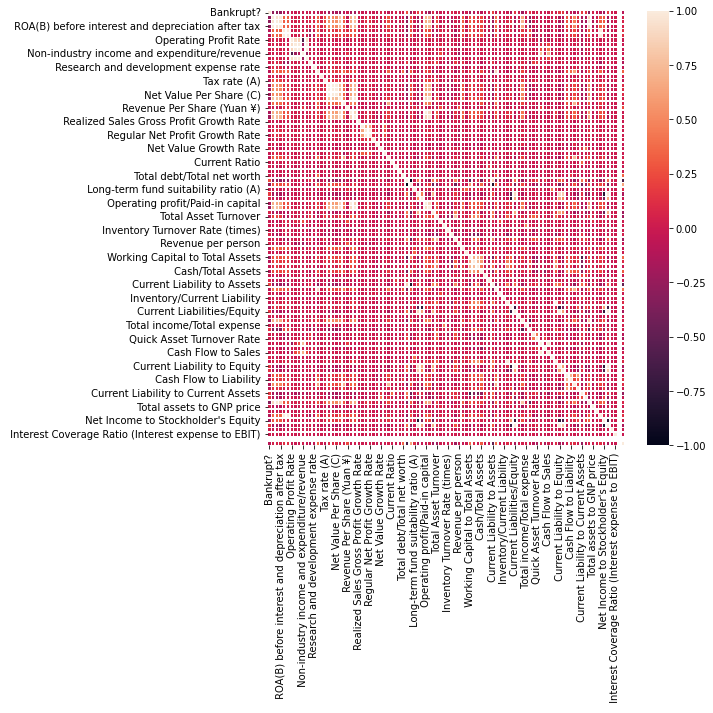

In [ ]:
#plotting the correlation matrix
fig, ax = plt.subplots(figsize = (8,8))
sns.heatmap(data.corr(),linewidth = 0.5)

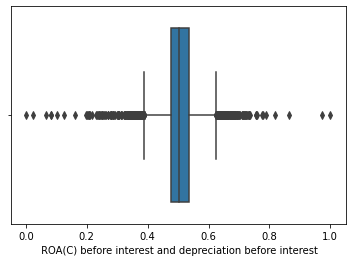

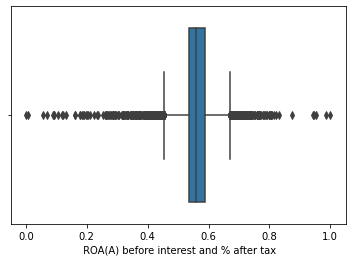

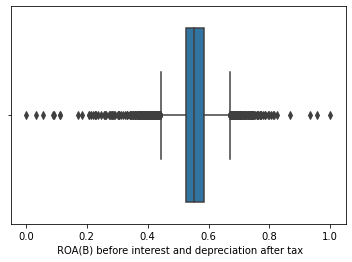

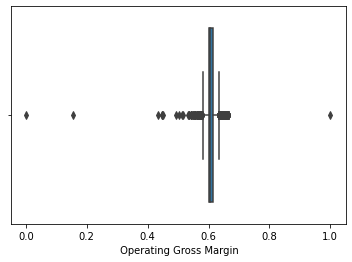

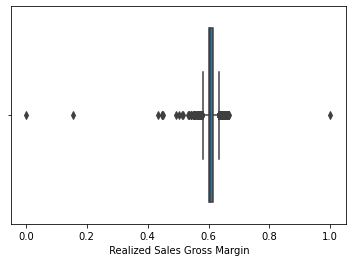

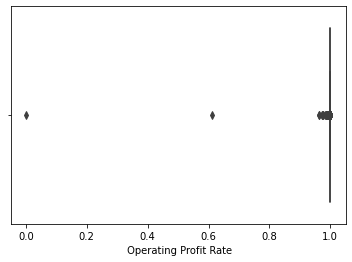

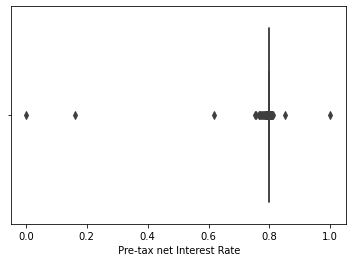

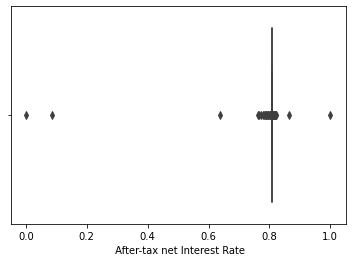

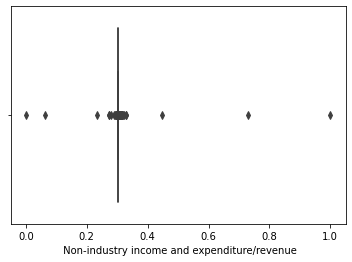

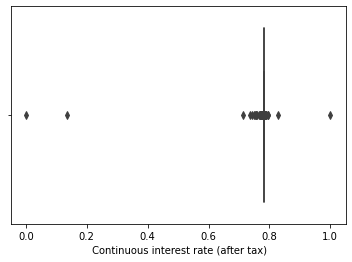

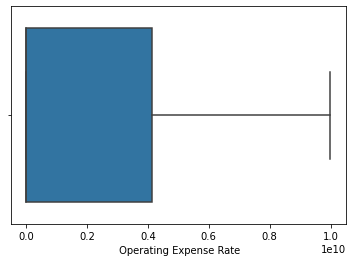

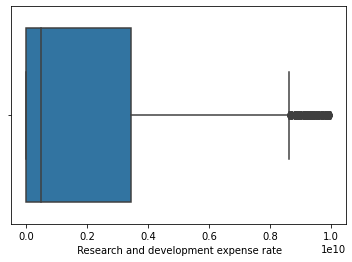

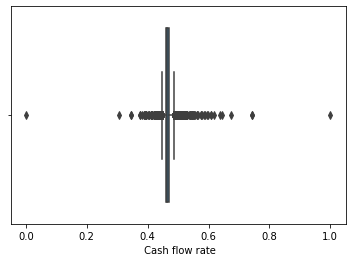

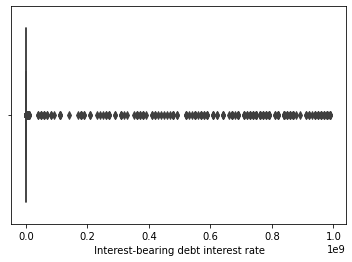

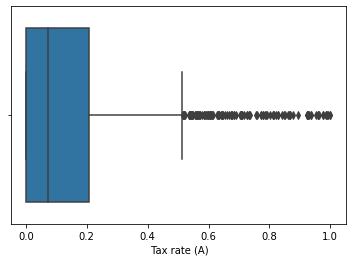

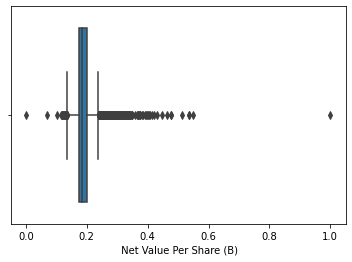

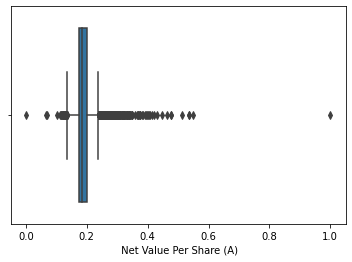

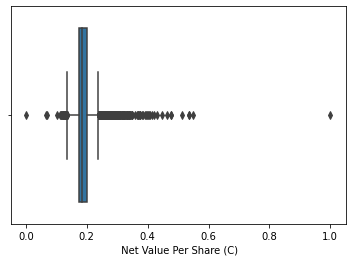

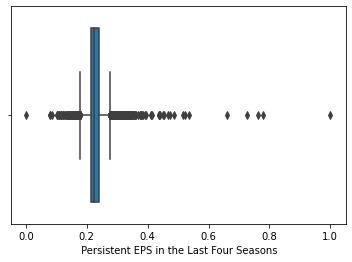

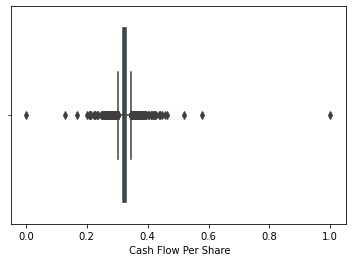

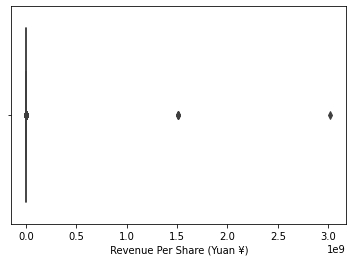

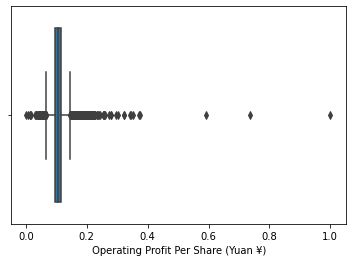

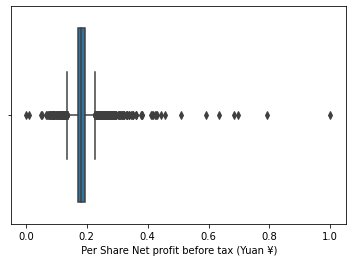

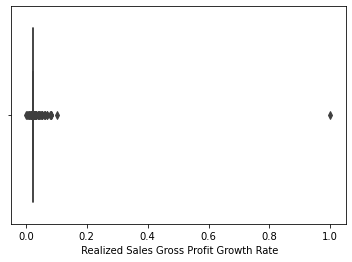

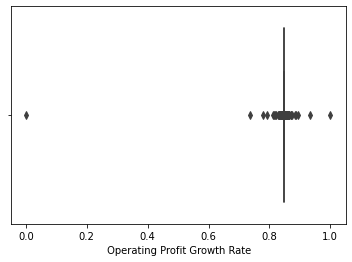

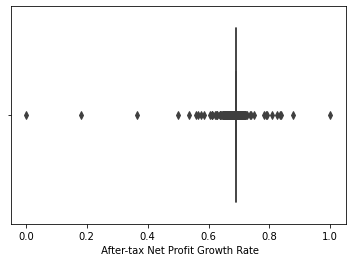

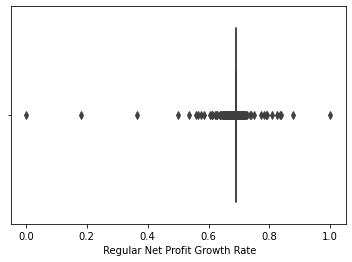

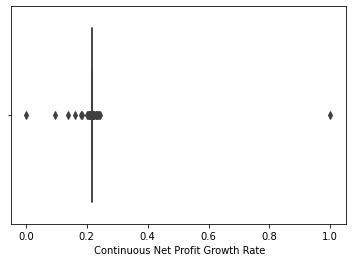

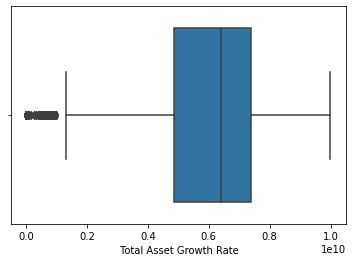

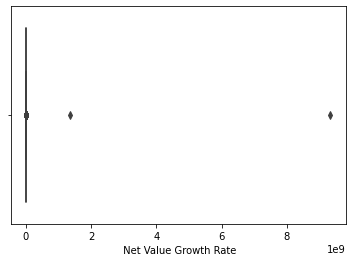

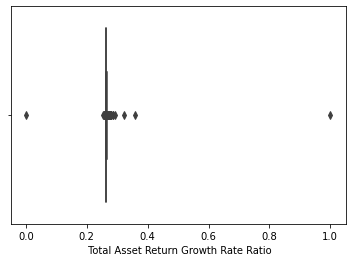

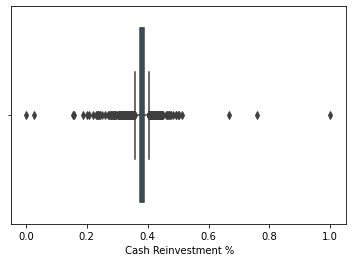

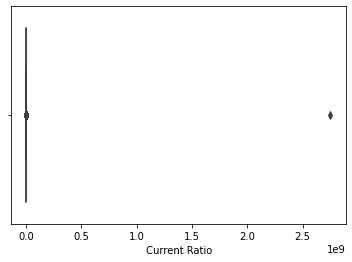

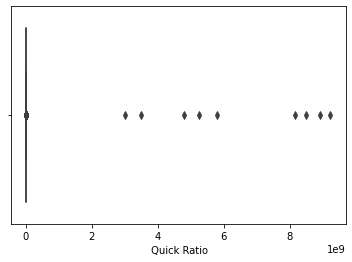

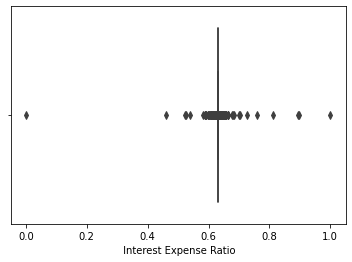

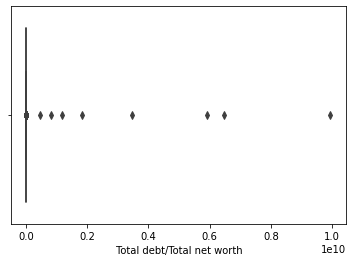

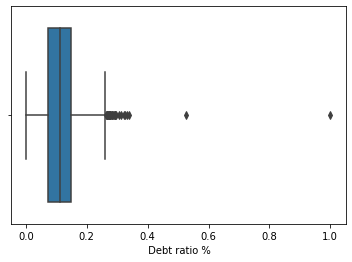

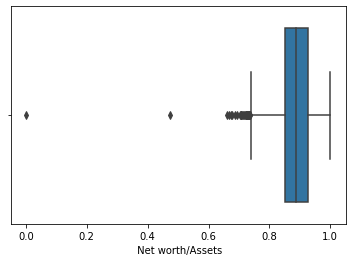

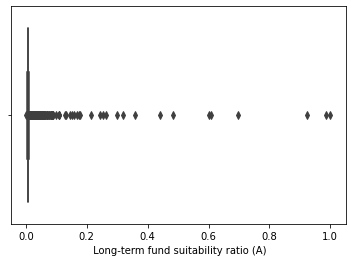

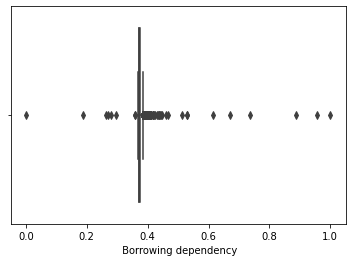

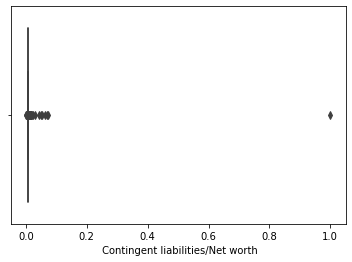

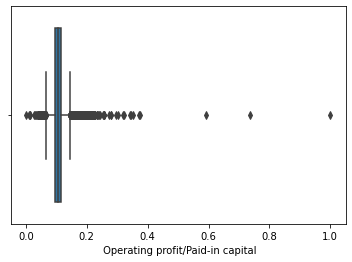

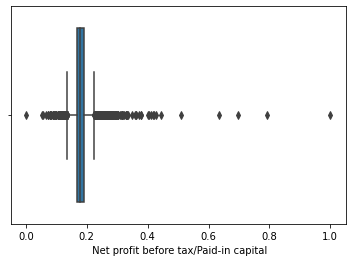

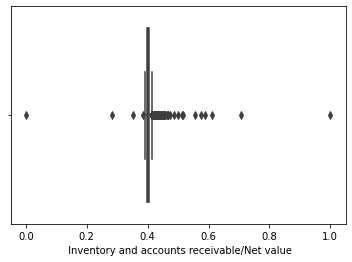

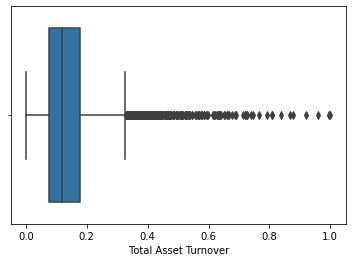

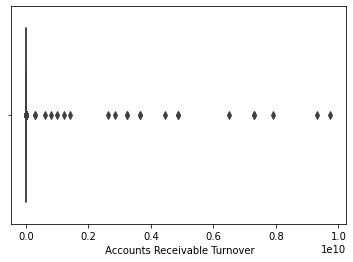

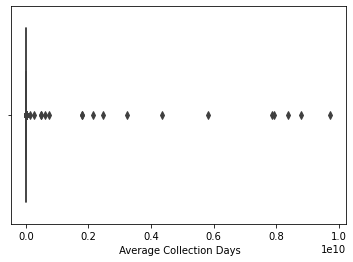

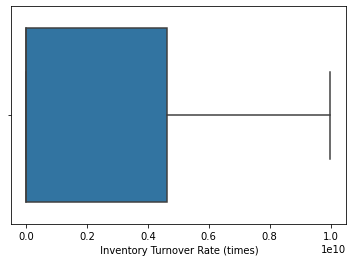

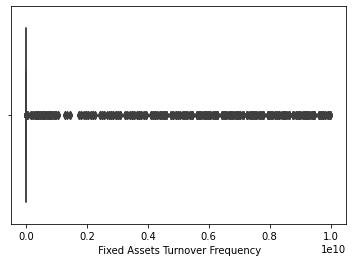

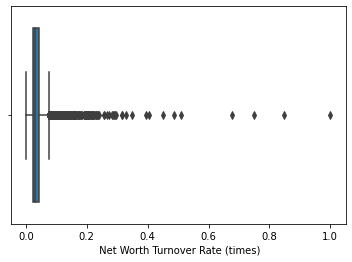

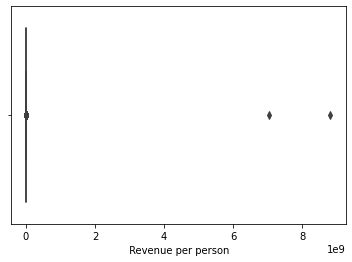

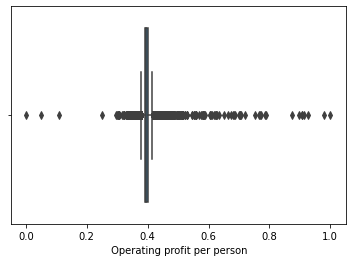

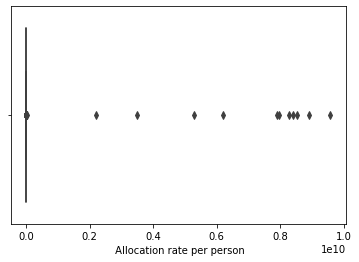

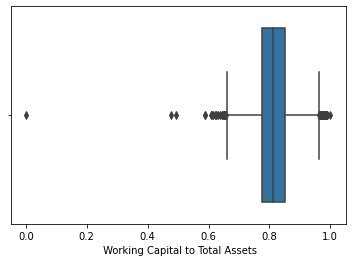

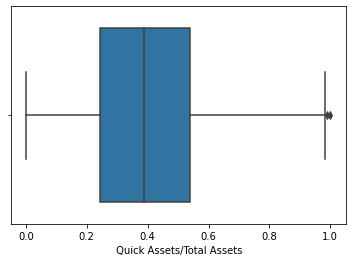

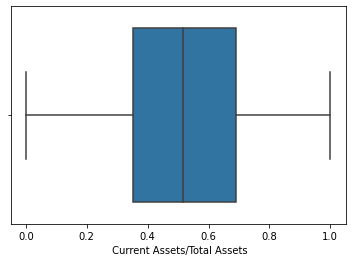

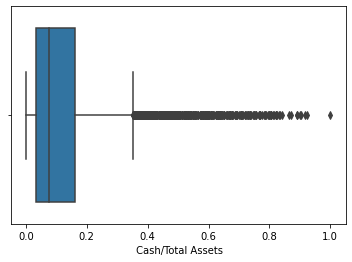

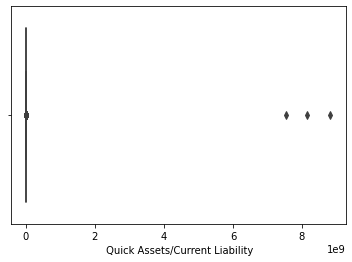

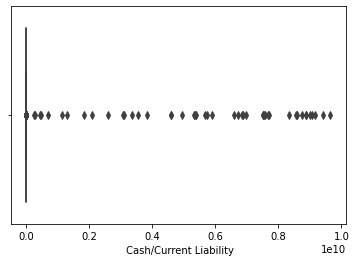

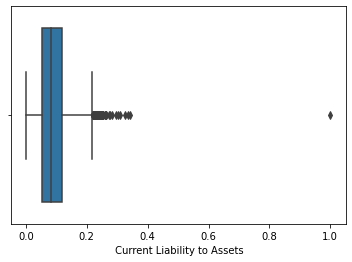

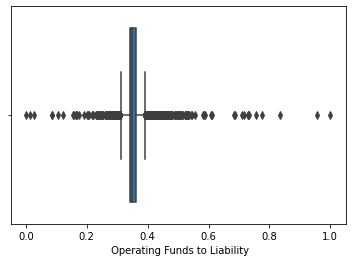

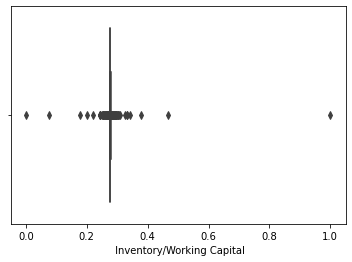

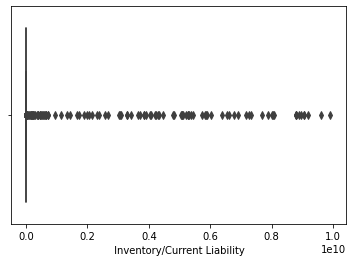

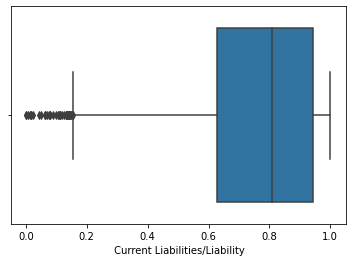

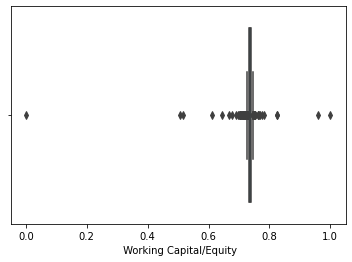

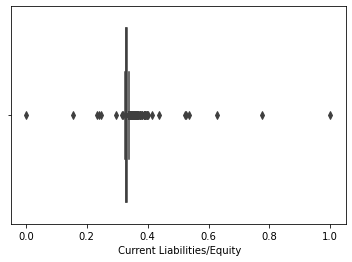

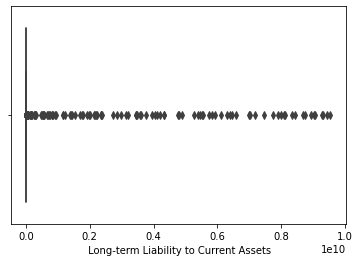

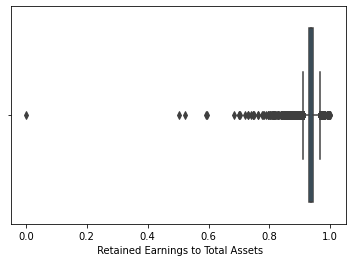

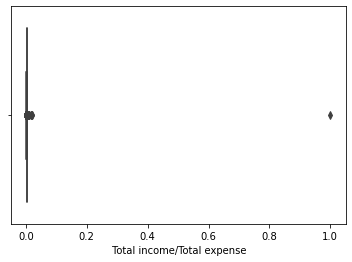

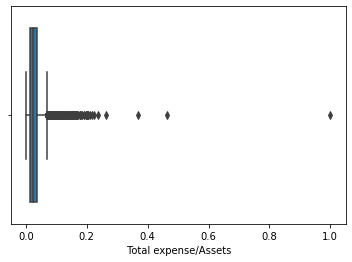

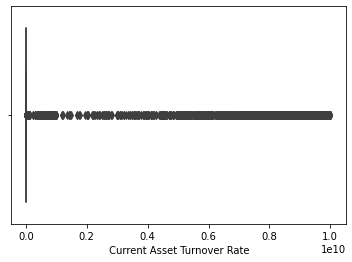

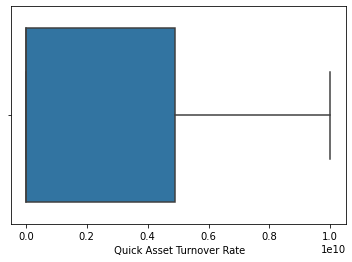

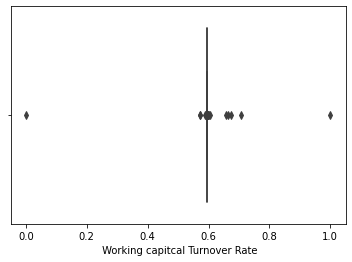

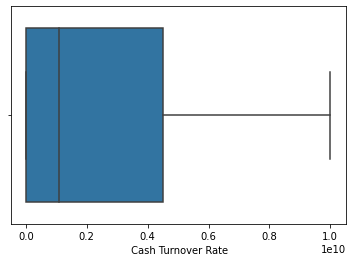

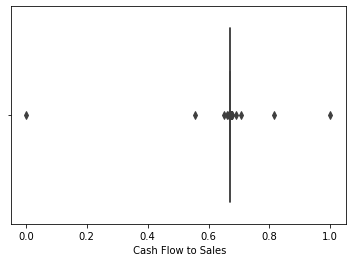

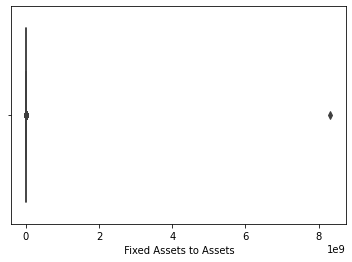

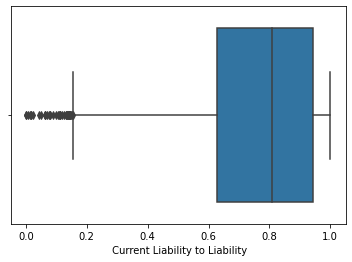

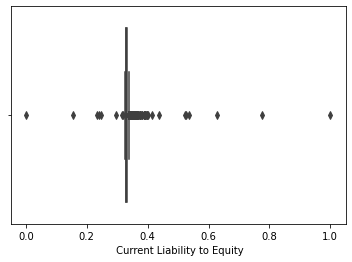

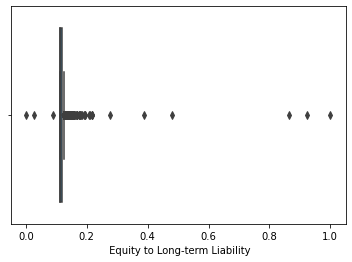

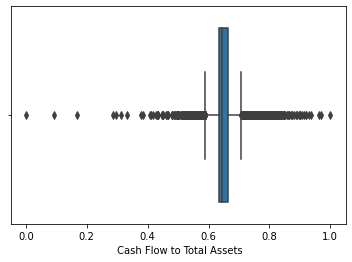

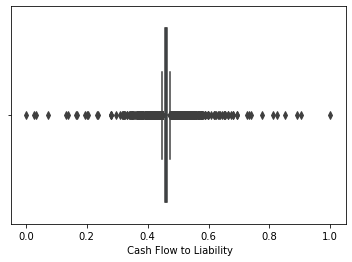

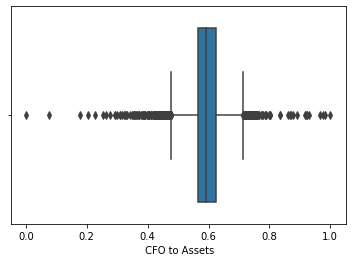

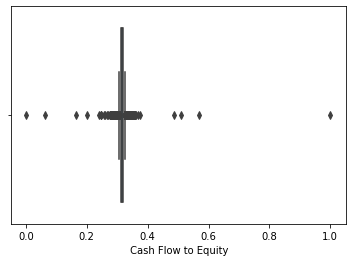

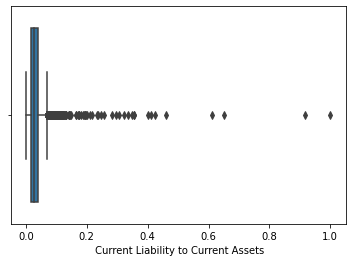

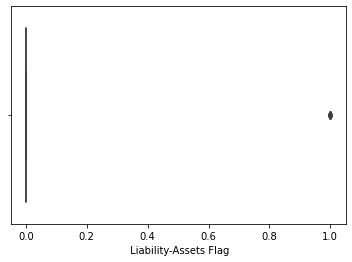

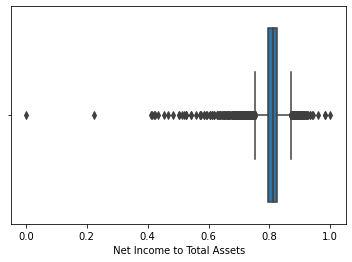

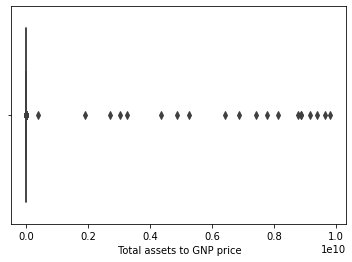

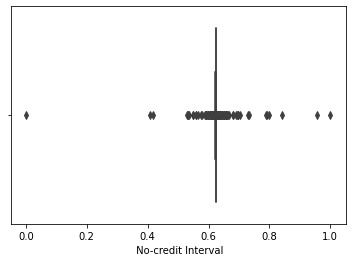

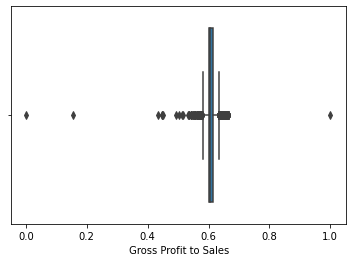

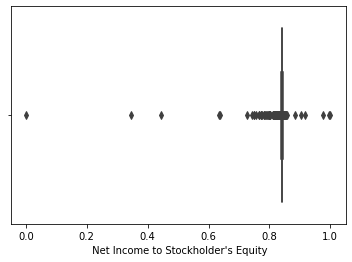

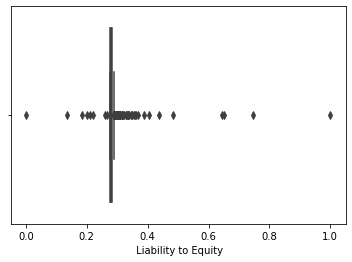

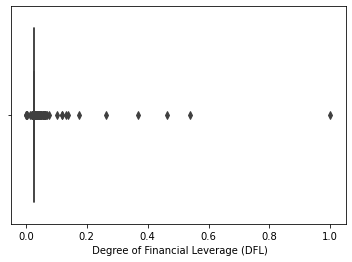

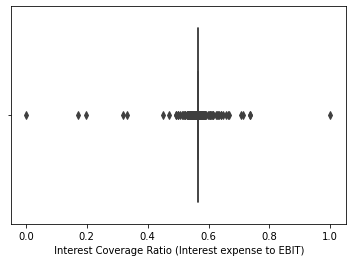

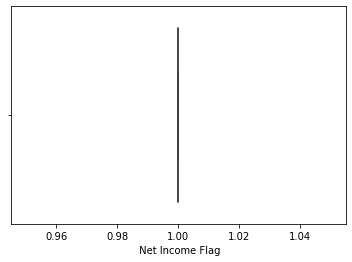

In [ ]:
#visualisation of data
for i in data.columns[1:-1]:
 sns.boxplot(x=i, data=data)# outlier.add_legend()
 plt.show()

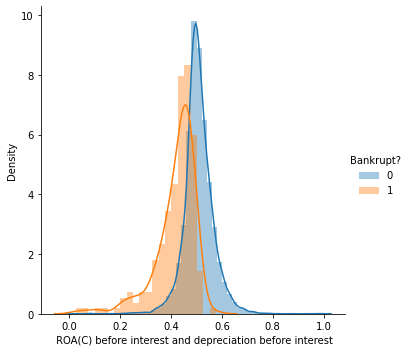

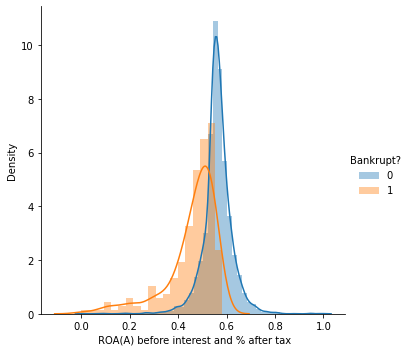

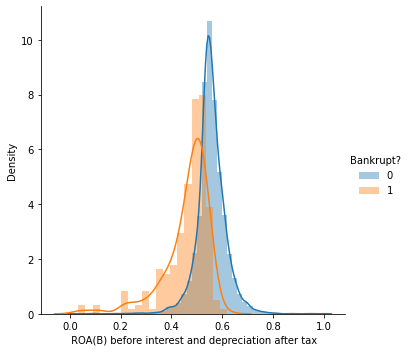

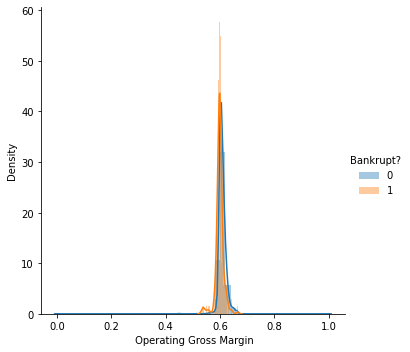

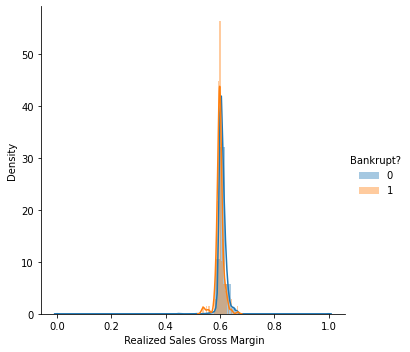

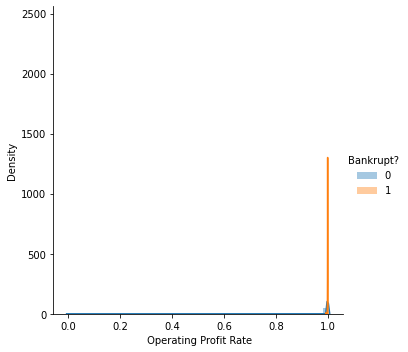

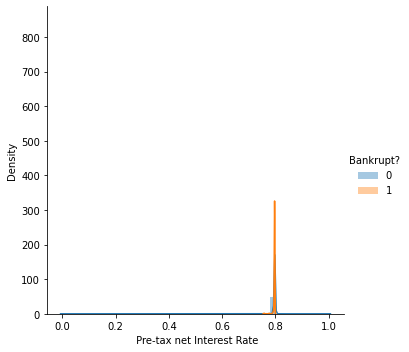

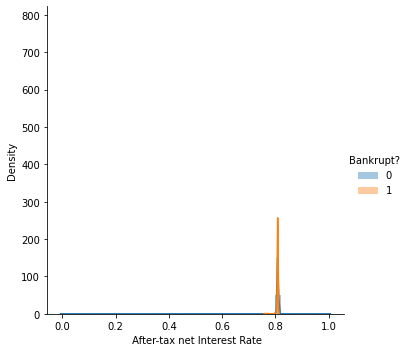

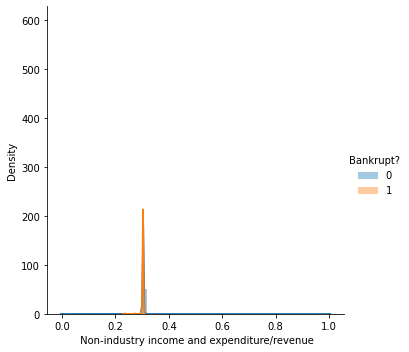

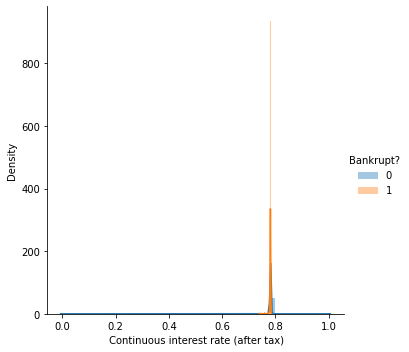

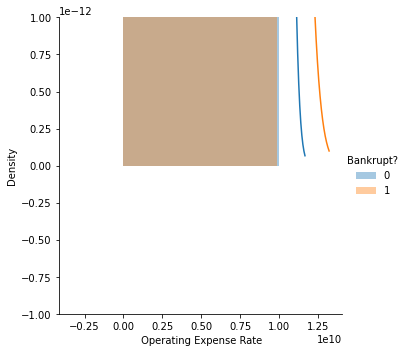

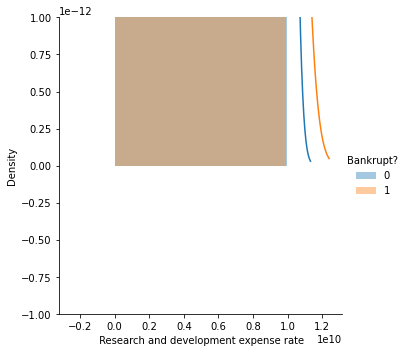

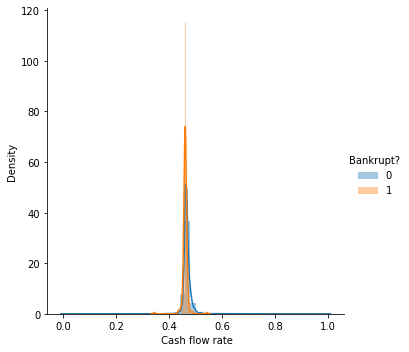

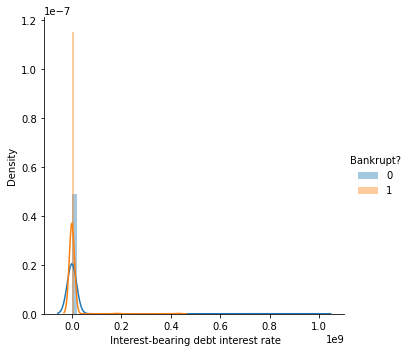

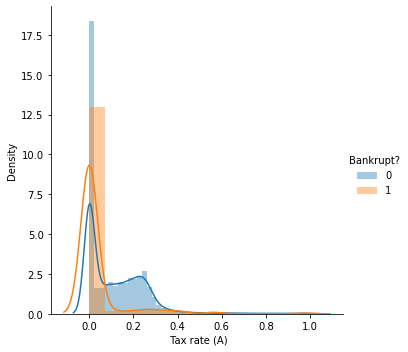

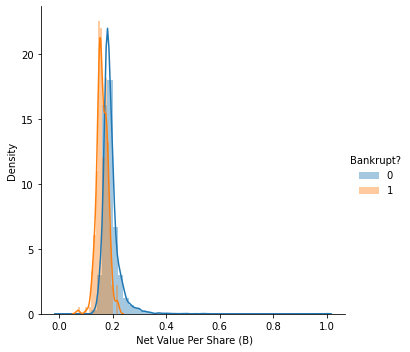

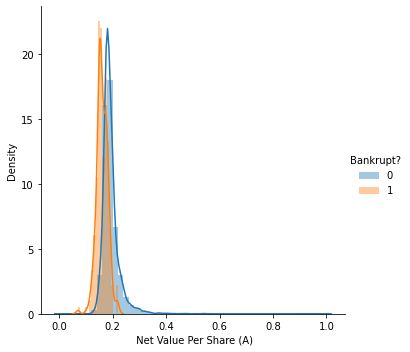

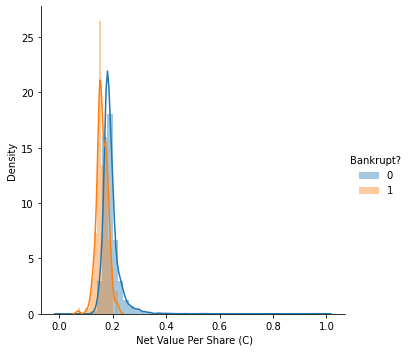

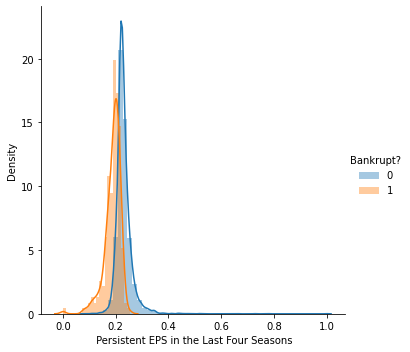

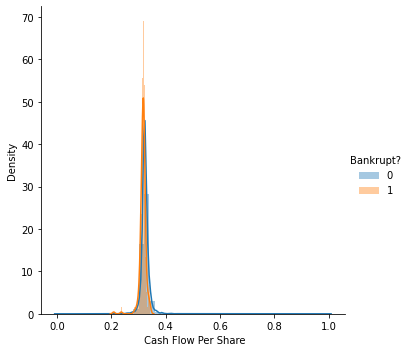

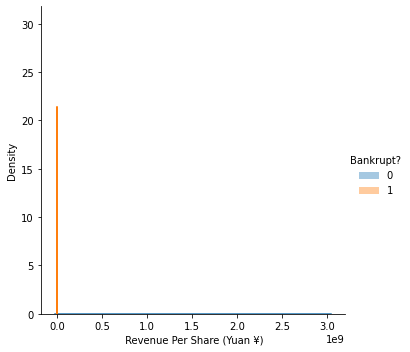

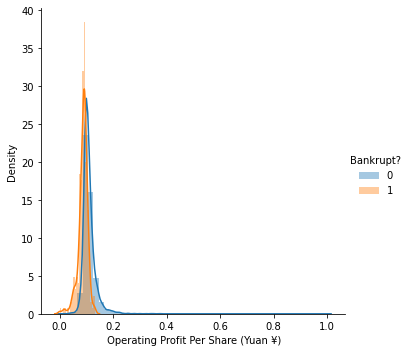

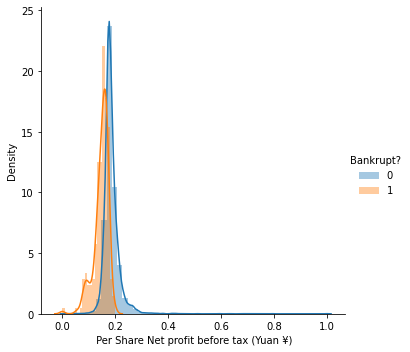

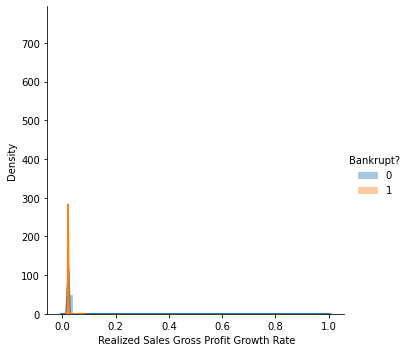

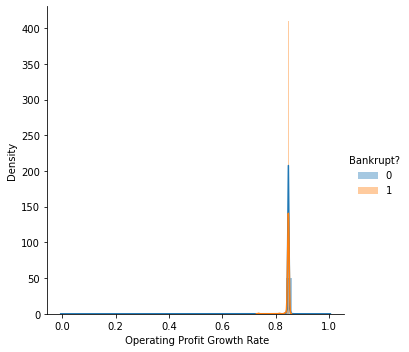

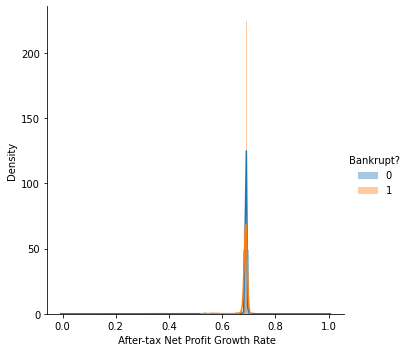

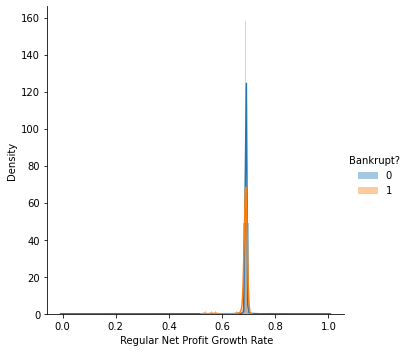

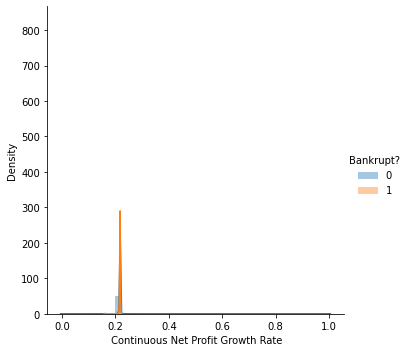

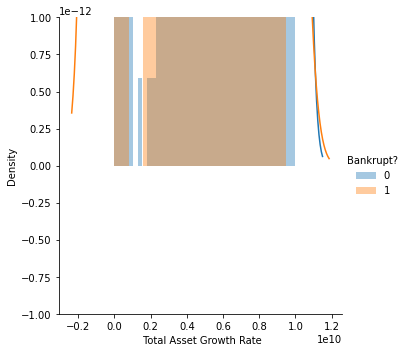

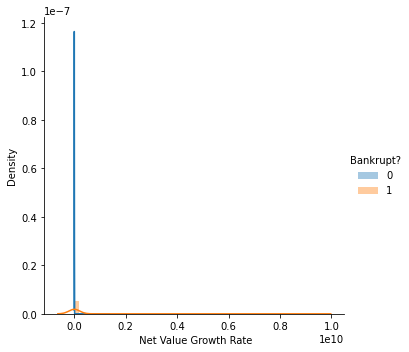

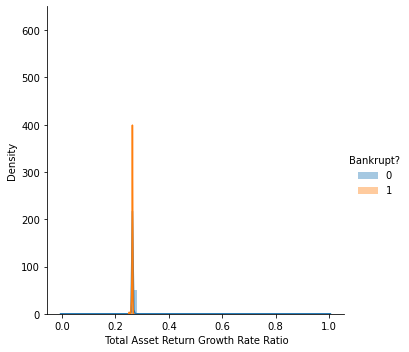

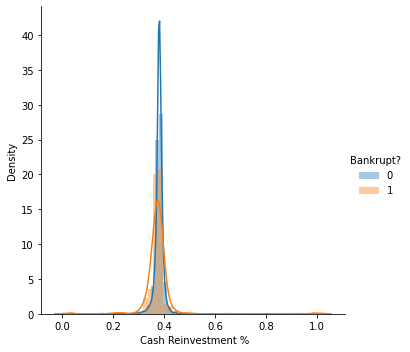

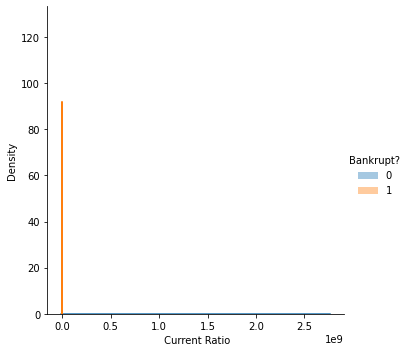

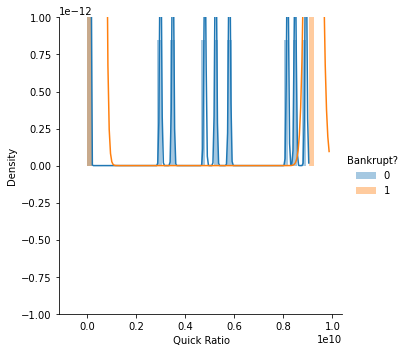

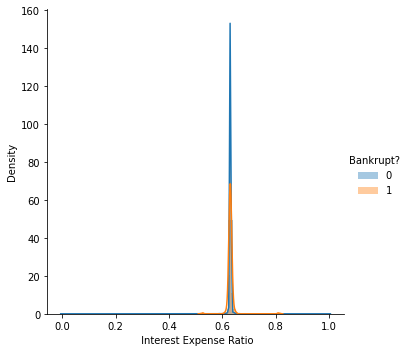

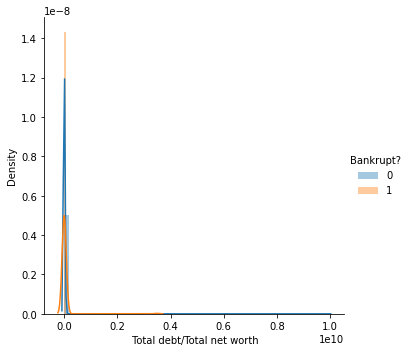

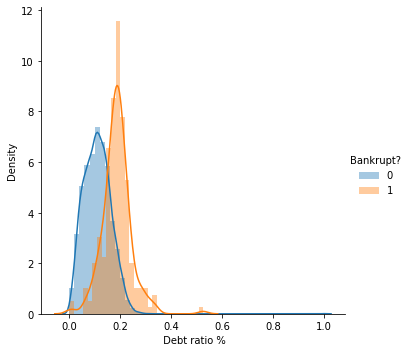

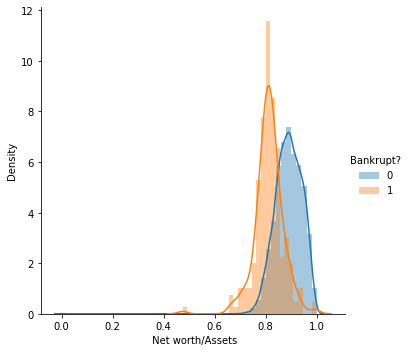

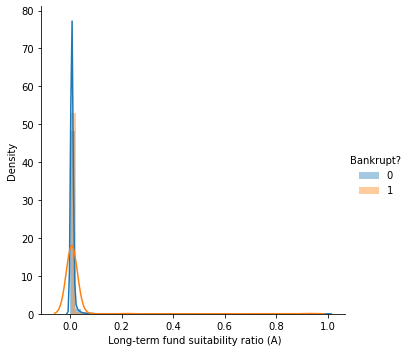

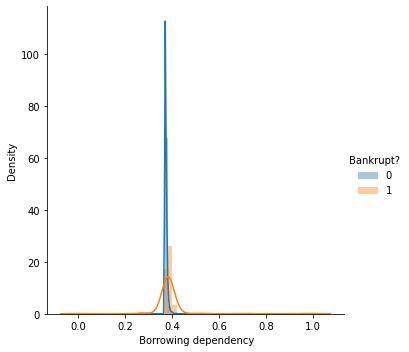

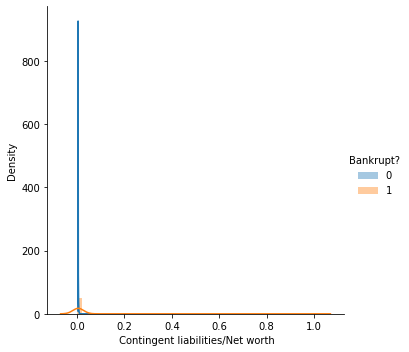

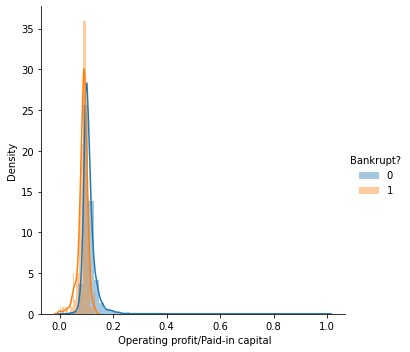

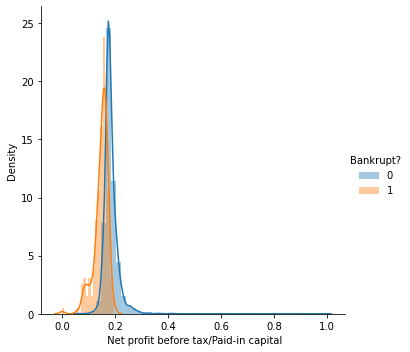

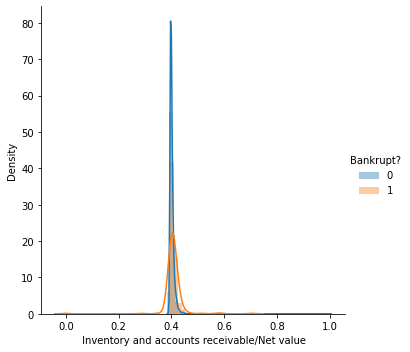

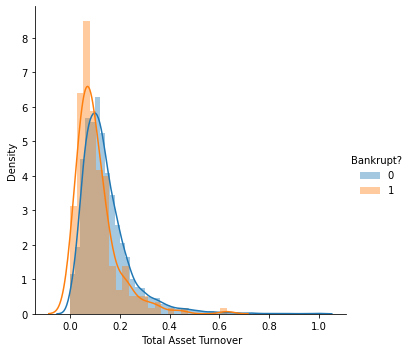

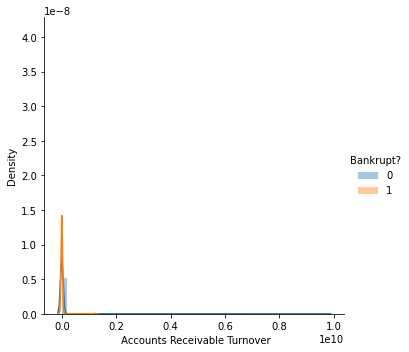

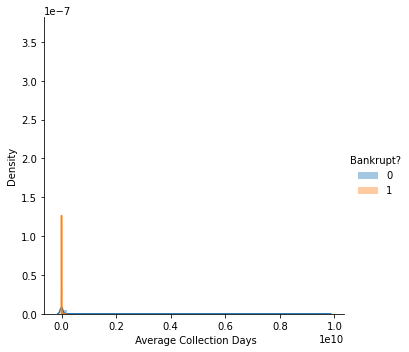

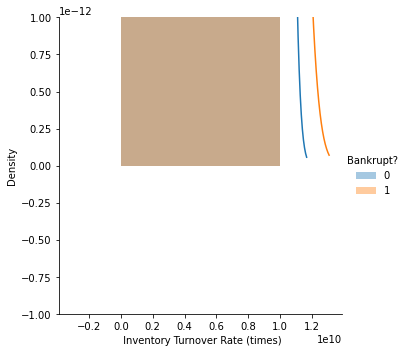

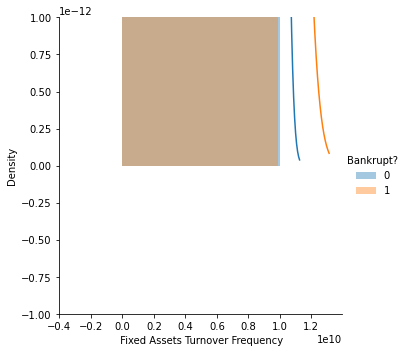

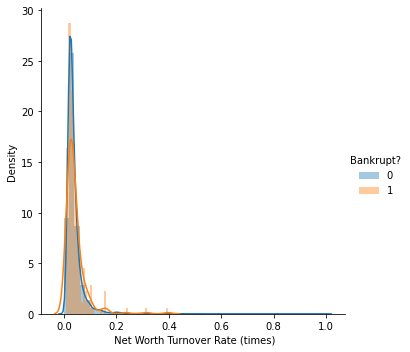

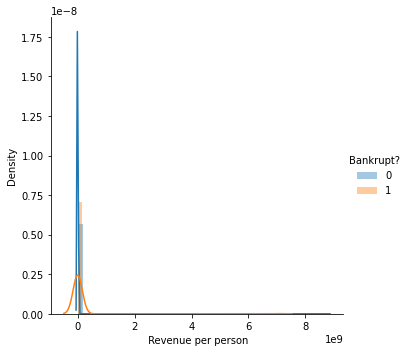

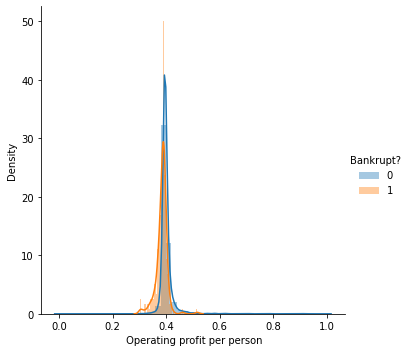

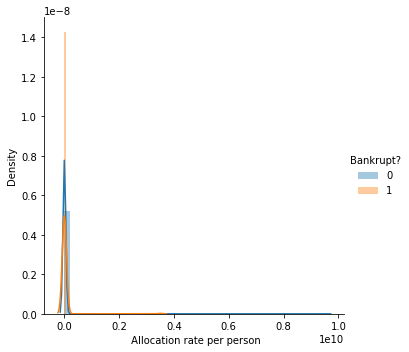

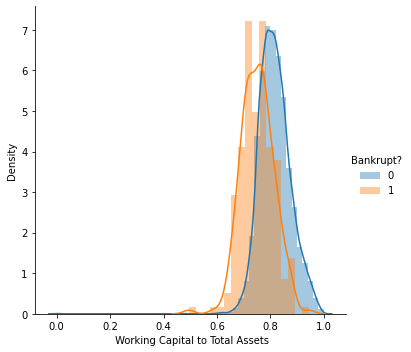

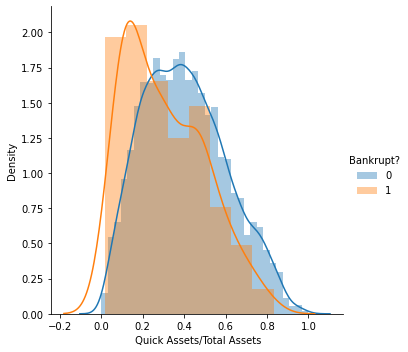

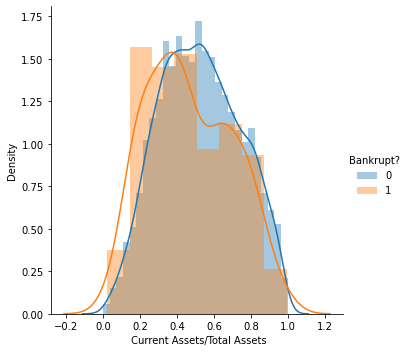

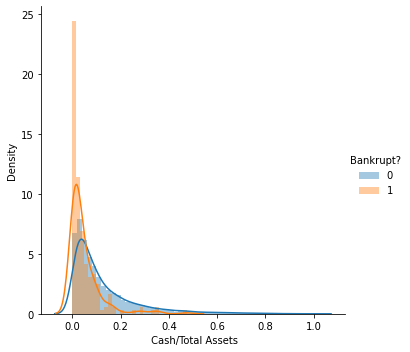

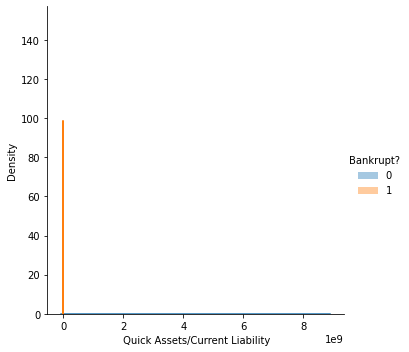

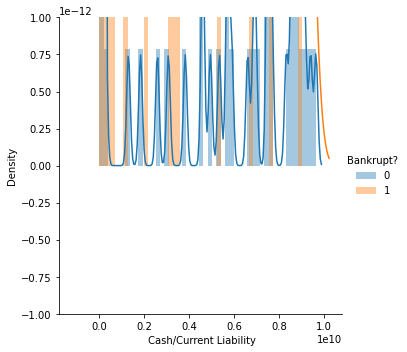

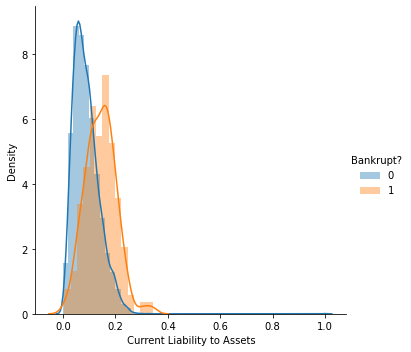

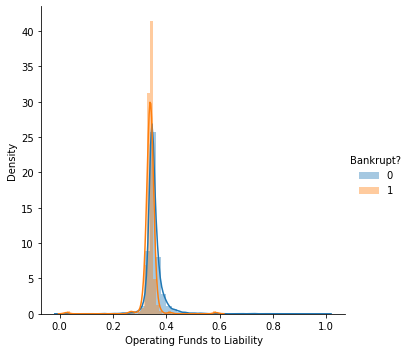

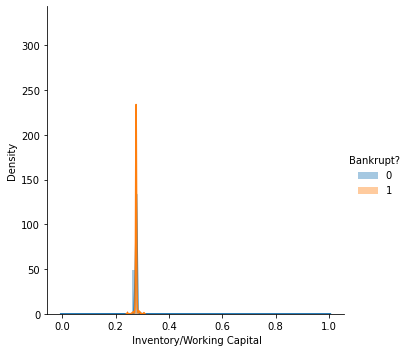

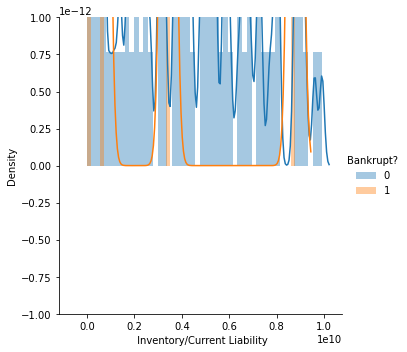

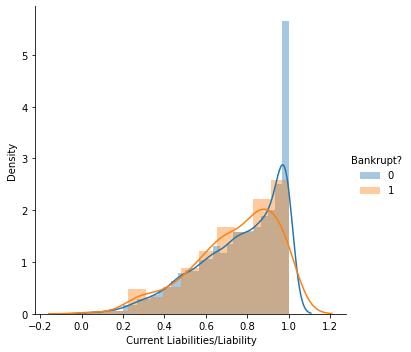

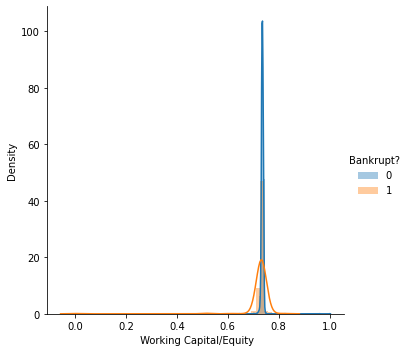

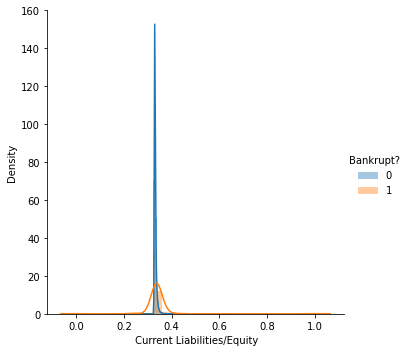

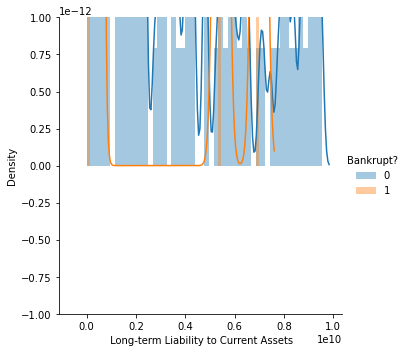

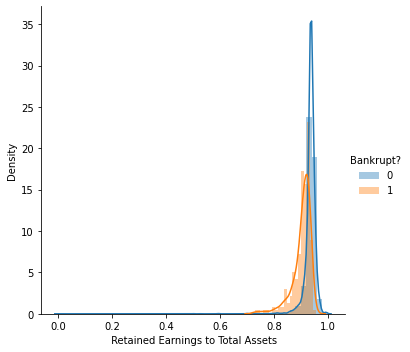

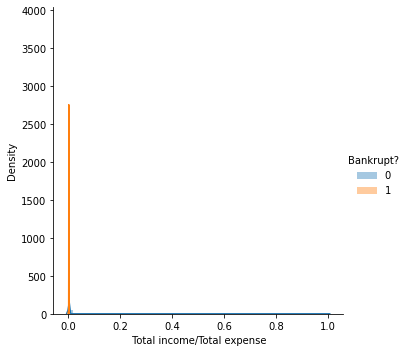

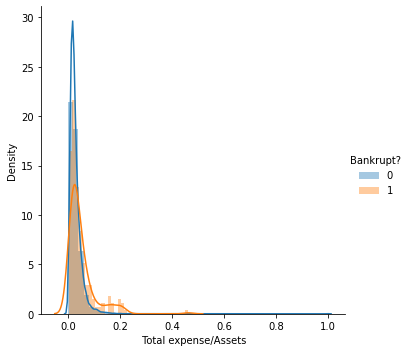

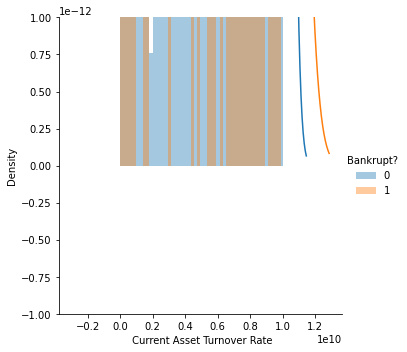

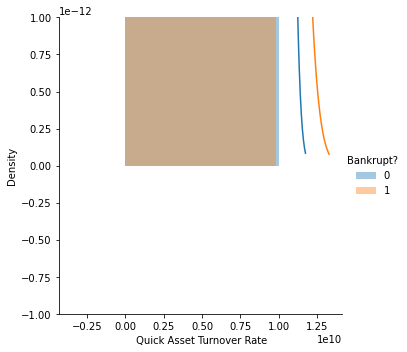

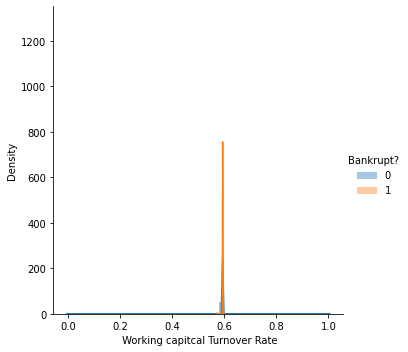

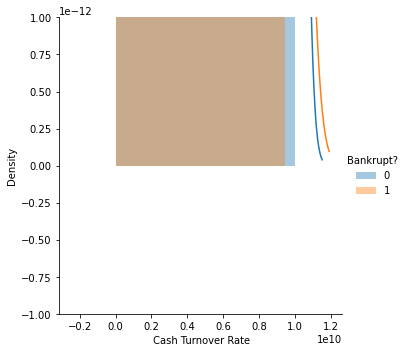

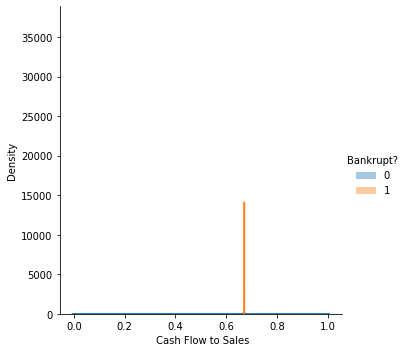

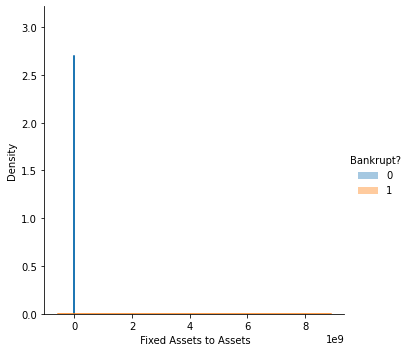

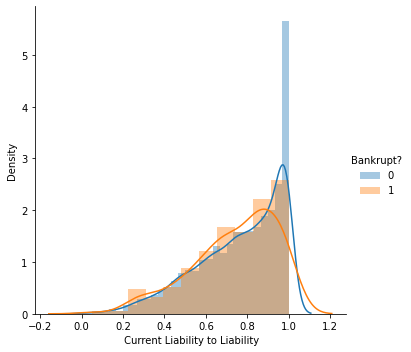

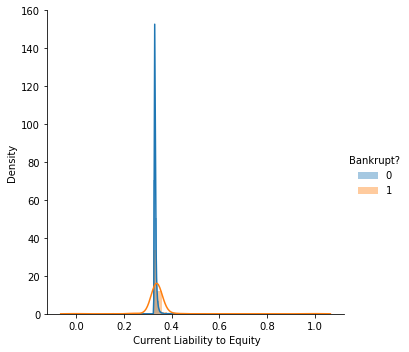

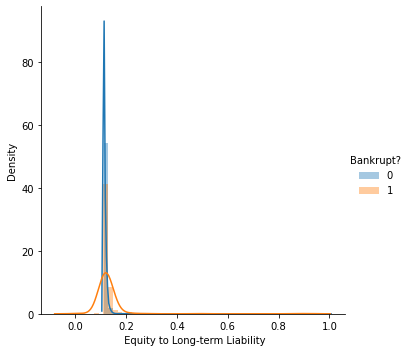

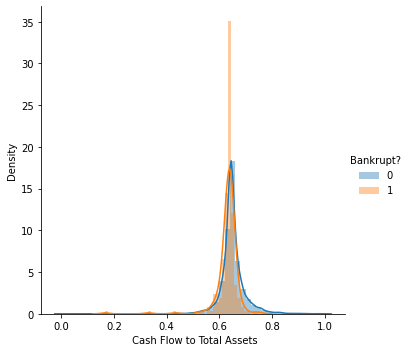

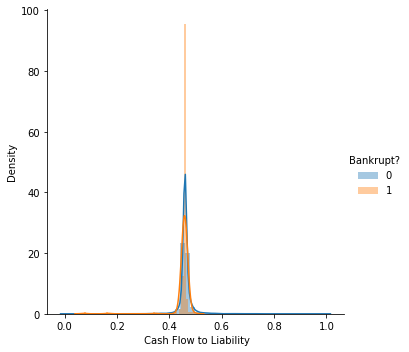

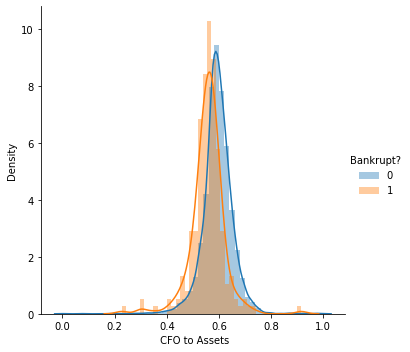

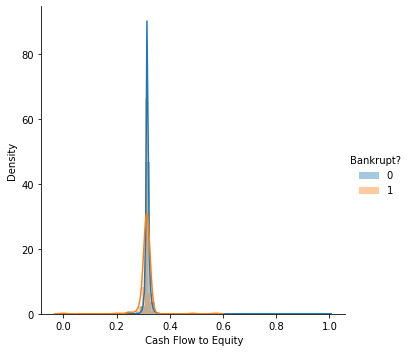

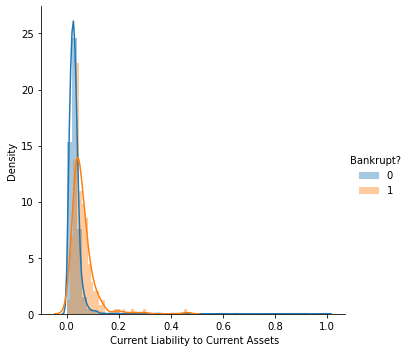

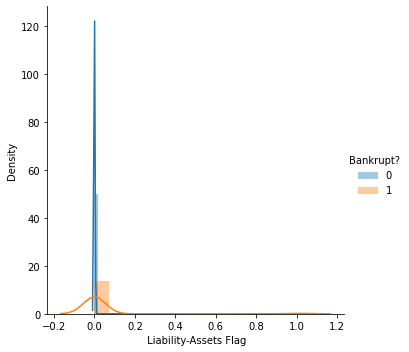

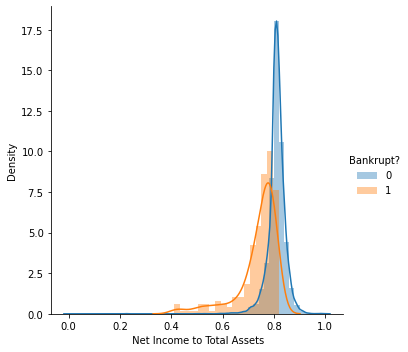

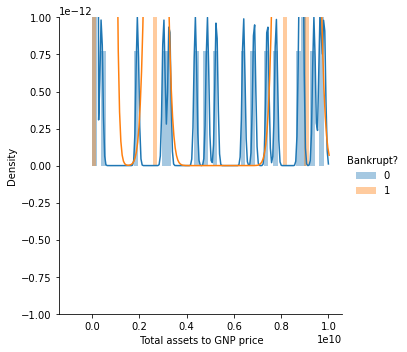

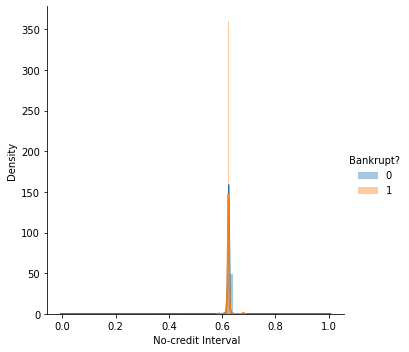

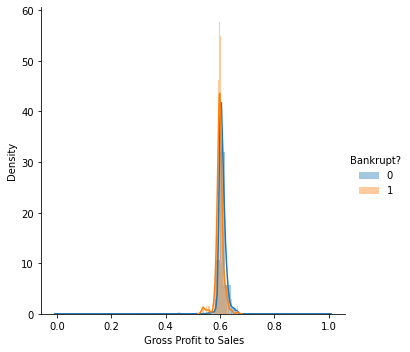

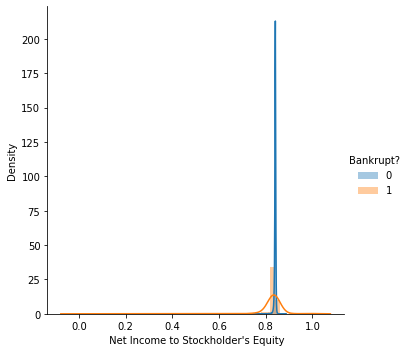

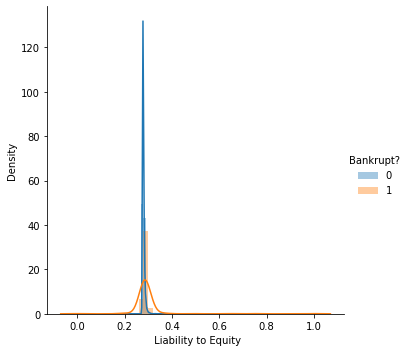

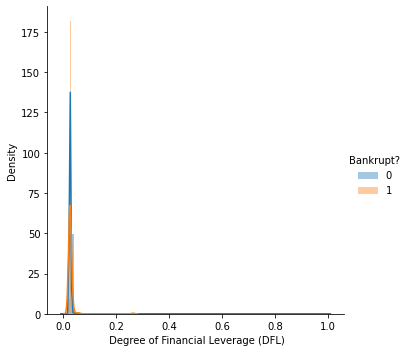

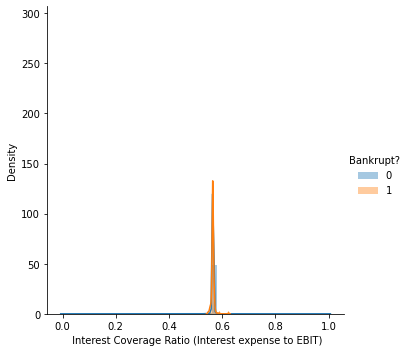

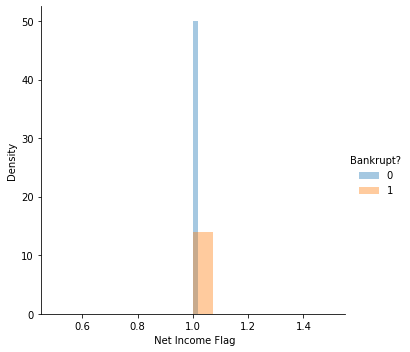

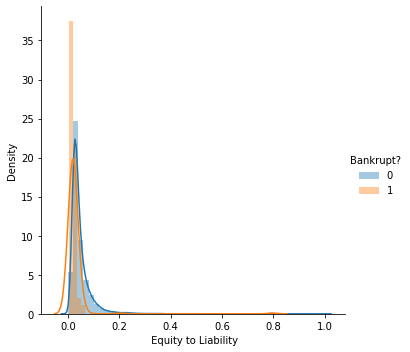

In [ ]:
for i in data.columns[1:]:
 sns.FacetGrid(data, hue="Bankrupt?", height=5).map(sns.distplot, i).add_legend()

In [ ]:
#checking if data is skewed towards one class
data['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

Most of the data is from 0 class so even if do not train a model and predict every values as 0 the predictions will be around 95% or more accurate

[Text(0.5, 1.0, 'class distribution')]

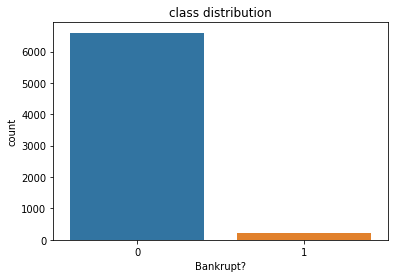

In [ ]:
#visualising the skewness
sns.countplot(x='Bankrupt?' , data=data).set(title='class distribution')

In [ ]:
#random oversampling and random undersampling
ros = RandomOverSampler()
# resampling X, y
X_ros, y_ros = ros.fit_resample(data.drop(['Bankrupt?'],axis=1),data['Bankrupt?'])
# new class distribution 
print(Counter(y_ros))

Counter({1: 6599, 0: 6599})


In [ ]:
rus = RandomUnderSampler() 
# resampling X, y
X_rus, y_rus = rus.fit_resample(data.drop(['Bankrupt?'],axis=1),data['Bankrupt?'])
# new class distribution
print(Counter(y_rus))

Counter({0: 220, 1: 220})


In [ ]:
over = RandomOverSampler(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.8)
# first performing oversampling to minority class
X_over, y_over = over.fit_resample(data.drop(['Bankrupt?'],axis=1),data['Bankrupt?'])
print(f"Oversampled: {Counter(y_over)}")
Oversampled: Counter({0: 9844, 1: 4922})
# now to comine under sampling 
X_combined_sampling, y_combined_sampling = under.fit_resample(X_over, y_over)
print(f"Combined Random Sampling: {Counter(y_combined_sampling)}")

Oversampled: Counter({0: 6599, 1: 3299})
Combined Random Sampling: Counter({0: 4123, 1: 3299})


In [ ]:
def lr(X,y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
  clf = LogisticRegression().fit(X_train, y_train)
  y_pred=clf.predict(X_test)
  print(precision_score(y_pred,y_test))


In [ ]:
lr(X_ros,y_ros)
lr(X_rus,y_rus)
lr(X_combined_sampling,y_combined_sampling)
# lr(X_o,y_o)
# lr(X_ada,y_ada)

0.5094246031746031
0.38461538461538464
0.387589013224822


Dealing with skewness = Resampling<br>


*   Undersampling  
    - Random under-sampling
    - Tomek Links
    - CNN

*   Over-sampling
    - Random oversampling
    - SMOTE 
    - ADASYN
* Near Miss



In [ ]:
#We are only using tomek links and SMOTE to make two datasets 
#(will choose the one which performs better)

In [ ]:
X= data.drop(['Bankrupt?'],axis=1)
Y=data['Bankrupt?']

In [ ]:
#oversampling using SMOTE 
SM = SMOTE()
X_o,y_o=SM.fit_resample(X,Y)

In [ ]:
y_o.value_counts()

1    6599
0    6599
Name: Bankrupt?, dtype: int64

In [ ]:
Ada = ADASYN()
X_ada,y_ada = Ada.fit_resample(X,Y)

In [ ]:
y_ada.value_counts()

0    6599
1    6523
Name: Bankrupt?, dtype: int64

ADASYN works better than SMOTE because it is an improved version of SMOTE which adds a random small values to the synthetic points after creating them.

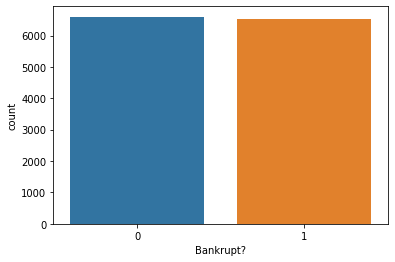

In [ ]:
sns.countplot(x=y_ada)

In [ ]:
df = pd.concat([X_ada,y_ada],axis=1)

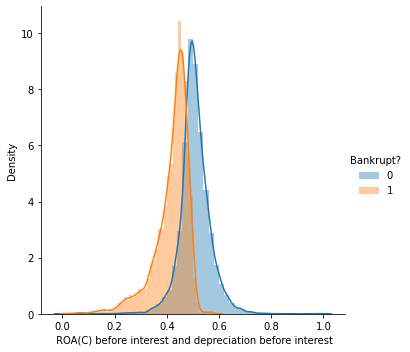

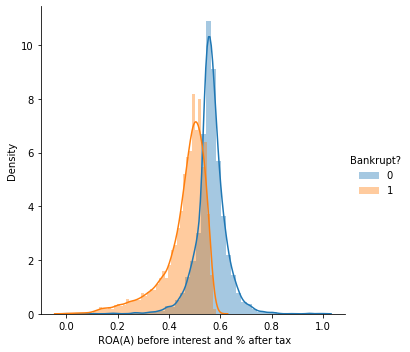

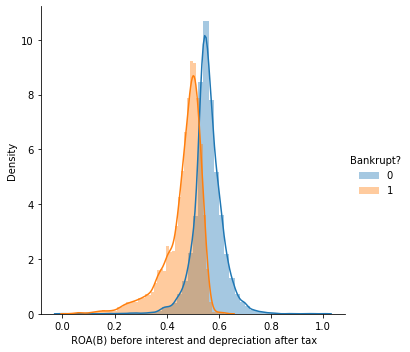

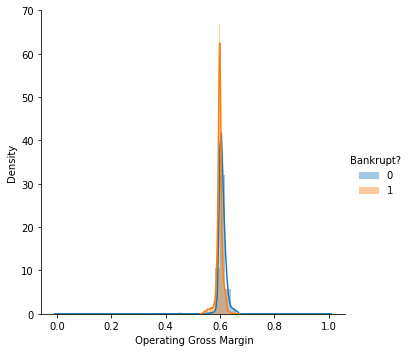

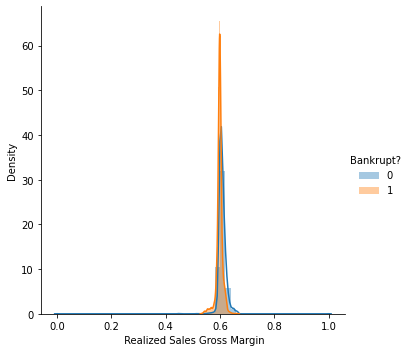

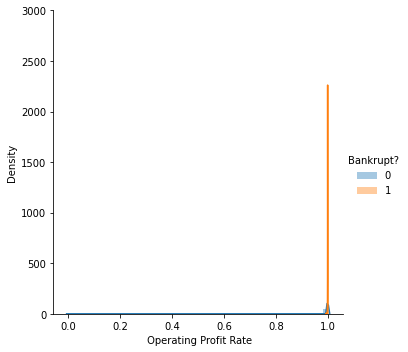

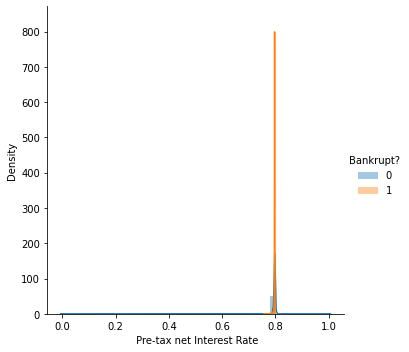

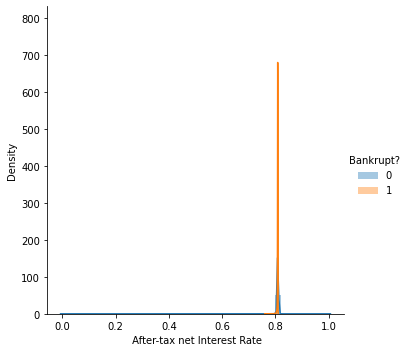

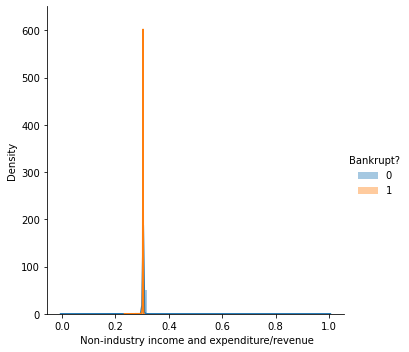

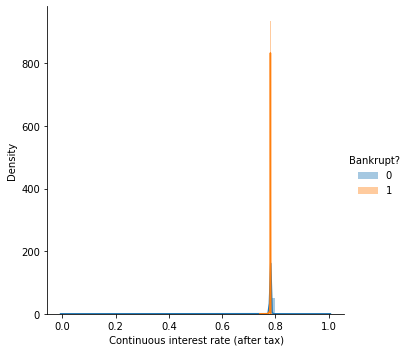

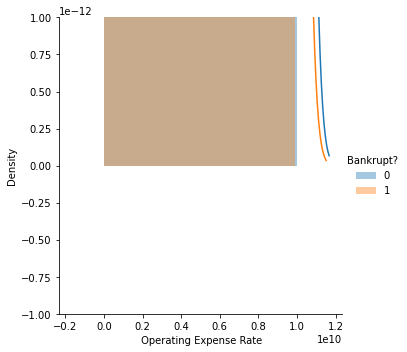

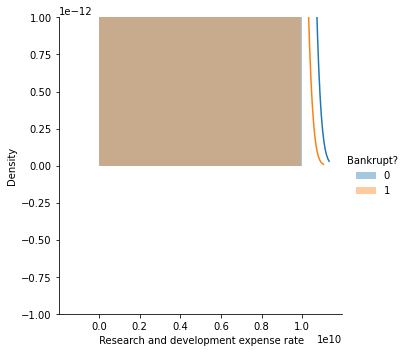

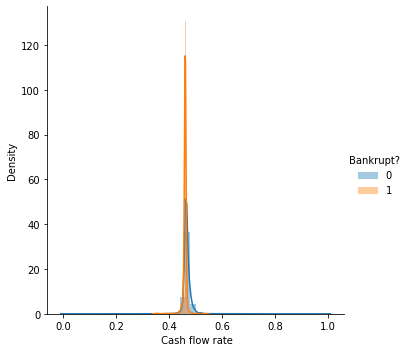

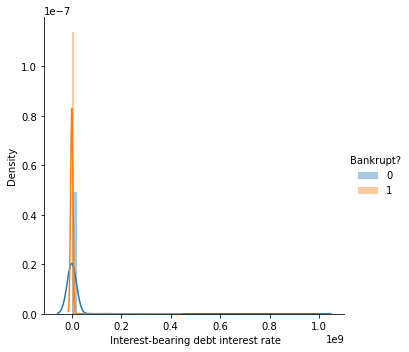

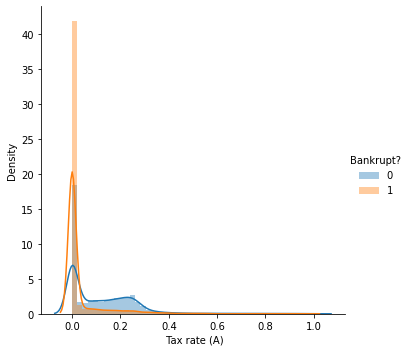

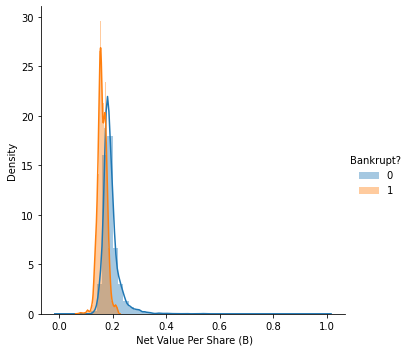

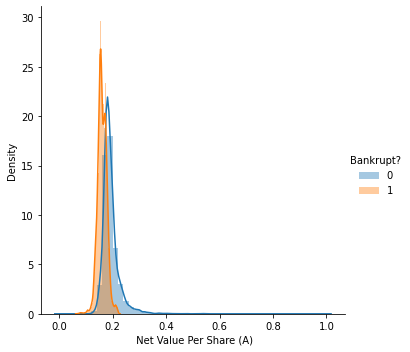

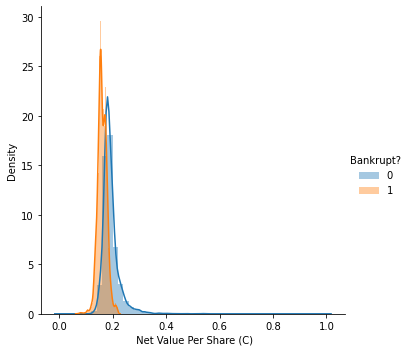

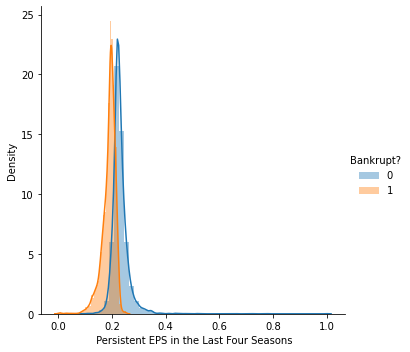

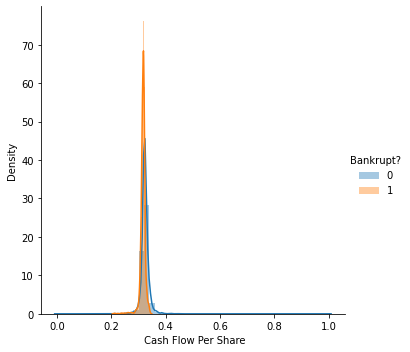

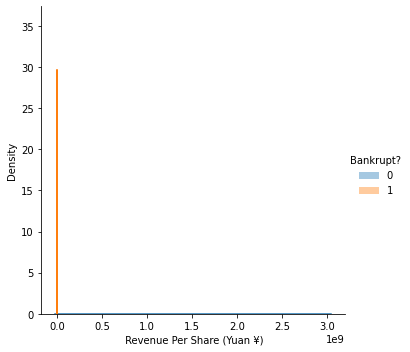

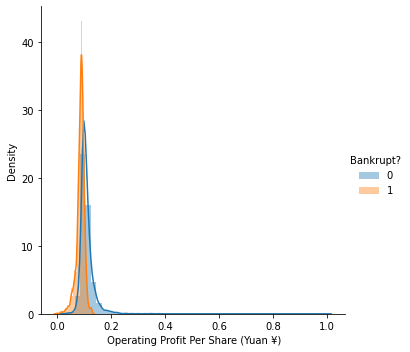

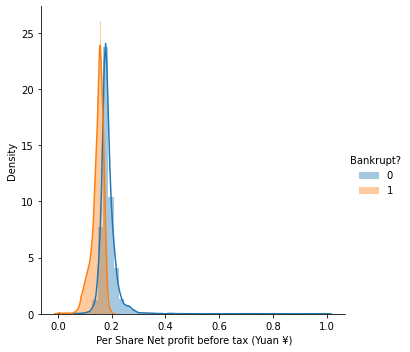

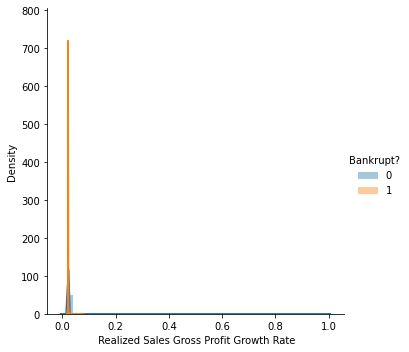

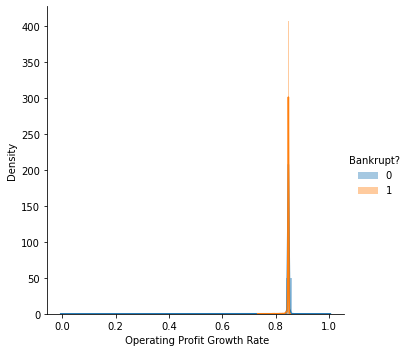

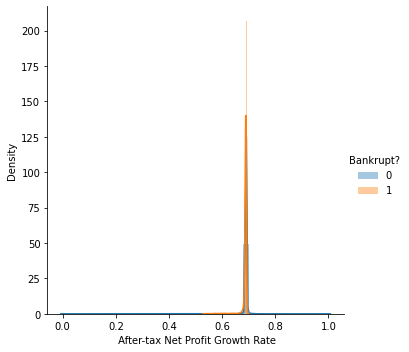

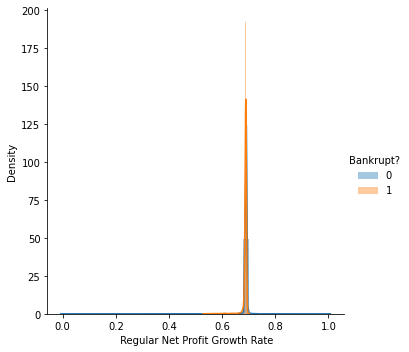

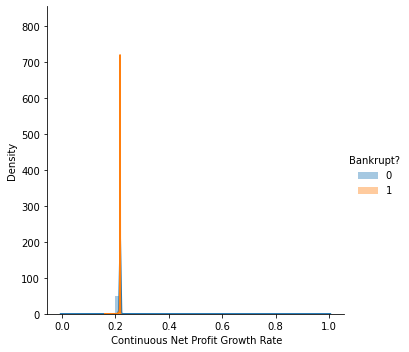

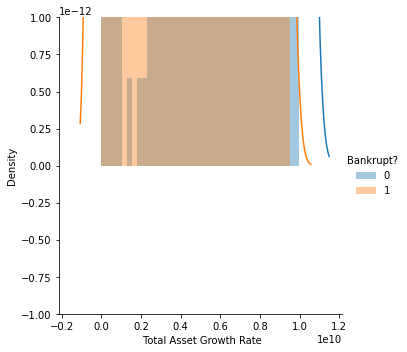

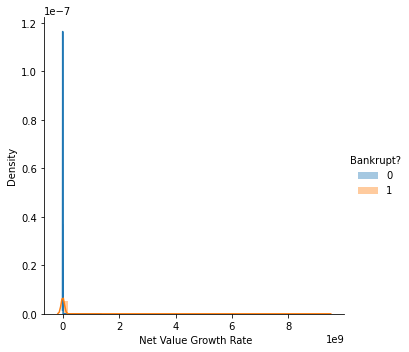

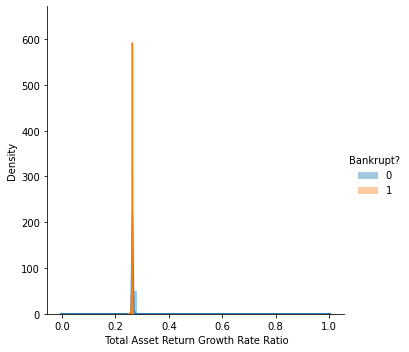

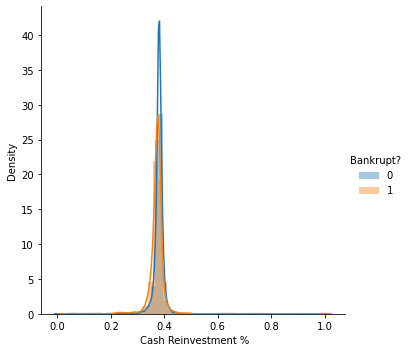

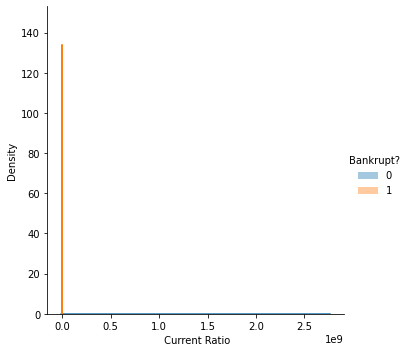

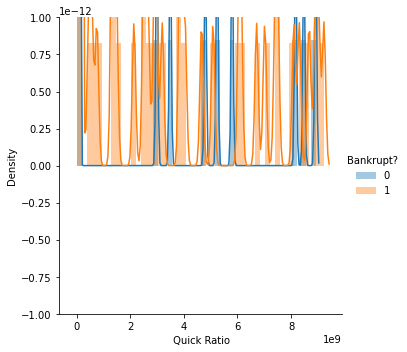

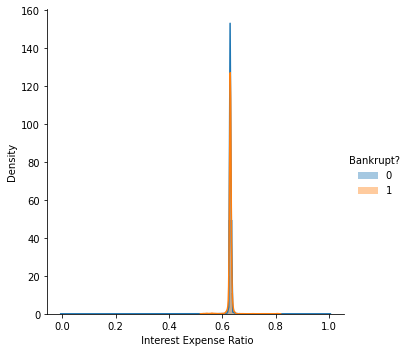

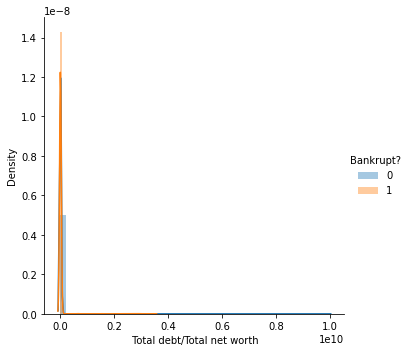

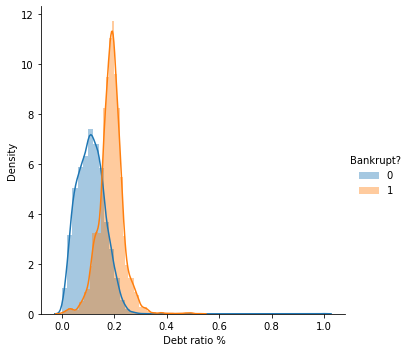

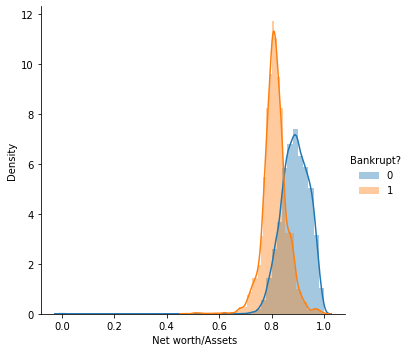

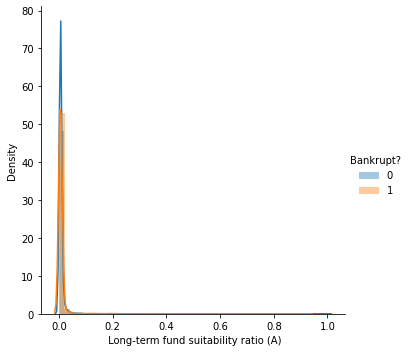

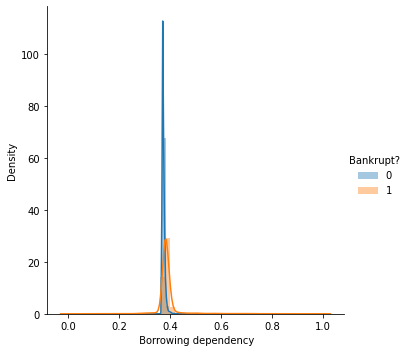

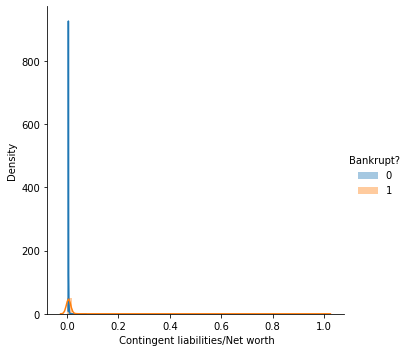

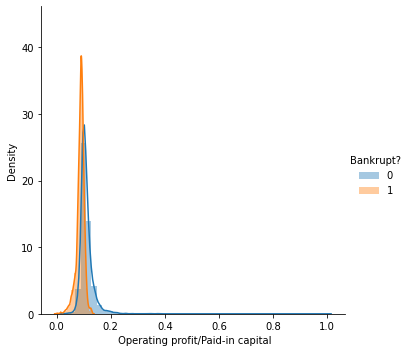

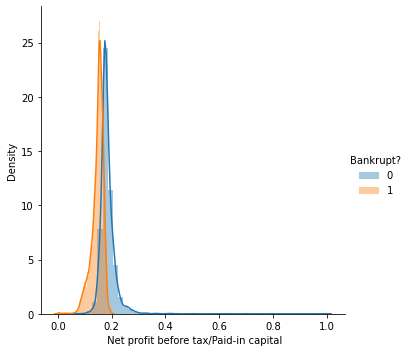

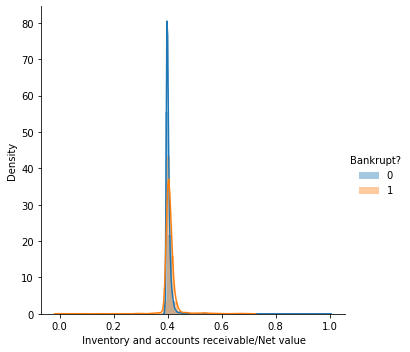

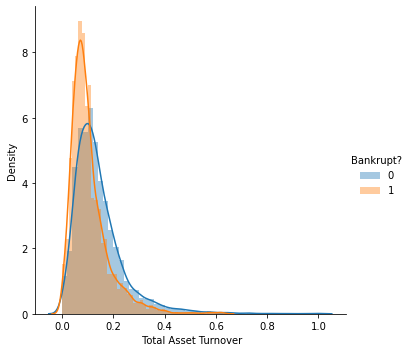

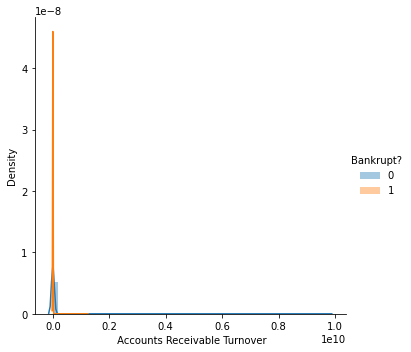

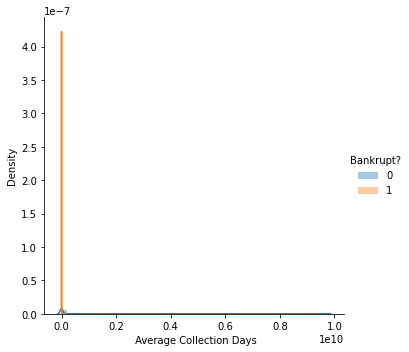

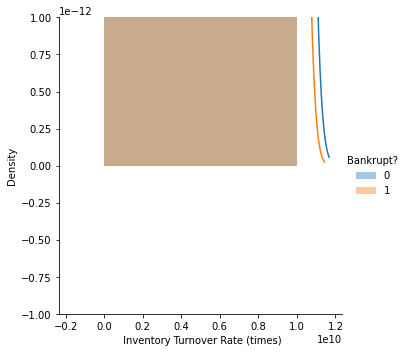

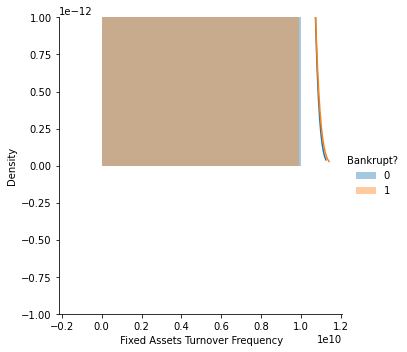

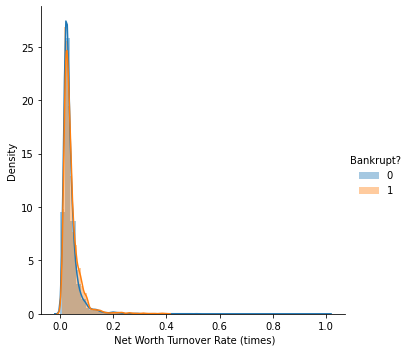

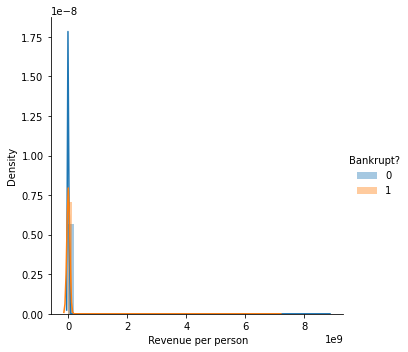

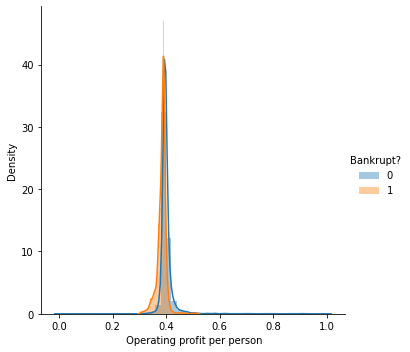

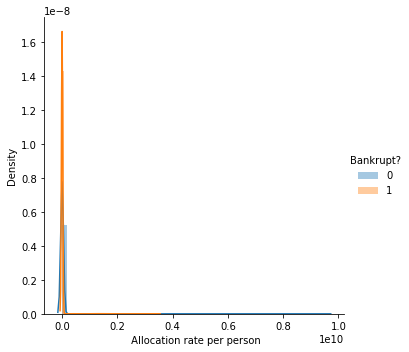

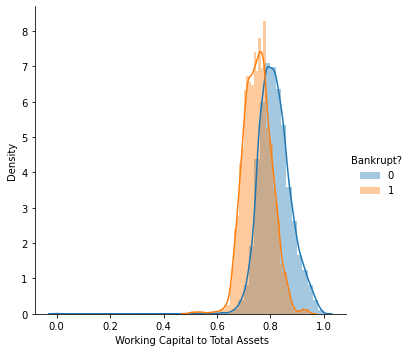

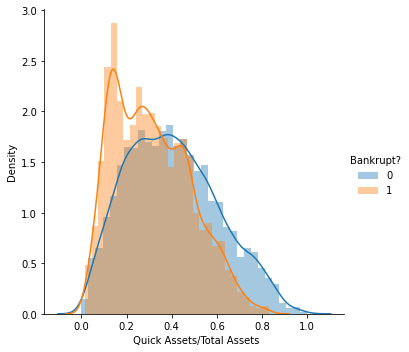

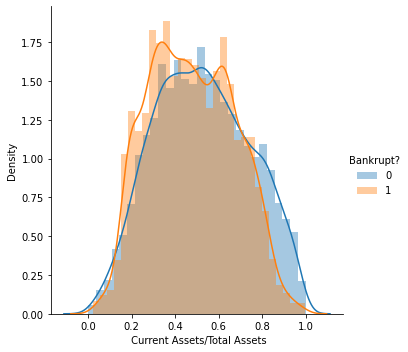

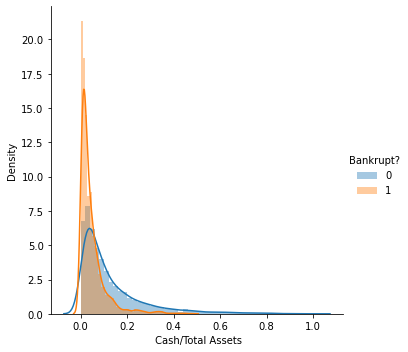

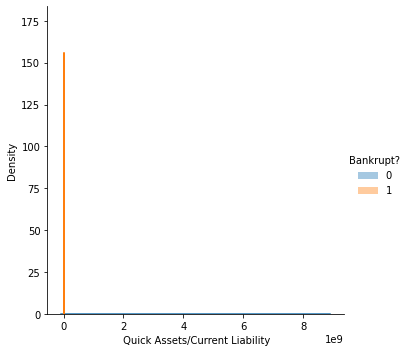

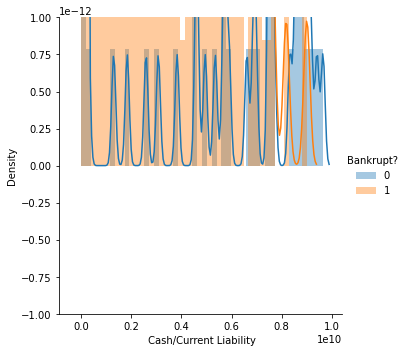

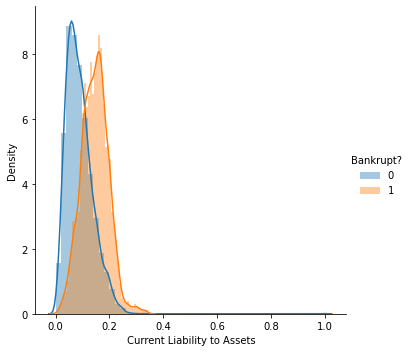

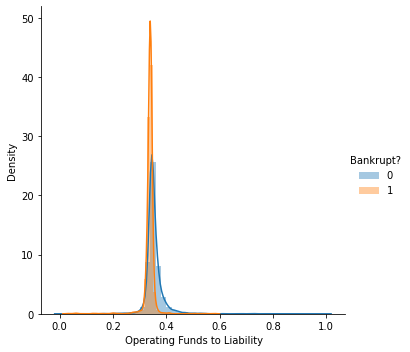

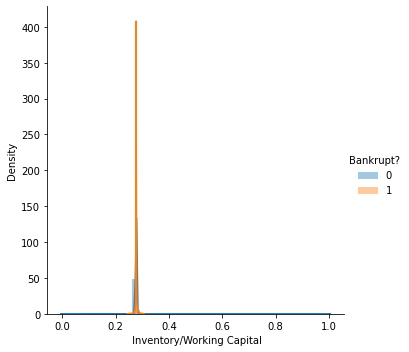

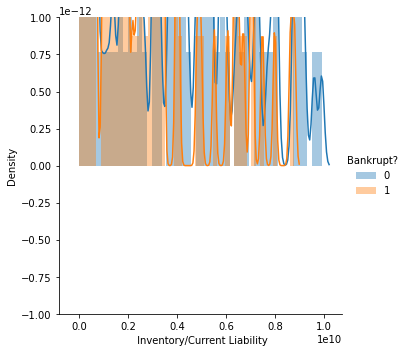

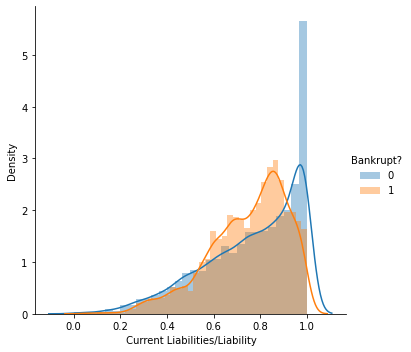

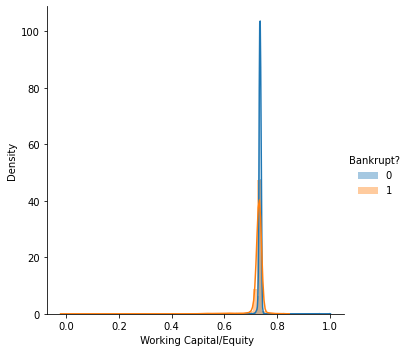

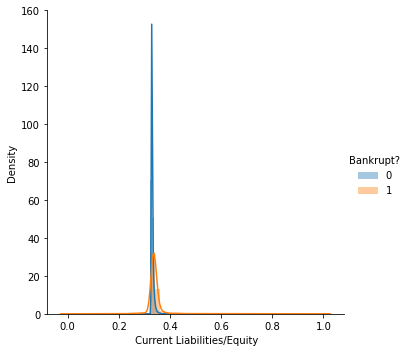

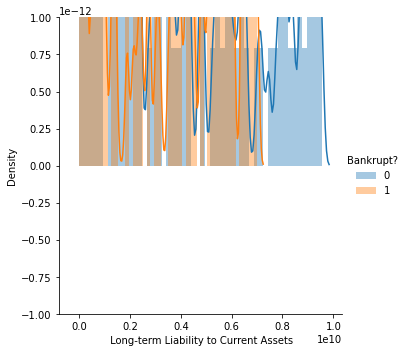

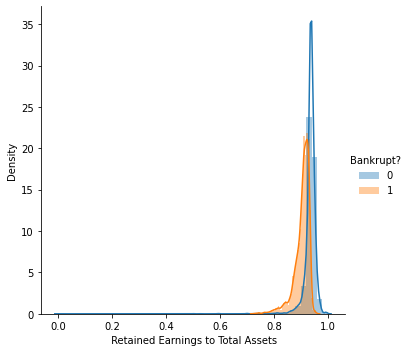

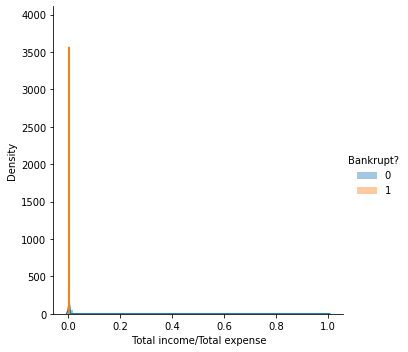

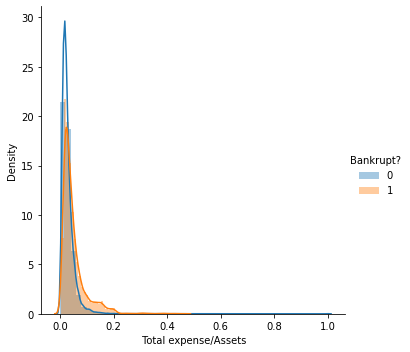

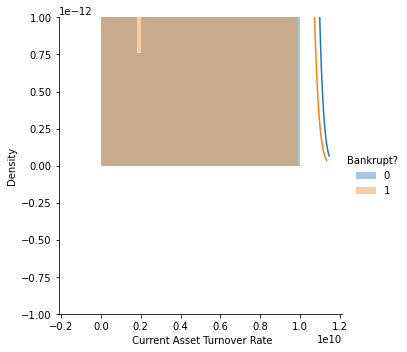

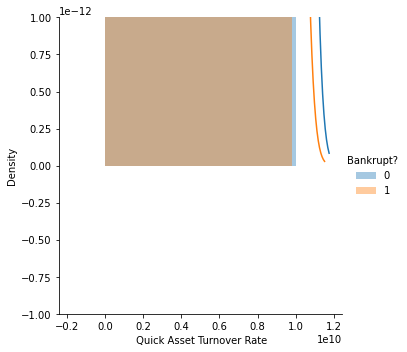

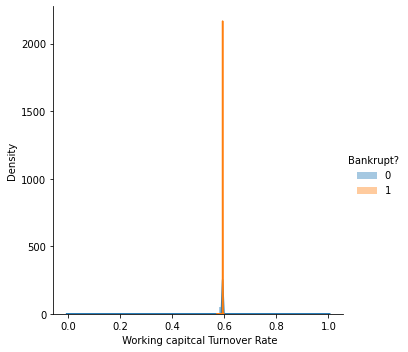

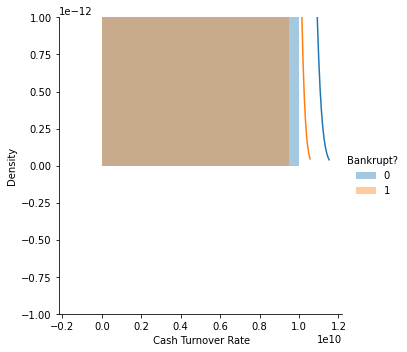

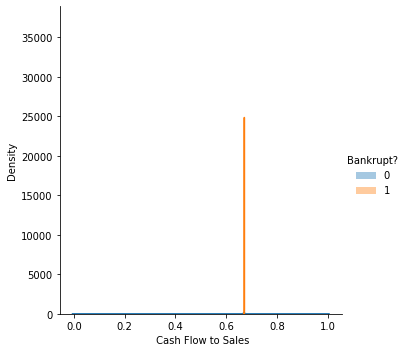

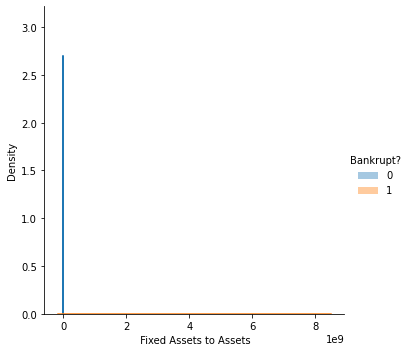

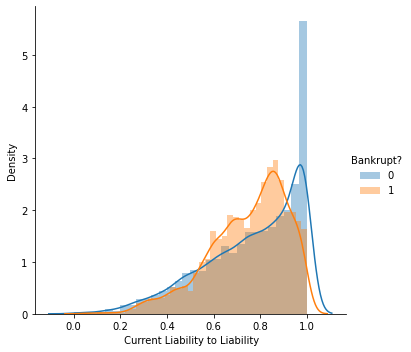

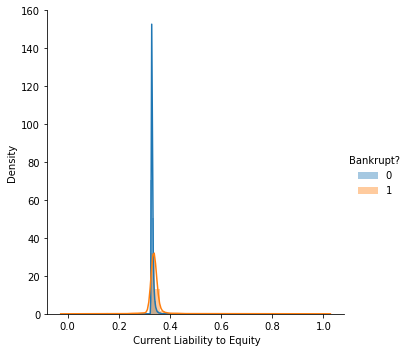

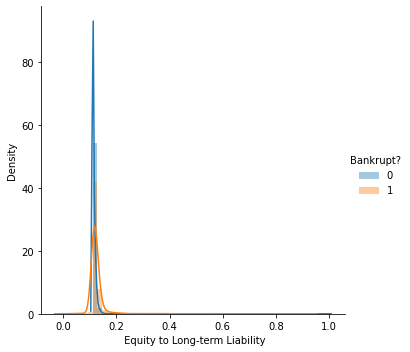

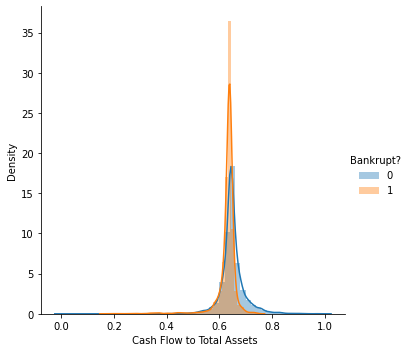

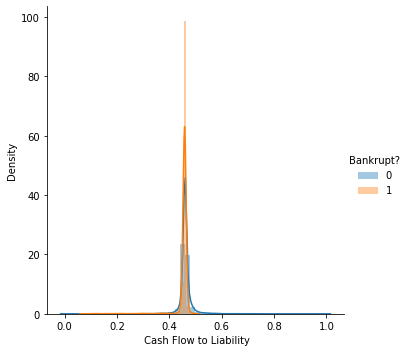

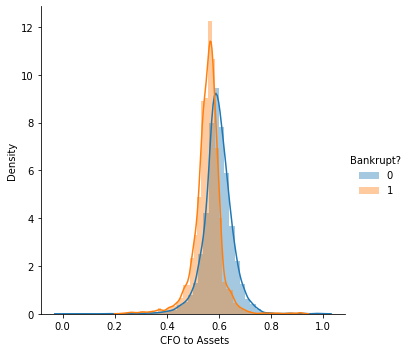

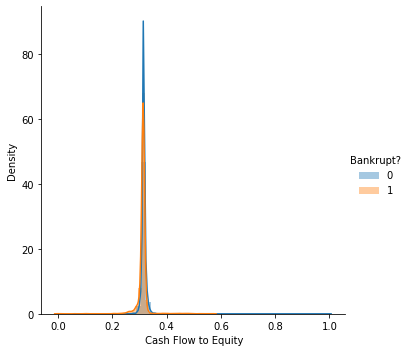

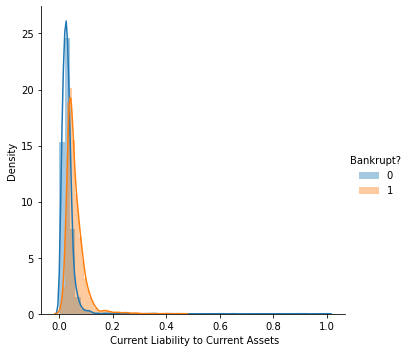

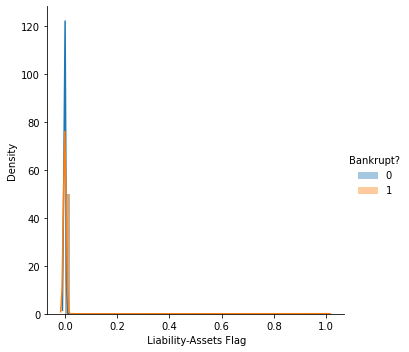

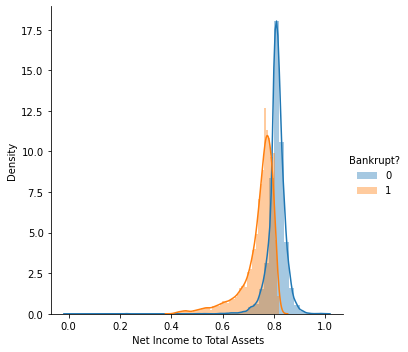

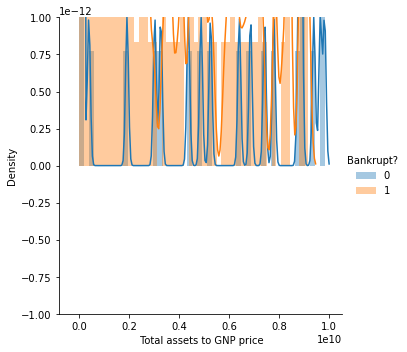

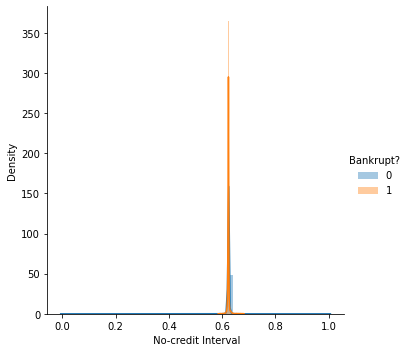

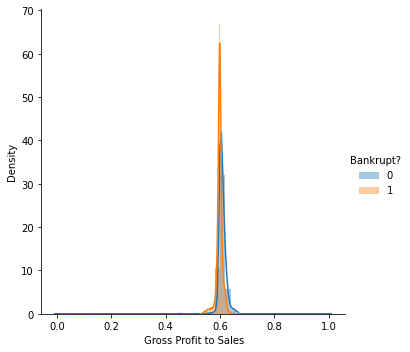

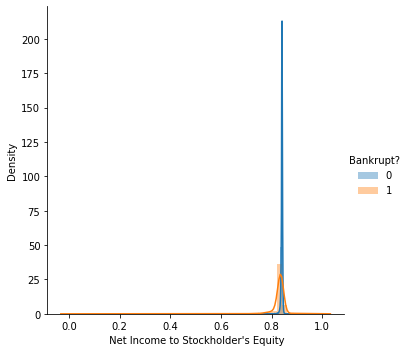

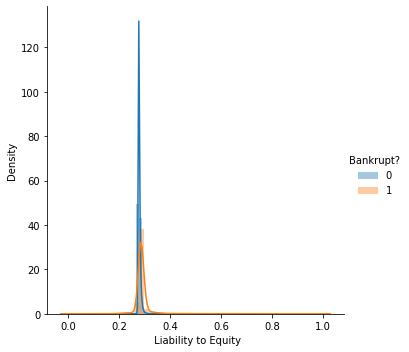

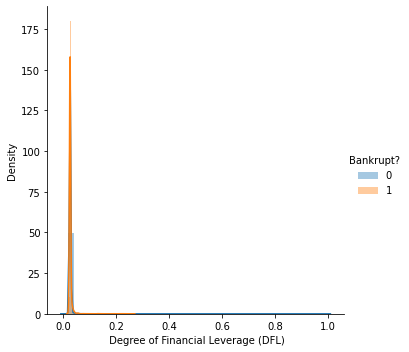

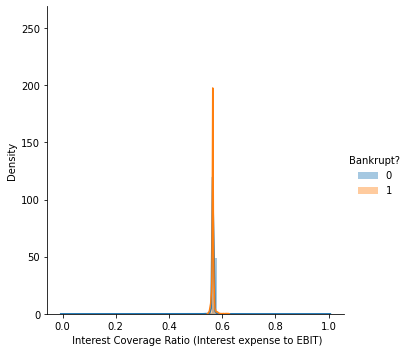

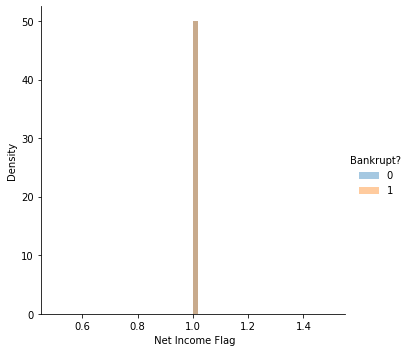

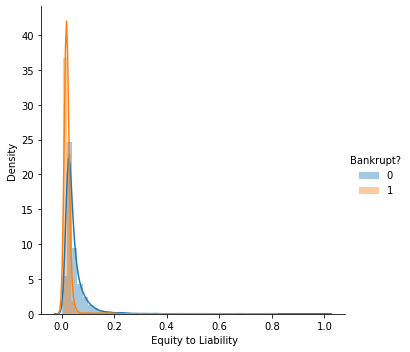

In [ ]:
for i in data.columns[1:]:
 sns.FacetGrid(df, hue="Bankrupt?", height=5).map(sns.distplot, i).add_legend()

In [ ]:
feature_selected = SelectKBest(f_classif,k=30).fit(X_ada,y_ada)

In [ ]:
selected_features = X_ada.columns[feature_selected.get_support()]
selected_features

Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Cash flow rate', ' Tax rate (A)', ' Net Value Per Share (B)',
       ' Net Value Per Share (A)', ' Net Value Per Share (C)',
       ' Persistent EPS in the Last Four Seasons', ' Cash Flow Per Share',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)', ' Debt ratio %',
       ' Net worth/Assets', ' Operating profit/Paid-in capital',
       ' Net profit before tax/Paid-in capital',
       ' Operating profit per person', ' Working Capital to Total Assets',
       ' Cash/Total Assets', ' Current Liability to Assets',
       ' Operating Funds to Liability', ' Retained Earnings to Total Assets',
       ' Total expense/Assets', ' CFO to Assets',
       ' Current Liability to Current Assets', ' Net 

In [ ]:
#undersampling with CNN
Cnn = CondensedNearestNeighbour(n_neighbors=1)
X_cnn,y_cnn = Cnn.fit_resample(X,Y)

In [ ]:
y_cnn.value_counts()

0    778
1    220
Name: Bankrupt?, dtype: int64

In [ ]:
# undersampling with tomek links
tmk= TomekLinks()
X_tmk , y_tmk = tmk.fit_resample(X,Y)

In [ ]:
y_tmk.value_counts()

0    6508
1     220
Name: Bankrupt?, dtype: int64

CNN worked better than tomek for undersampling

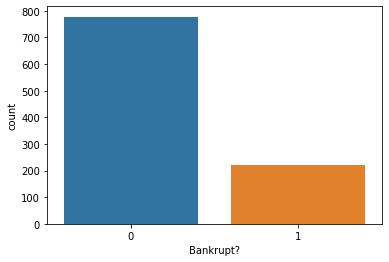

In [ ]:
sns.countplot(x = y_cnn)

In [ ]:
Df = pd.concat([X_cnn,y_cnn],axis=1)

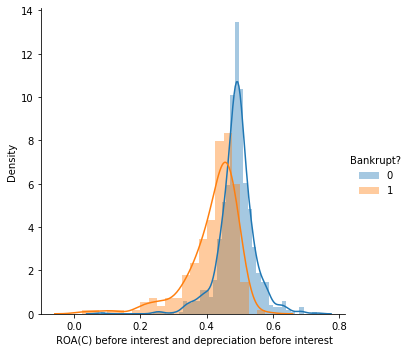

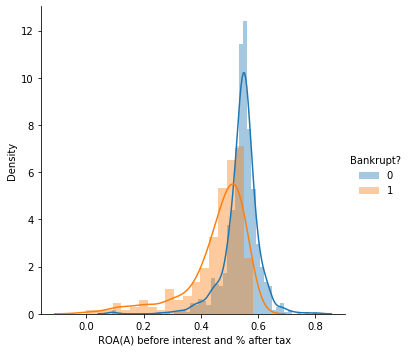

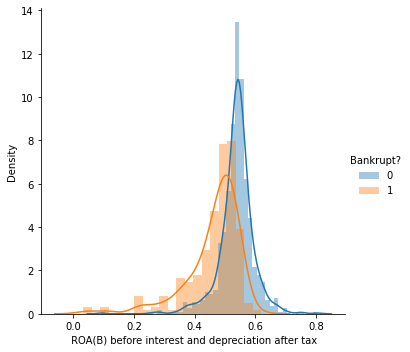

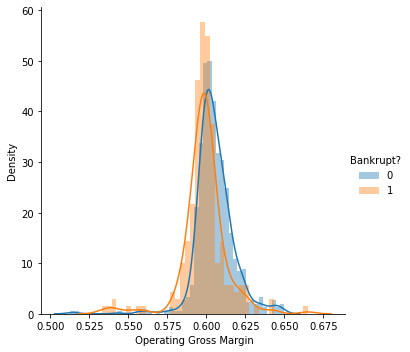

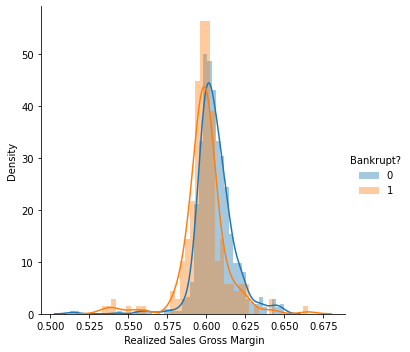

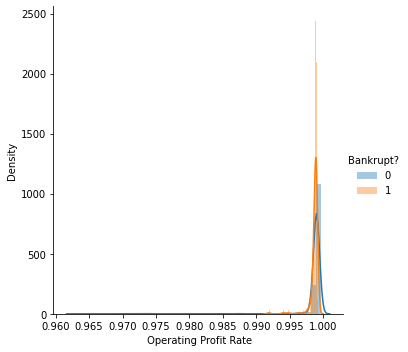

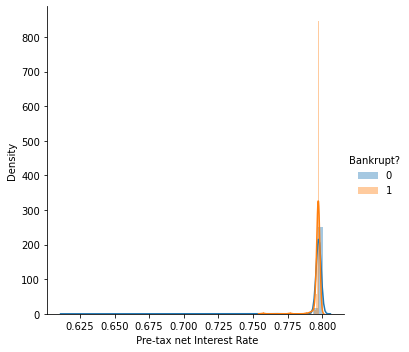

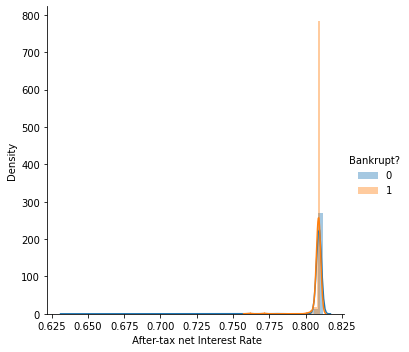

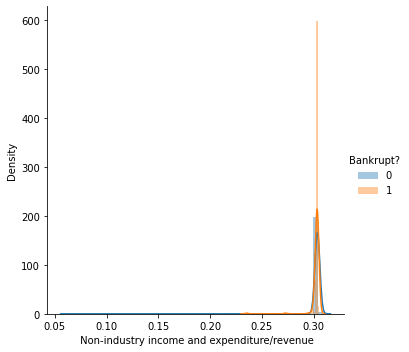

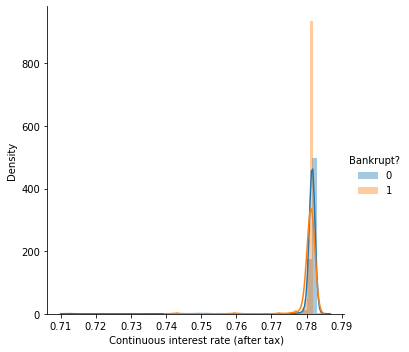

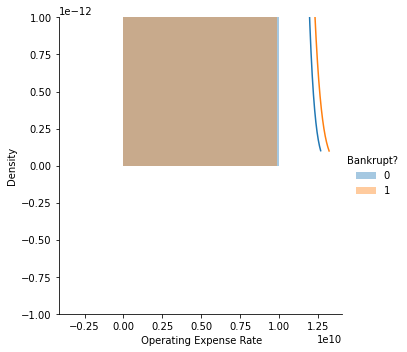

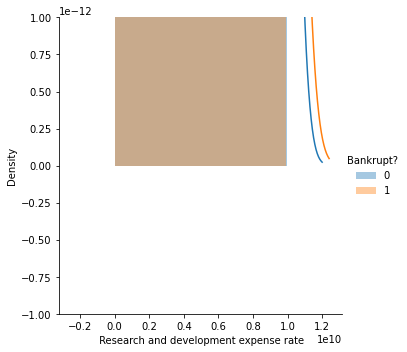

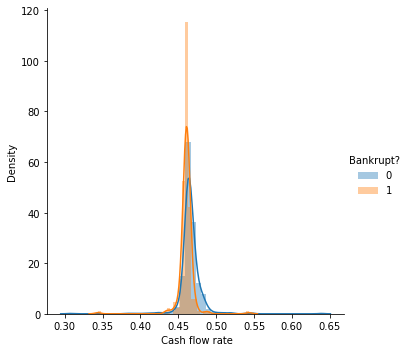

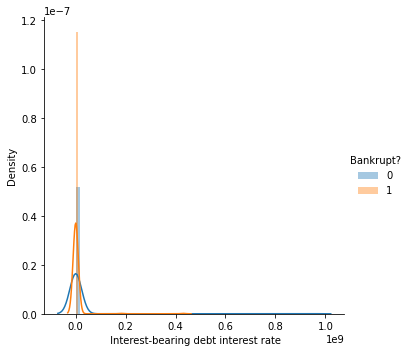

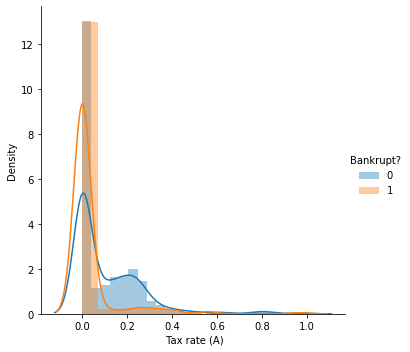

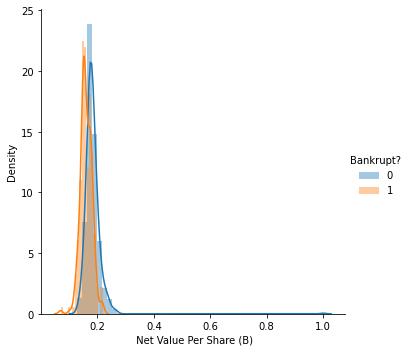

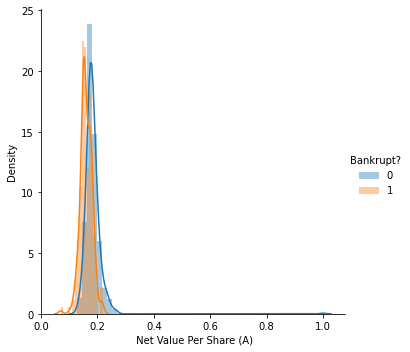

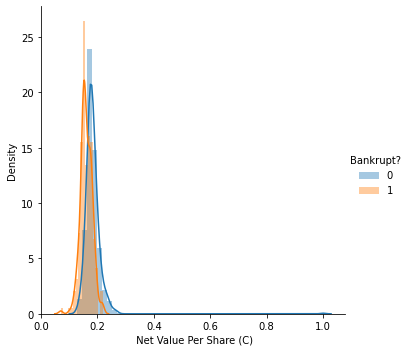

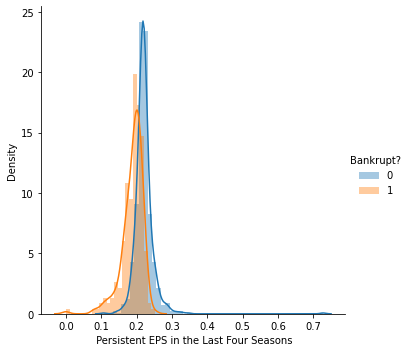

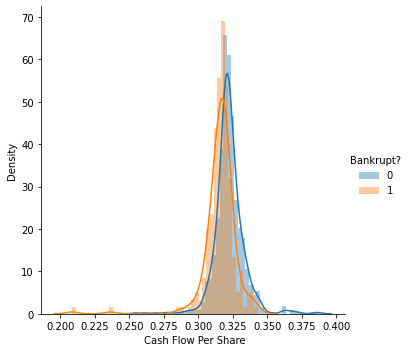

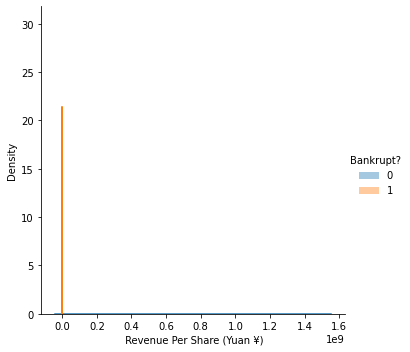

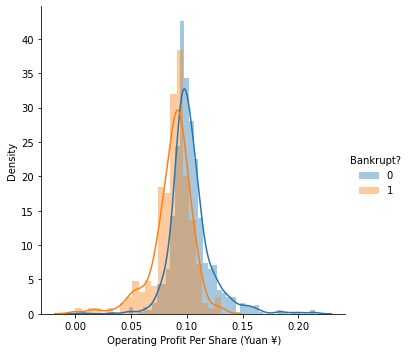

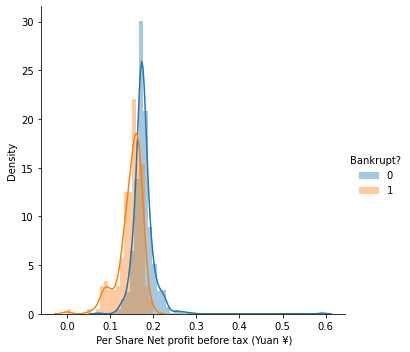

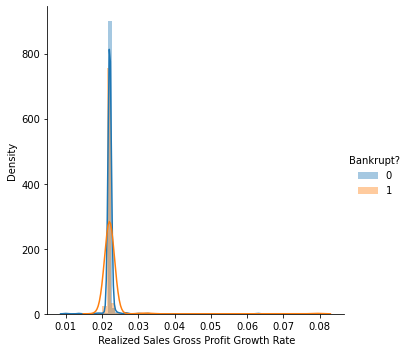

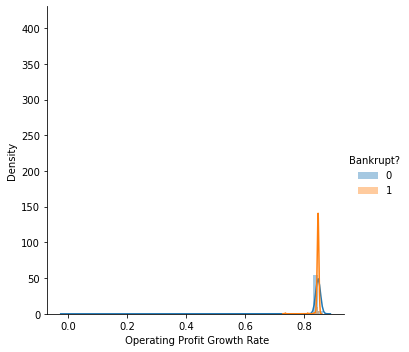

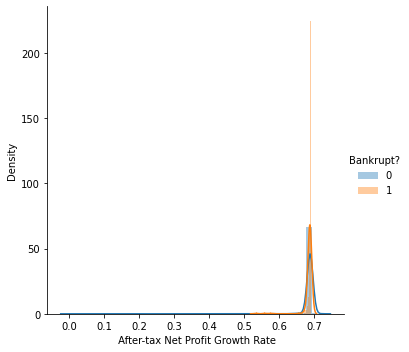

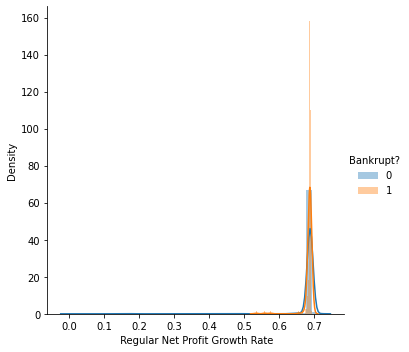

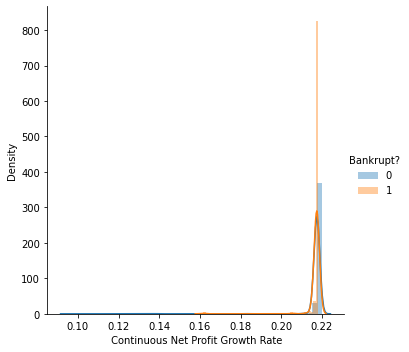

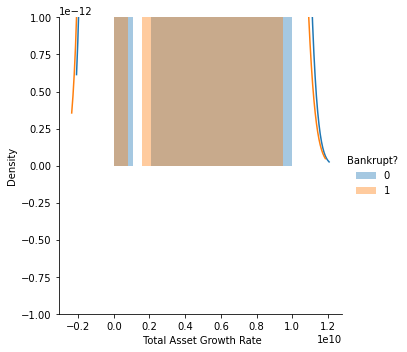

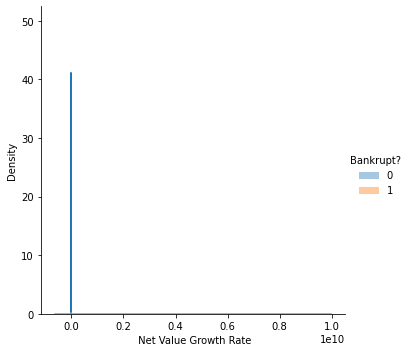

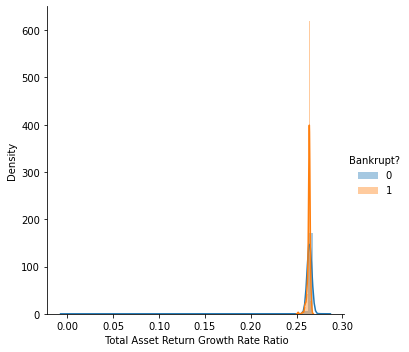

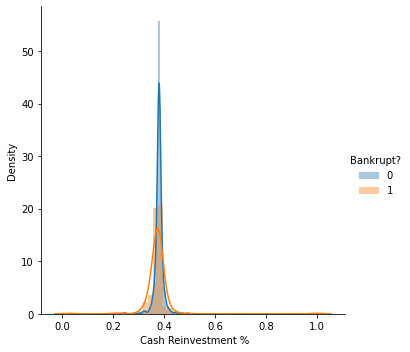

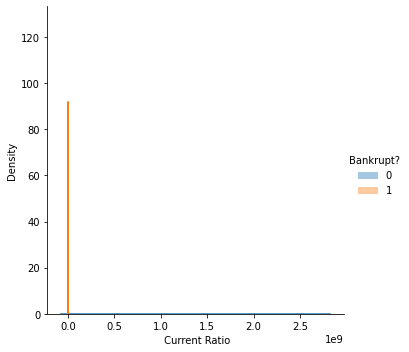

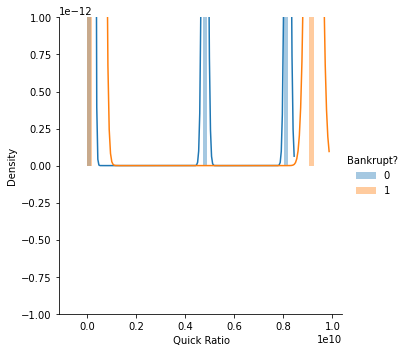

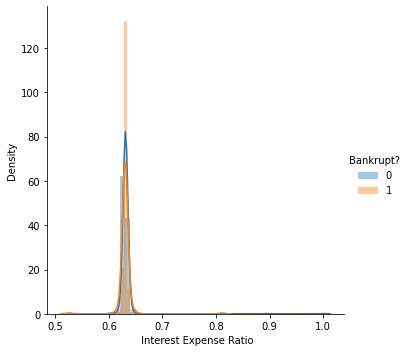

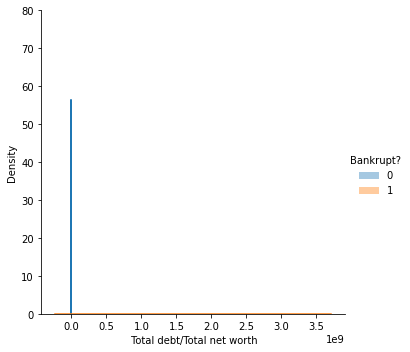

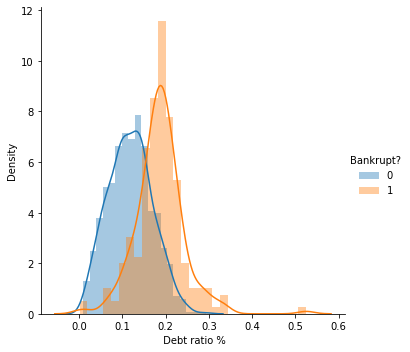

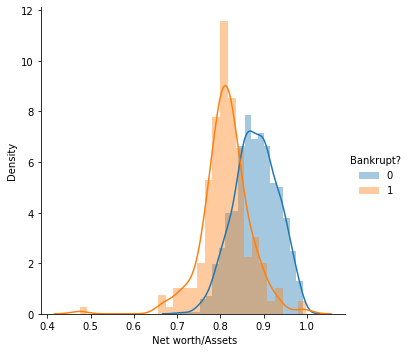

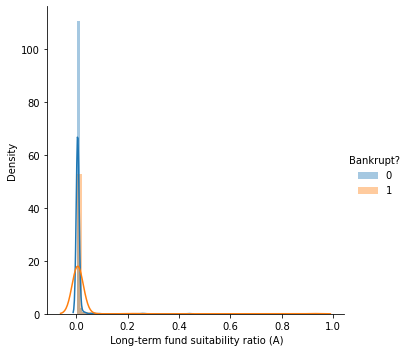

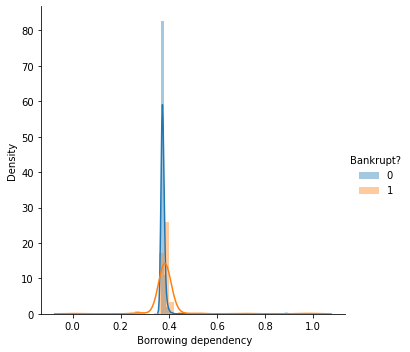

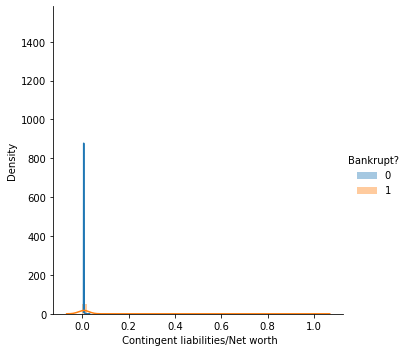

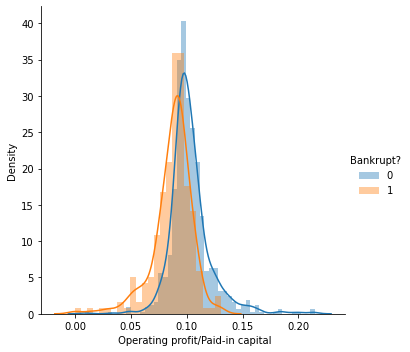

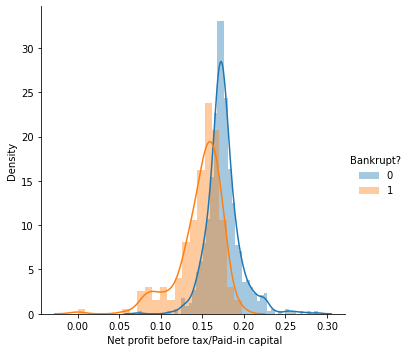

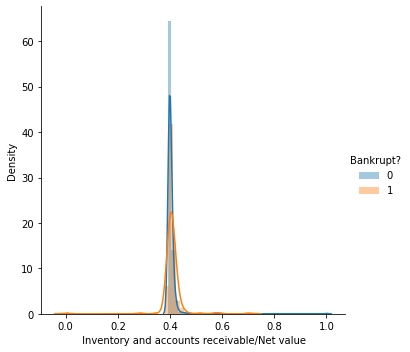

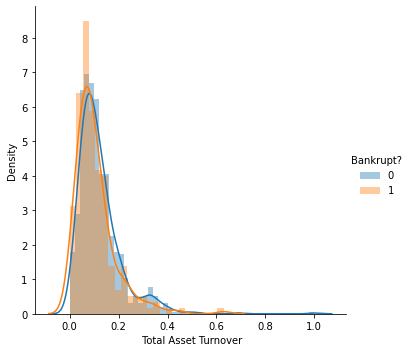

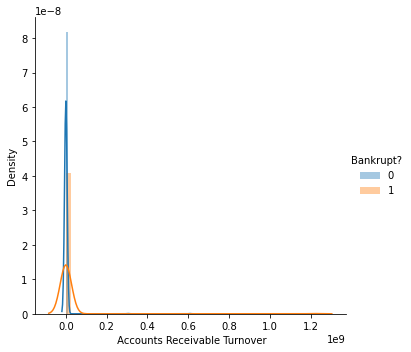

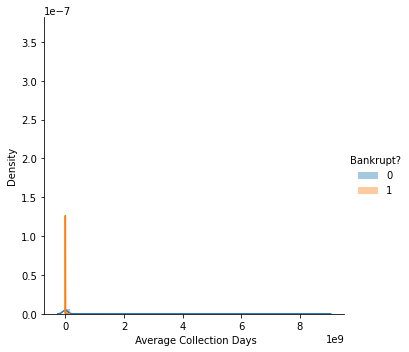

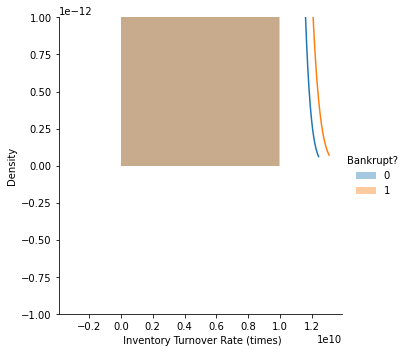

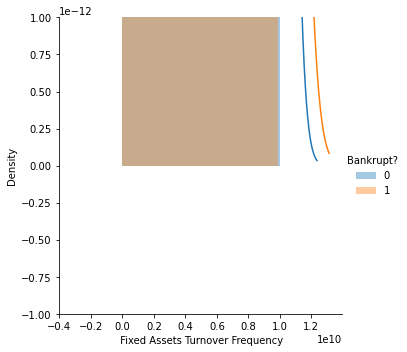

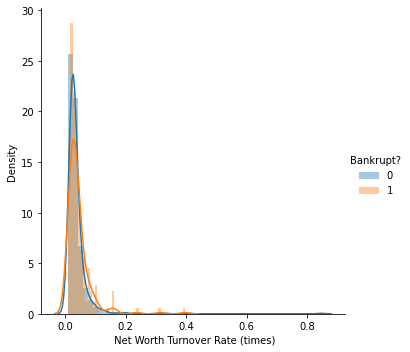

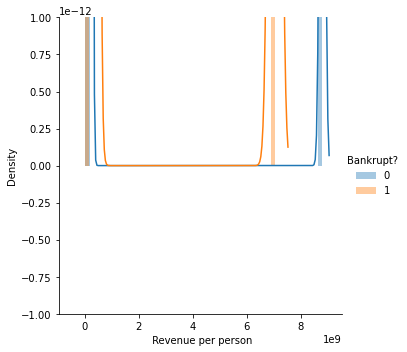

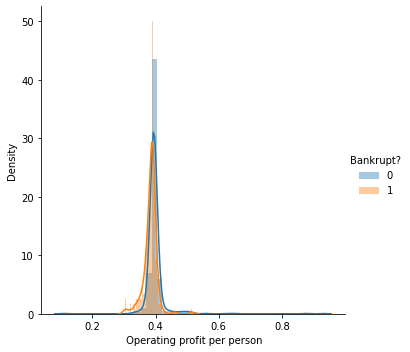

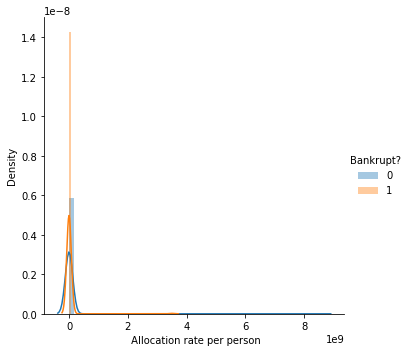

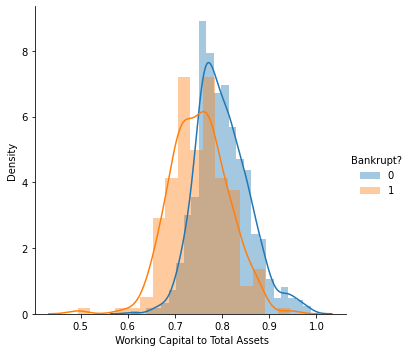

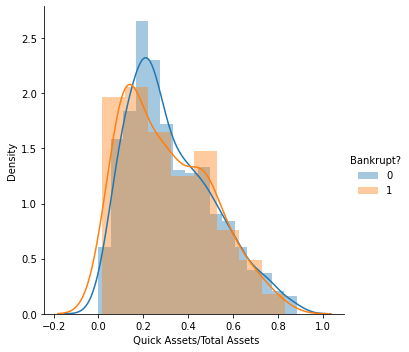

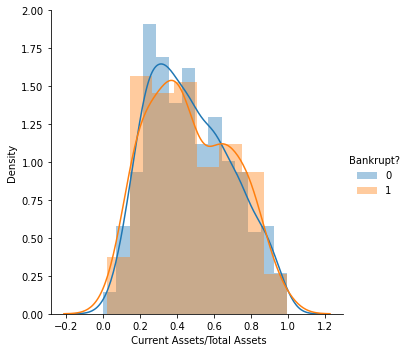

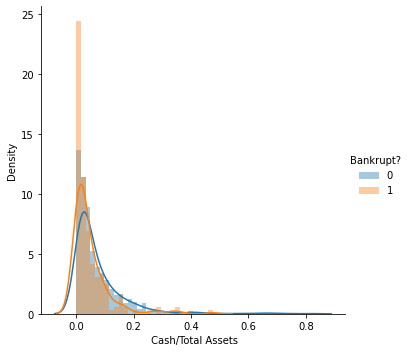

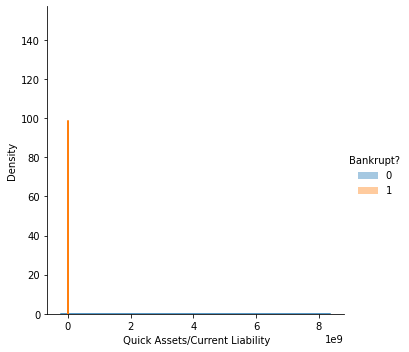

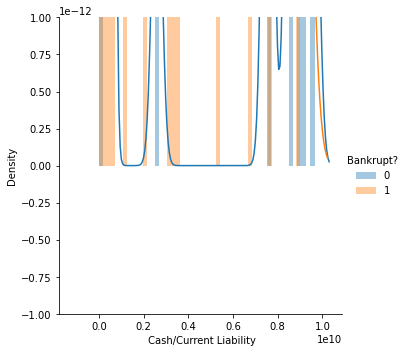

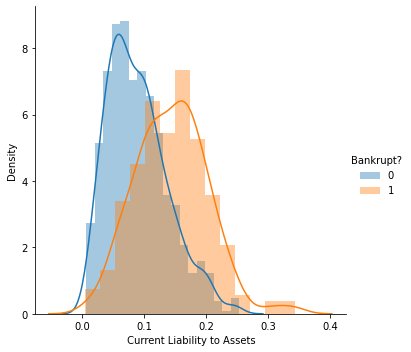

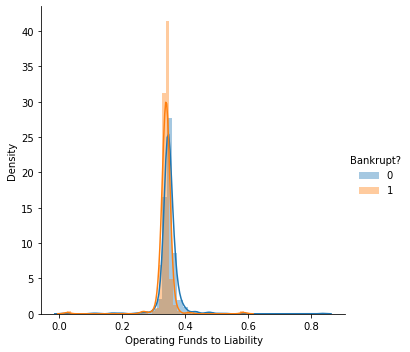

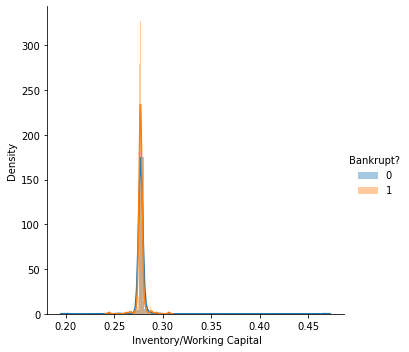

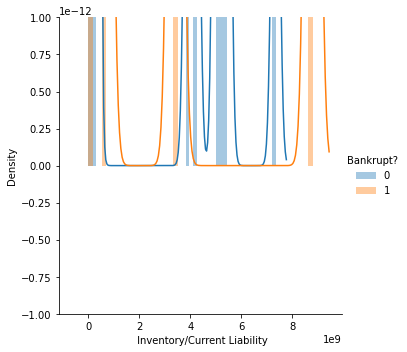

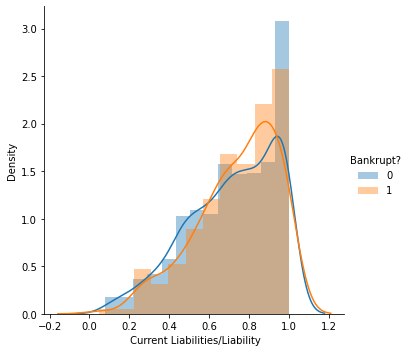

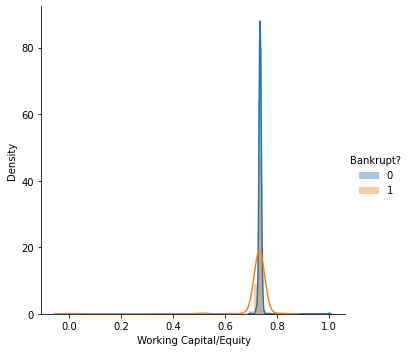

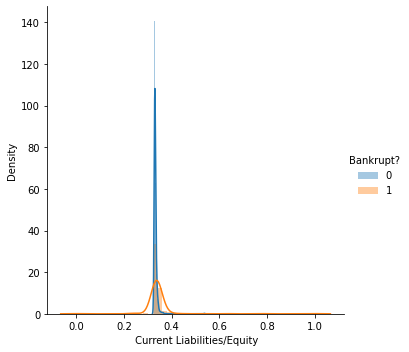

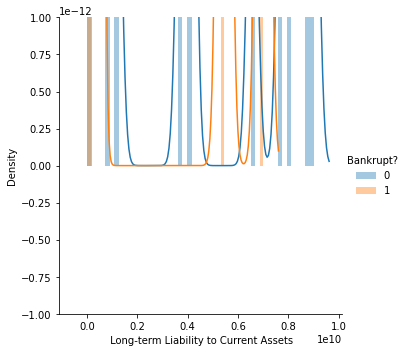

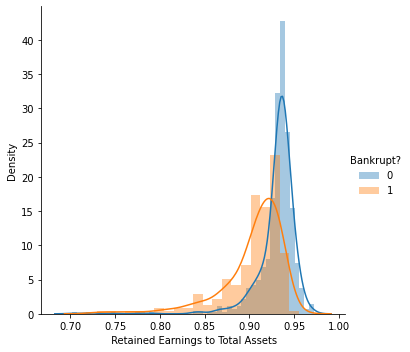

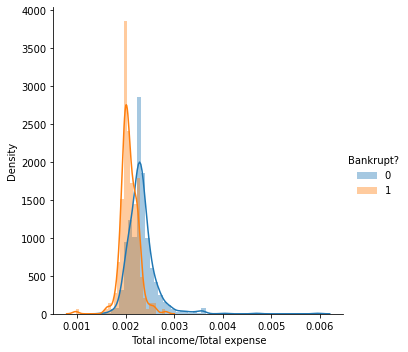

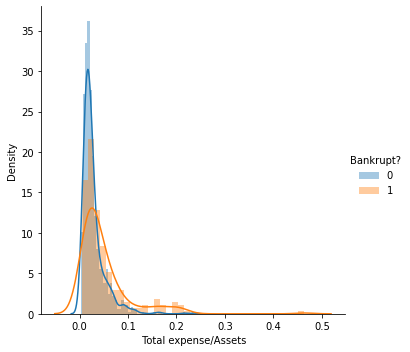

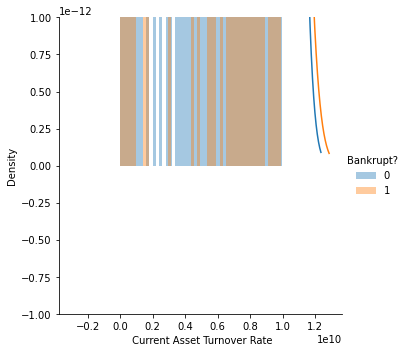

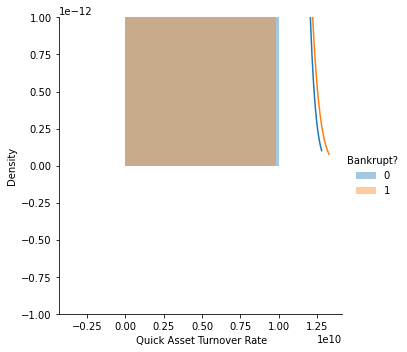

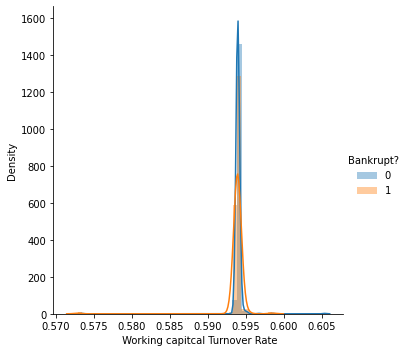

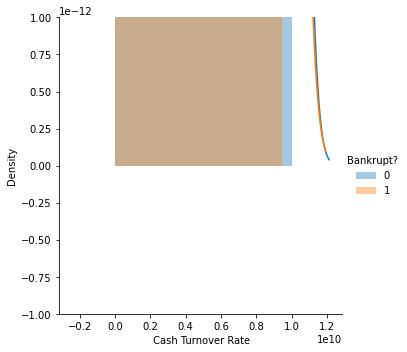

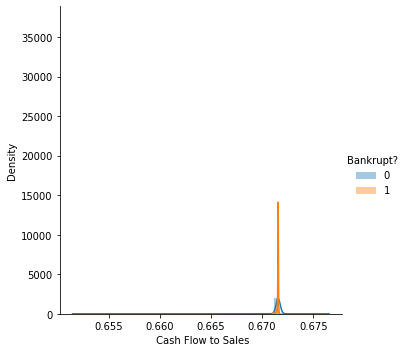

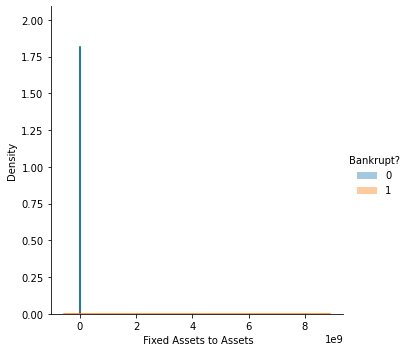

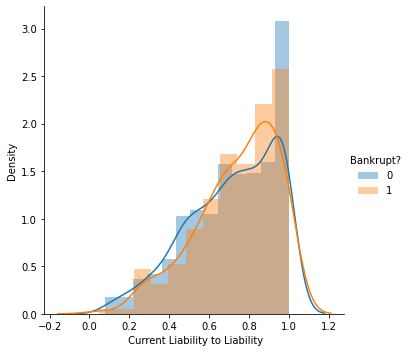

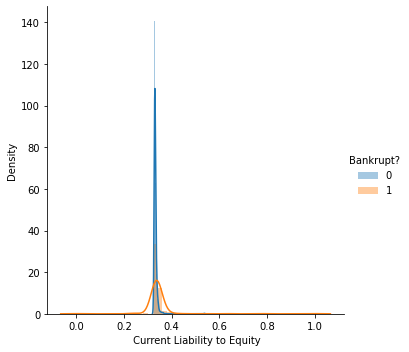

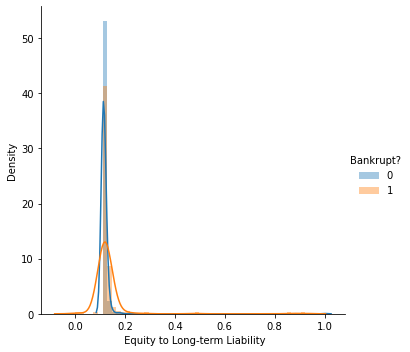

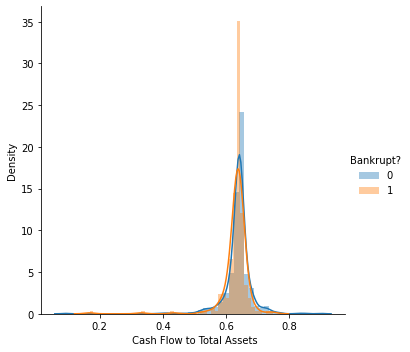

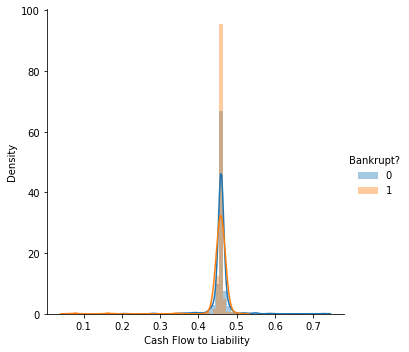

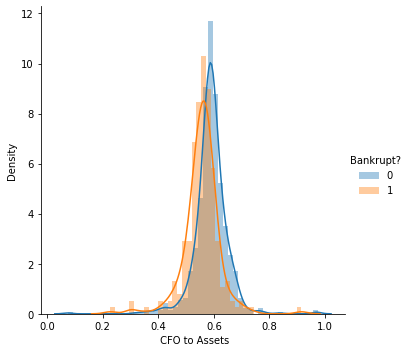

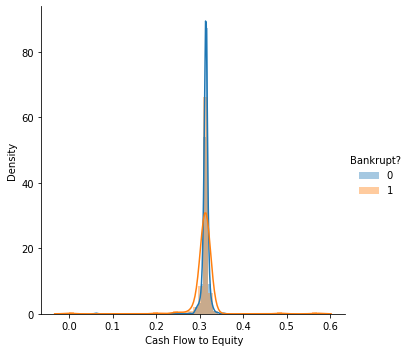

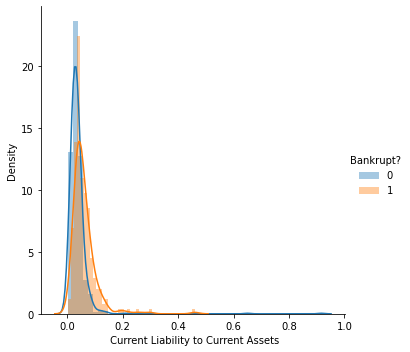

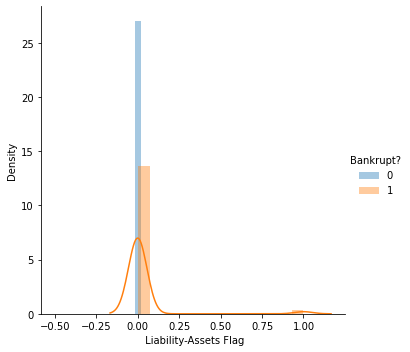

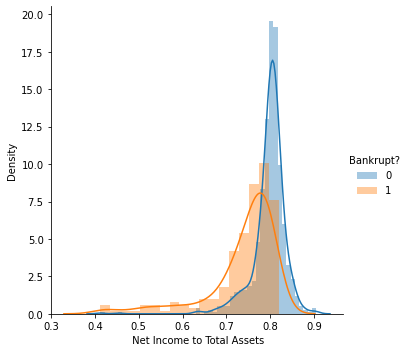

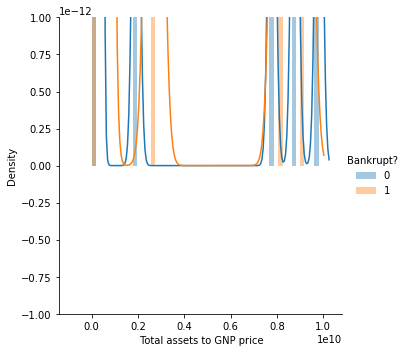

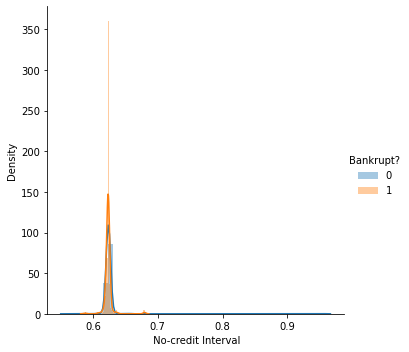

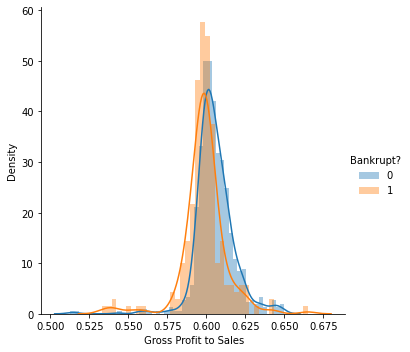

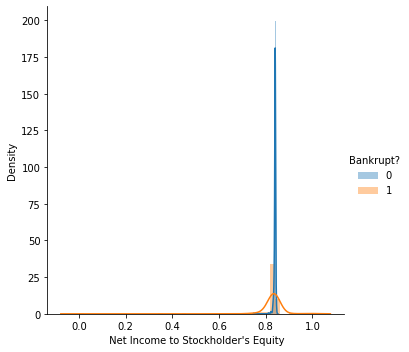

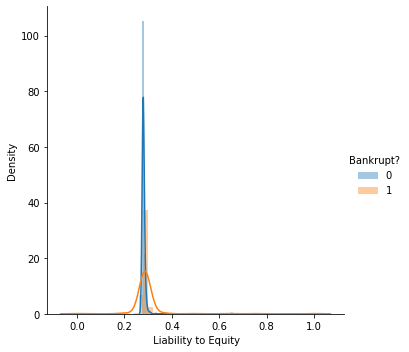

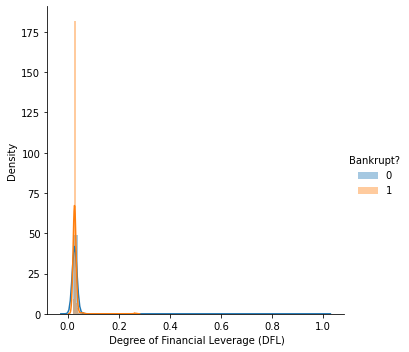

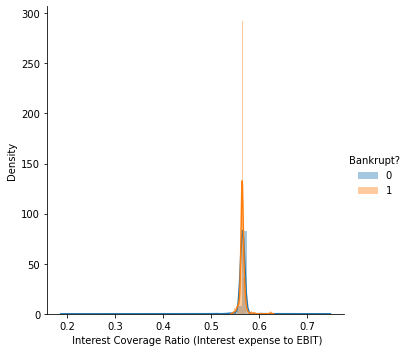

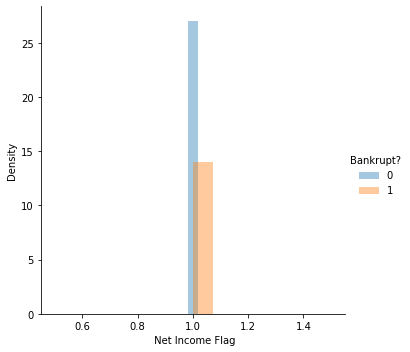

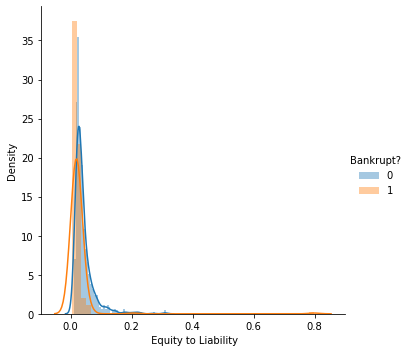

In [ ]:
for i in data.columns[1:]:
 sns.FacetGrid(Df, hue="Bankrupt?", height=5).map(sns.distplot, i).add_legend()

In [ ]:
feature_select = SelectKBest(f_classif,k=30).fit(X_cnn,y_cnn)

In [ ]:
select_features = X_cnn.columns[feature_select.get_support()]
select_features

Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Tax rate (A)', ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)', ' Debt ratio %',
       ' Net worth/Assets', ' Borrowing dependency',
       ' Operating profit/Paid-in capital',
       ' Net profit before tax/Paid-in capital',
       ' Operating profit per person', ' Working Capital to Total Assets',
       ' Current Liability to Assets', ' Retained Earnings to Total Assets',
       ' Total income/Total expense', ' Total expense/Assets',
       ' CFO to Assets', ' Current Liability to Current Assets',
       ' Net Income to Total As

In [ ]:
# sf = list(select_features)
# print(sf)
# sf.append( "Bankrupt?")
# sns.pairplot(data = Df[sf] ,hue='Bankrupt?' )

In [ ]:
# sf1 = list(selected_features)
# print(sf1)
# sf1.append( "Bankrupt?")
# sns.pairplot(data = df[sf1] ,hue='Bankrupt?' )

In [ ]:
# fig, ax = plt.subplots(figsize = (8,8))
# sns.heatmap(df[sf1].corr(),linewidth = 0.5)

In [ ]:
# fig, ax = plt.subplots(figsize = (8,8))
# sns.heatmap(Df[sf1].corr(),linewidth = 0.5)

##Logistic Regression

In [ ]:
def Logistic(x_train,y_train,x_test,y_test):

  regressor=LogisticRegression(random_state=0)
  regressor.fit(x_train,y_train)
  y_pred=regressor.predict(x_test)
  
  print('Logistic Regression')
  print('Accuracy score -> ',accuracy_score(y_test, y_pred))
  print("Precision score ->",precision_score(y_test, y_pred, average="macro"))
  print('Recall score - > ',recall_score(y_test, y_pred, average="micro"))
  print()

In [ ]:
def binomial(x_train,y_train,x_test,y_test):

  BernNB = BernoulliNB(binarize = True)
  BernNB.fit(x_train, y_train)
  y_pred = BernNB.predict(x_test)

  print('Binomial naive bayes')
  print('Accuracy score -> ',accuracy_score(y_test, y_pred))
  print("Precision score ->",precision_score(y_test, y_pred, average="macro"))
  print('Recall score - > ',recall_score(y_test, y_pred, average="micro"))
  print()

In [ ]:
def gaussian(x_train,y_train,x_test,y_test):

  GausNB = GaussianNB()
  GausNB.fit(x_train, y_train)
  y_pred = GausNB.predict(x_test)

  print('Gaussian naive bayes')
  print('Accuracy score -> ',accuracy_score(y_test, y_pred))
  print("Precision score ->",precision_score(y_test, y_pred, average="macro"))
  print('Recall score - > ',recall_score(y_test, y_pred, average="micro"))
  print()

In [ ]:
def sampling(features,x_cnn,y_cnn):
  x_cnn = x_cnn[features]
  y_cnn=y_cnn
  x_train,x_test,y_train,y_test =  train_test_split(x_cnn,y_cnn, test_size=0.2, random_state=18)
  Logistic(x_train,y_train,x_test,y_test)
  print()
  binomial(x_train,y_train,x_test,y_test)
  print()
  gaussian(x_train,y_train,x_test,y_test)
  print()



In [ ]:
print('Undersampling\n')
sampling(select_features ,X_cnn , y_cnn)
print("Over-sampling\n")
sampling(selected_features ,X_ada , y_ada)


Undersampling

Logistic Regression
Accuracy score ->  0.86
Precision score -> 0.801838610827375
Recall score - >  0.86


Binomial naive bayes
Accuracy score ->  0.81
Precision score -> 0.405
Recall score - >  0.81


Gaussian naive bayes
Accuracy score ->  0.835
Precision score -> 0.7333179935572941
Recall score - >  0.835


Over-sampling

Logistic Regression
Accuracy score ->  0.8841904761904762
Precision score -> 0.8852195344049409
Recall score - >  0.8841904761904762


Binomial naive bayes
Accuracy score ->  0.4979047619047619
Precision score -> 0.24895238095238095
Recall score - >  0.4979047619047619


Gaussian naive bayes
Accuracy score ->  0.8598095238095238
Precision score -> 0.8626247968831218
Recall score - >  0.8598095238095238




## Dimensionality Reduction

## Undersampling

In [ ]:
def accuracy(x, y):
  ans = 0; 
  for i in range(len(x)):
    # print(x[i])
    # print(y)
    if (x[i] == y[i]):
      ans += 1; 
  return ans/len(x)

df = pd.concat([X_cnn,y_cnn],axis=1)

df = df.sample(frac = 1, replace = False)
print(df.columns)
X_cnn = df[list(df.columns)[:-1]]
y_cnn = df[list(df.columns)[-1]]
print(type(X_cnn))
print(type(y_cnn))


# print(X_cnn)
print(X_cnn.shape)
# df = pd.concat(X_cnn, y_cnn)
X_train = X_cnn[:804]
print(X_train)
y_train = y_cnn[:804]
X_test = X_cnn[804:]
y_test = y_cnn[804:]


Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit Growth Rate'

In [ ]:
import numpy as np
from sklearn.decomposition import PCA

import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components = 95)
pca.fit(X_train)

PCA(n_components=95)

In [ ]:
variance_ratios = pca.explained_variance_ratio_

cum_variance = []
cum_variance.append(variance_ratios[0])
for i in range(1, len(variance_ratios)):
  cum_variance.append(variance_ratios[i] + cum_variance[i - 1])


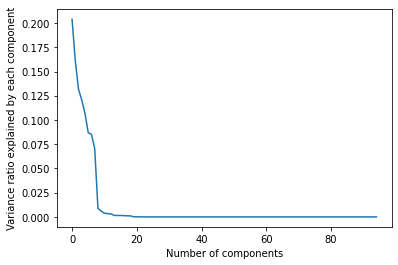

In [ ]:
import matplotlib.pyplot as plt

explained_variance_ratio = pca.explained_variance_ratio_
plt.plot(explained_variance_ratio)
plt.xlabel("Number of components")
plt.ylabel("Variance ratio explained by each component")
plt.savefig("pca_individual_variance.png")

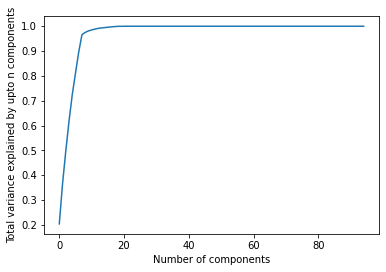

In [ ]:
import matplotlib.pyplot as plt

plt.plot(cum_variance)
plt.xlabel("Number of components")
plt.ylabel("Total variance explained by upto n components")
plt.savefig("pca_total_variance_across_first_n_components.png")

### Factor Analysis 

(95, 10)


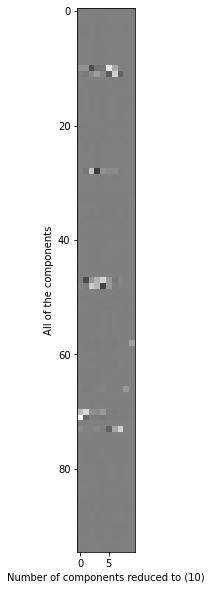

In [ ]:
from sklearn.decomposition import FactorAnalysis

transformer_factor_analysis = FactorAnalysis(n_components=10, random_state=0)
transformer_factor_analysis.fit(X_train)

import matplotlib.pyplot as plt
components = transformer_factor_analysis.components_.T
print(components.shape)
# print(components)
# plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.figure(figsize=(20, 10))
plt.xlabel("Number of components reduced to (10)")
plt.ylabel("All of the components")
plt.imshow(components, cmap="gray", vmax=np.abs(components).max(), vmin=-np.abs(components).max())

plt.savefig("FactorAnalysis_without_rotation.png")

(95, 10)


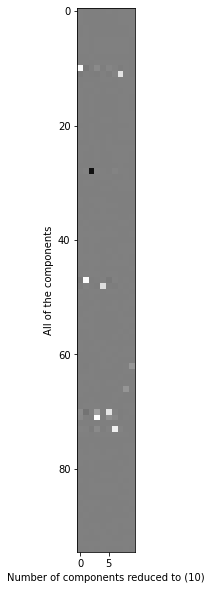

In [ ]:
from sklearn.decomposition import FactorAnalysis

transformer_factor_analysis_rotation = FactorAnalysis(n_components=10, random_state=0, rotation = "varimax")
transformer_factor_analysis_rotation.fit(X)
X_varimax_fa = transformer_factor_analysis_rotation.transform(X)
import matplotlib.pyplot as plt
components = transformer_factor_analysis_rotation.components_.T
print(components.shape)
# print(components)
# plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.figure(figsize=(20, 10))
plt.xlabel("Number of components reduced to (10)")
plt.ylabel("All of the components")
plt.imshow(components, cmap="gray", vmax=np.abs(components).max(), vmin=-np.abs(components).max())

plt.savefig("FactorAnalysis_with_rotation.png")

(95, 10)


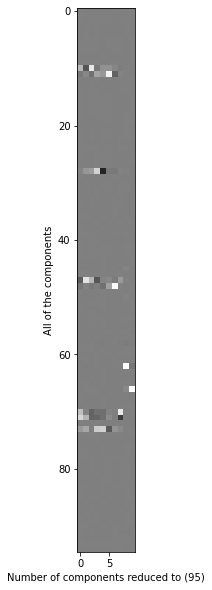

In [ ]:
import matplotlib.pyplot as plt

pca = PCA(n_components = 10)
pca.fit(X)

components = pca.components_.T
print(components.shape)
# print(components)
# plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.figure(figsize=(20, 10))
plt.xlabel("Number of components reduced to (95)")
plt.ylabel("All of the components")
plt.imshow(components, cmap="gray", vmax=np.abs(components).max(), vmin=-np.abs(components).max())

plt.savefig("PCA_matrix.png")

### Truncated SVD

In [ ]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
import numpy as np

X_dense = csr_matrix(X_train)
svd = TruncatedSVD(n_components= 10, n_iter=100, random_state=0)
svd.fit(X_dense)
X_svd = svd.transform(X_dense)
print(svd.explained_variance_ratio_)

print(svd.explained_variance_ratio_.sum())

print(svd.singular_values_)

[0.12600399 0.18739594 0.14877713 0.12722482 0.11520913 0.10600313
 0.0852506  0.07040225 0.00882249 0.00600118]
0.9810906569061889
[2.22832654e+11 1.05289479e+11 9.37676201e+10 8.65107264e+10
 8.23852986e+10 7.89044886e+10 7.07462640e+10 6.42910532e+10
 2.27685544e+10 1.87712618e+10]


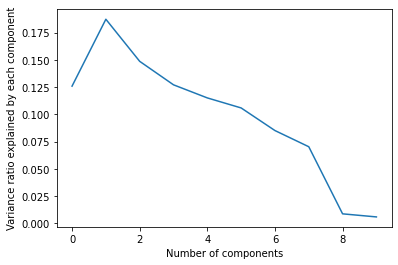

In [ ]:
import matplotlib.pyplot as plt

explained_variance_ratio = svd.explained_variance_ratio_
plt.plot(explained_variance_ratio)
plt.xlabel("Number of components")
plt.ylabel("Variance ratio explained by each component")
plt.savefig("svd_individual_variance.png")

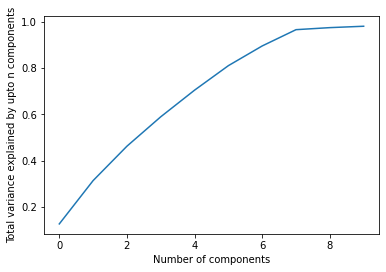

In [ ]:
import matplotlib.pyplot as plt

cum_variance = []
cum_variance.append(explained_variance_ratio[0])
for i in range(1, len(explained_variance_ratio)):
  cum_variance.append(explained_variance_ratio[i] + cum_variance[i - 1])
plt.plot(cum_variance)
plt.xlabel("Number of components")
plt.ylabel("Total variance explained by upto n components")
plt.savefig("svd_total_variance_across_first_n_components.png")

### LDA

In [ ]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)

print(accuracy(y_pred, y_test.to_numpy()))


0.8350515463917526


### Kernel PCA

In [ ]:
from sklearn.decomposition import PCA, KernelPCA
transformer_kernel_linear_10 = KernelPCA(n_components=10, kernel='linear')
X_linear_kernel_10 = transformer_kernel_linear_10.fit_transform(X_train)
X_linear_kernel_10.shape

from sklearn.decomposition import PCA, KernelPCA
transformer_kernel_linear_20 = KernelPCA(n_components=20, kernel='linear')
X_linear_kernel_20 = transformer_kernel_linear_20.fit_transform(X_train)
X_linear_kernel_20.shape


(804, 20)

In [ ]:
from sklearn.decomposition import PCA, KernelPCA
transformer_poly_kernel_10 = KernelPCA(n_components=10, kernel='poly')
X_poly_kernel_10 = transformer_poly_kernel_10.fit_transform(X_train)
X_poly_kernel_10.shape

transformer_poly_kernel_20 = KernelPCA(n_components=20, kernel='poly')
X_poly_kernel_20 = transformer_poly_kernel_20.fit_transform(X_train)
X_poly_kernel_20.shape


(804, 20)

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X_pca_train = pca.transform(X_train)
X_fa_train = transformer_factor_analysis.transform(X_train)
X_fa_rotation_train = transformer_factor_analysis_rotation.transform(X_train)

X_pca_test = pca.transform(X_test)
X_fa_test = transformer_factor_analysis.transform(X_test)
X_fa_rotation_test = transformer_factor_analysis_rotation.transform(X_test)


In [ ]:
clf_rf = RandomForestClassifier(random_state=0)
clf_rf.fit(X_train, y_train)
y_pred = clf_rf.predict(X_test)
print(accuracy(y_pred, y_test.to_numpy()))

0.8556701030927835


In [ ]:
clf_rf = RandomForestClassifier(random_state=0)
clf_rf.fit(X_pca_train, y_train)
y_pred = clf_rf.predict(X_pca_test)
print(accuracy(y_pred, y_test.to_numpy()))

0.7835051546391752


In [ ]:
clf_rf = RandomForestClassifier(random_state=0)
clf_rf.fit(X_fa_train, y_train)
y_pred = clf_rf.predict(X_fa_test)
print(accuracy(y_pred, y_test.to_numpy()))

0.7783505154639175


In [ ]:
clf_rf = RandomForestClassifier(random_state=0)
clf_rf.fit(X_fa_rotation_train, y_train)
y_pred = clf_rf.predict(X_fa_rotation_test)
print(accuracy(y_pred, y_test.to_numpy()))


0.7577319587628866


In [ ]:
X_poly_kernel_test_10 = transformer_poly_kernel_10.transform(X_test)
# X_rbf_kernel_test = transformer_rbf_kernel.transform(X_test)
X_linear_kernel_test_10 = transformer_kernel_linear_10.transform(X_test)

In [ ]:
clf_rf = RandomForestClassifier(random_state=0)
clf_rf.fit(X_poly_kernel_10, y_train)
y_pred = clf_rf.predict(X_poly_kernel_test_10)
print(accuracy(y_pred, y_test.to_numpy()))

0.7525773195876289


In [ ]:
clf_rf = RandomForestClassifier(random_state=0)
clf_rf.fit(X_linear_kernel_10, y_train)
y_pred = clf_rf.predict(X_linear_kernel_test_10)
print(accuracy(y_pred, y_test.to_numpy()))

0.7783505154639175


### Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)

dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
print(accuracy(y_pred, y_test.to_numpy()))

0.8092783505154639


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)

dtc.fit(X_pca_train, y_train)
y_pred = dtc.predict(X_pca_test)
print(accuracy(y_pred, y_test.to_numpy()))

0.5670103092783505


### Support Vector Machines

In [ ]:
from sklearn.svm import SVC

# Initialize SVM classifier
svm_clf = SVC(kernel='rbf',probability=True,random_state = 0) #sigmoid and linear don't perform as good as rbf and same was checked on this data


# Fit data
svm_clf = svm_clf.fit(X_train, y_train)

# Predict the test set
predictions = svm_clf.predict(X_test)

print(accuracy(predictions, y_test.to_numpy()))

0.7835051546391752


In [ ]:
from sklearn.svm import SVC

# Initialize SVM classifier
svm_clf = SVC(kernel='rbf',probability=True,random_state = 0) #sigmoid and linear don't perform as good as rbf and same was checked on this data


# Fit data
svm_clf = svm_clf.fit(X_pca_train, y_train)

# Predict the test set
predictions = svm_clf.predict(X_pca_test)

print(accuracy(predictions, y_test.to_numpy()))

0.7835051546391752


In [ ]:
from sklearn.svm import SVC

# Initialize SVM classifier
svm_clf = SVC(kernel='rbf',probability=True,random_state = 0) #sigmoid and linear don't perform as good as rbf and same was checked on this data


# Fit data
svm_clf = svm_clf.fit(X_fa_train, y_train)

# Predict the test set
predictions = svm_clf.predict(X_fa_test)

print(accuracy(predictions, y_test.to_numpy()))

0.788659793814433


In [ ]:
from sklearn.svm import SVC

# Initialize SVM classifier
svm_clf = SVC(kernel='rbf',probability=True,random_state = 0) #sigmoid and linear don't perform as good as rbf and same was checked on this data


# Fit data
svm_clf = svm_clf.fit(X_fa_rotation_train, y_train)

# Predict the test set
predictions = svm_clf.predict(X_fa_rotation_test)

print(accuracy(predictions, y_test.to_numpy()))

0.7835051546391752


## Oversampling

In [ ]:
def accuracy(x, y):
  ans = 0; 
  for i in range(len(x)):
    # print(x[i])
    # print(y)
    if (x[i] == y[i]):
      ans += 1; 
  return ans/len(x)

df = pd.concat([X_ada,y_ada],axis=1)

df = df.sample(frac = 1, replace = False)
print(df.columns)
X_ada = df[list(df.columns)[:-1]]
y_ada = df[list(df.columns)[-1]]
print(type(X_ada))
print(type(y_ada))


# print(X_cnn)
print(X_ada.shape)
# df = pd.concat(X_cnn, y_cnn)
X_train = X_ada[:10497]
print(X_train)
y_train = y_ada[:10497]
X_test = X_ada[10497:]
y_test = y_ada[10497:]


Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit Growth Rate'

### PCA

In [ ]:
import numpy as np
from sklearn.decomposition import PCA

import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components = 95)
pca.fit(X_train)

PCA(n_components=95)

In [ ]:
variance_ratios = pca.explained_variance_ratio_

cum_variance = []
cum_variance.append(variance_ratios[0])
for i in range(1, len(variance_ratios)):
  cum_variance.append(variance_ratios[i] + cum_variance[i - 1])


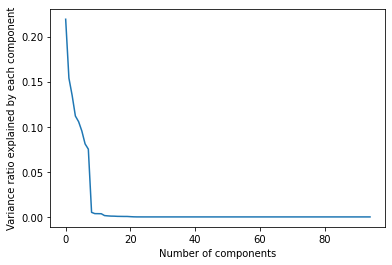

In [ ]:
import matplotlib.pyplot as plt

explained_variance_ratio = pca.explained_variance_ratio_
plt.plot(explained_variance_ratio)
plt.xlabel("Number of components")
plt.ylabel("Variance ratio explained by each component")
plt.savefig("pca_individual_variance.png")

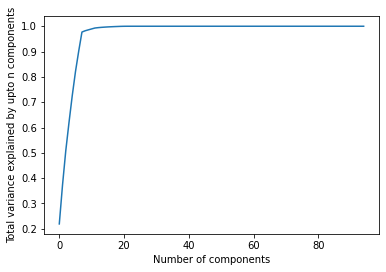

In [ ]:
import matplotlib.pyplot as plt

plt.plot(cum_variance)
plt.xlabel("Number of components")
plt.ylabel("Total variance explained by upto n components")
plt.savefig("pca_total_variance_across_first_n_components.png")

### Factor Analysis

(95, 10)


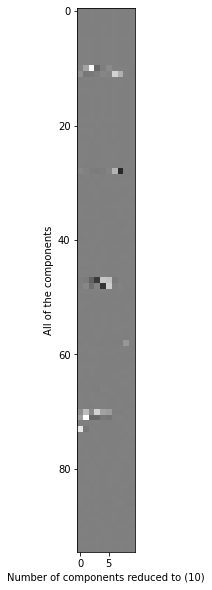

In [ ]:
from sklearn.decomposition import FactorAnalysis

transformer_factor_analysis = FactorAnalysis(n_components=10, random_state=0)
transformer_factor_analysis.fit(X_train)

import matplotlib.pyplot as plt
components = transformer_factor_analysis.components_.T
print(components.shape)
# print(components)
# plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.figure(figsize=(20, 10))
plt.xlabel("Number of components reduced to (10)")
plt.ylabel("All of the components")
plt.imshow(components, cmap="gray", vmax=np.abs(components).max(), vmin=-np.abs(components).max())

plt.savefig("FactorAnalysis_without_rotation.png")

(95, 10)


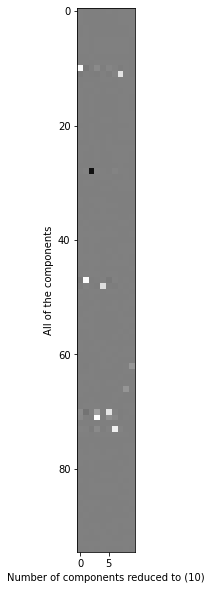

In [ ]:
from sklearn.decomposition import FactorAnalysis

transformer_factor_analysis_rotation = FactorAnalysis(n_components=10, random_state=0, rotation = "varimax")
transformer_factor_analysis_rotation.fit(X)
X_varimax_fa = transformer_factor_analysis_rotation.transform(X)
import matplotlib.pyplot as plt
components = transformer_factor_analysis_rotation.components_.T
print(components.shape)
# print(components)
# plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.figure(figsize=(20, 10))
plt.xlabel("Number of components reduced to (10)")
plt.ylabel("All of the components")
plt.imshow(components, cmap="gray", vmax=np.abs(components).max(), vmin=-np.abs(components).max())

plt.savefig("FactorAnalysis_with_rotation.png")

(95, 10)


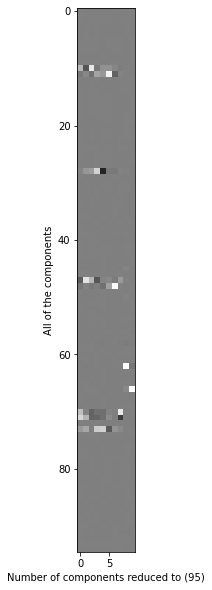

In [ ]:
import matplotlib.pyplot as plt

pca = PCA(n_components = 10)
pca.fit(X)

components = pca.components_.T
print(components.shape)
# print(components)
# plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.figure(figsize=(20, 10))
plt.xlabel("Number of components reduced to (95)")
plt.ylabel("All of the components")
plt.imshow(components, cmap="gray", vmax=np.abs(components).max(), vmin=-np.abs(components).max())

plt.savefig("PCA_matrix.png")

### Truncated SVD

In [ ]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
import numpy as np

X_dense = csr_matrix(X_train)
svd = TruncatedSVD(n_components= 10, n_iter=100, random_state=0)
svd.fit(X_dense)
X_svd = svd.transform(X_dense)
print(svd.explained_variance_ratio_)

print(svd.explained_variance_ratio_.sum())

print(svd.singular_values_)

[0.13876713 0.19509026 0.14693579 0.12990707 0.11147439 0.09786228
 0.0818261  0.07520326 0.00508257 0.00365517]
0.9858040205865962
[7.99893226e+11 3.71217566e+11 3.20703652e+11 3.01464190e+11
 2.78963019e+11 2.61425564e+11 2.39038687e+11 2.29121863e+11
 5.95817670e+10 5.05127991e+10]


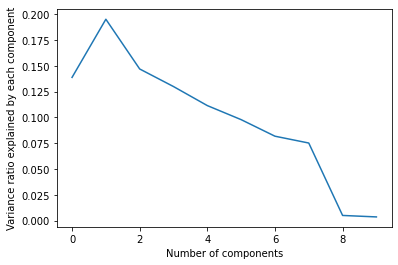

In [ ]:
import matplotlib.pyplot as plt

explained_variance_ratio = svd.explained_variance_ratio_
plt.plot(explained_variance_ratio)
plt.xlabel("Number of components")
plt.ylabel("Variance ratio explained by each component")
plt.savefig("svd_individual_variance.png")

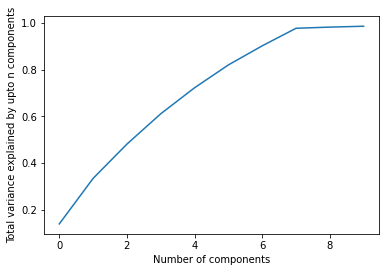

In [ ]:
import matplotlib.pyplot as plt

cum_variance = []
cum_variance.append(explained_variance_ratio[0])
for i in range(1, len(explained_variance_ratio)):
  cum_variance.append(explained_variance_ratio[i] + cum_variance[i - 1])
plt.plot(cum_variance)
plt.xlabel("Number of components")
plt.ylabel("Total variance explained by upto n components")
plt.savefig("svd_total_variance_across_first_n_components.png")

### LDA

In [ ]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)

print(accuracy(y_pred, y_test.to_numpy()))


0.8998095238095238


### Kernel PCA

In [ ]:
from sklearn.decomposition import PCA, KernelPCA
transformer_kernel_linear = KernelPCA(n_components=10, kernel='linear')
X_linear_kernel = transformer_kernel_linear.fit_transform(X_train)
X_linear_kernel.shape

(10497, 10)

In [ ]:
from sklearn.decomposition import PCA, KernelPCA
transformer_rbf_kernel = KernelPCA(n_components=10, kernel='rbf')
X_rbf_kernel = transformer_rbf_kernel.fit_transform(X_train)
X_rbf_kernel.shape

(10497, 10)

In [ ]:
from sklearn.decomposition import PCA, KernelPCA
transformer_poly_kernel = KernelPCA(n_components=10, kernel='poly')
X_poly_kernel = transformer_poly_kernel.fit_transform(X_train)



### Random Forest testing

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X_pca_train = pca.transform(X_train)
X_fa_train = transformer_factor_analysis.transform(X_train)
X_fa_rotation_train = transformer_factor_analysis_rotation.transform(X_train)

X_pca_test = pca.transform(X_test)
X_fa_test = transformer_factor_analysis.transform(X_test)
X_fa_rotation_test = transformer_factor_analysis_rotation.transform(X_test)


In [ ]:
clf_rf = RandomForestClassifier(random_state=0)
clf_rf.fit(X_train, y_train)
y_pred = clf_rf.predict(X_test)
print(accuracy(y_pred, y_test.to_numpy()))

0.9798095238095238


In [ ]:
clf_rf = RandomForestClassifier(random_state=0)
clf_rf.fit(X_pca_train, y_train)
y_pred = clf_rf.predict(X_pca_test)
print(accuracy(y_pred, y_test.to_numpy()))

0.9588571428571429


In [ ]:
clf_rf = RandomForestClassifier(random_state=0)
clf_rf.fit(X_fa_train, y_train)
y_pred = clf_rf.predict(X_fa_test)
print(accuracy(y_pred, y_test.to_numpy()))

0.9664761904761905


In [ ]:
clf_rf = RandomForestClassifier(random_state=0)
clf_rf.fit(X_fa_rotation_train, y_train)
y_pred = clf_rf.predict(X_fa_rotation_test)
print(accuracy(y_pred, y_test.to_numpy()))

0.9592380952380952


In [ ]:
X_poly_kernel_test = transformer_poly_kernel.transform(X_test)
X_rbf_kernel_test = transformer_rbf_kernel.transform(X_test)
X_linear_kernel_test = transformer_kernel_linear.transform(X_test)

In [ ]:
clf_rf = RandomForestClassifier(random_state=0)
clf_rf.fit(X_poly_kernel, y_train)
y_pred = clf_rf.predict(X_poly_kernel_test)
print(accuracy(y_pred, y_test.to_numpy()))

0.9340952380952381


In [ ]:
clf_rf = RandomForestClassifier(random_state=0)
clf_rf.fit(X_linear_kernel, y_train)
y_pred = clf_rf.predict(X_linear_kernel_test)
print(accuracy(y_pred, y_test.to_numpy()))

0.9561904761904761


In [ ]:
clf_rf = RandomForestClassifier(random_state=0)
clf_rf.fit(X_rbf_kernel, y_train)
y_pred = clf_rf.predict(X_rbf_kernel_test)
print(accuracy(y_pred, y_test.to_numpy()))

0.5070476190476191


### Decision trees  

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)

dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
print(accuracy(y_pred, y_test.to_numpy()))

0.9558095238095238


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)

dtc.fit(X_pca_train, y_train)
y_pred = dtc.predict(X_pca_test)
print(accuracy(y_pred, y_test.to_numpy()))

0.9078095238095238


### Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf = RandomForestClassifier(max_depth= 5, random_state=0)
clf.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, random_state=0)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print(accuracy(y_pred, y_test.to_numpy()))

0.923047619047619


In [ ]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy(y_pred, y_test.to_numpy()))

0.9798095238095238


In [ ]:
clf = RandomForestClassifier(max_features = 'log2',random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy(y_pred, y_test.to_numpy()))

0.9801904761904762


In [ ]:
# x = []
# for i in range(100):
#   clf = RandomForestClassifier(n_estimators = i + 1,random_state=0)
#   clf.fit(X_train, y_train)
#   y_pred = clf.predict(X_test)
#   # print(accuracy(y_pred, y_test.to_numpy()))
#   x.append(accuracy(y_pred, y_test.to_numpy()))

# plt.xlabel("Number of estimators")
# plt.ylabel("Accuracy")
# plt.plot(x)

In [ ]:
# plt.xlabel("Number of estimators for random forest")
# plt.ylabel("Accuracy")
# plt.plot(x)

### Decision Tree Parameter Experimentation

In [ ]:
# x = []
# for i in range(1, 6000, 50):
#   clf = DecisionTreeClassifier(max_leaf_nodes = i + 1,random_state=0)
#   clf.fit(X_train, y_train)
#   y_pred = clf.predict(X_test)
#   # print(accuracy(y_pred, y_test.to_numpy()))
#   x.append(accuracy(y_pred, y_test.to_numpy()))


In [ ]:

# plt.xlabel("Number of max leaf nodes allowed")
# plt.ylabel("Accuracy")
# plt.plot(x)
# max_index = -1; 
# max = 0
# j =0; 
# for i in range(1, 6000, 50):
#   if (x[j] > max):
#     max = x[j]
#     max_index = i
#   j += 1; 
# print("Maximum accuracy at: ", j)

In [ ]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [ ]:
y_predicted = clf.predict(X_test)
print(accuracy(y_predicted, y_test.to_numpy()))

0.9531428571428572


In [ ]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto', kernel = "linear"))
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test)
print(accuracy(y_predicted, y_test.to_numpy()))

0.9108571428571428


In [ ]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto', kernel = "poly"))
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test)
print(accuracy(y_predicted, y_test.to_numpy()))

0.9146666666666666


### SVM Classification

In [ ]:
from sklearn.svm import SVC

# Initialize SVM classifier
svm_clf = SVC(kernel='rbf',probability=True,random_state = 0) #sigmoid and linear don't perform as good as rbf and same was checked on this data

# Fit data
svm_clf = svm_clf.fit(X_train, y_train)

# Predict the test set
predictions = svm_clf.predict(X_test)

print(accuracy(predictions, y_test.to_numpy()))

0.8255238095238095


In [ ]:
from sklearn.svm import SVC

# Initialize SVM classifier
svm_clf = SVC(kernel='rbf',probability=True,random_state = 0) #sigmoid and linear don't perform as good as rbf and same was checked on this data

# Fit data
svm_clf = svm_clf.fit(X_pca_train, y_train)

# Predict the test set
predictions = svm_clf.predict(X_pca_test)

print(accuracy(predictions, y_test.to_numpy()))

0.8483809523809523


In [ ]:
from sklearn.svm import SVC

# Initialize SVM classifier
svm_clf = SVC(kernel='rbf',probability=True,random_state = 0) #sigmoid and linear don't perform as good as rbf and same was checked on this data

# Fit data
svm_clf = svm_clf.fit(X_fa_train, y_train)

# Predict the test set
predictions = svm_clf.predict(X_fa_test)

print(accuracy(predictions, y_test.to_numpy()))

0.9059047619047619


In [ ]:
from sklearn.svm import SVC

# Initialize SVM classifier
svm_clf = SVC(kernel='rbf',probability=True,random_state = 0) #sigmoid and linear don't perform as good as rbf and same was checked on this data

# Fit data
svm_clf = svm_clf.fit(X_fa_rotation_train, y_train)

# Predict the test set
predictions = svm_clf.predict(X_fa_rotation_test)

print(accuracy(predictions, y_test.to_numpy()))

0.8438095238095238


In [ ]:
from sklearn.svm import SVC

# Initialize SVM classifier
svm_clf = SVC(kernel='rbf',probability=True,random_state = 0) #sigmoid and linear don't perform as good as rbf and same was checked on this data

# Fit data
svm_clf = svm_clf.fit(X_fa_rotation_train, y_train)

# Predict the test set
predictions = svm_clf.predict(X_fa_rotation_test)

print(accuracy(predictions, y_test.to_numpy()))

0.8438095238095238


In [ ]:
from sklearn.svm import SVC

# Initialize SVM classifier
svm_clf = SVC(kernel='rbf',probability=True,random_state = 0) #sigmoid and linear don't perform as good as rbf and same was checked on this data

print(X_ros.shape)


X_svc_over_train = X_ros[:10558]
# print(X_train)
y_svc_over_train = y_ros[:10558]
X_svc_over_test = X_ros[10558:]
y_svc_over_test = y_ros[10558:]


# Fit data
svm_clf = svm_clf.fit(X_svc_over_train, y_svc_over_train)

# Predict the test set
predictions = svm_clf.predict(X_svc_over_test)

print(accuracy(predictions, y_svc_over_test.to_numpy()))

(13198, 95)
0.6


In [ ]:
from sklearn.svm import SVC

# Initialize SVM classifier
svm_clf = SVC(kernel='rbf',probability=True,random_state = 0) #sigmoid and linear don't perform as good as rbf and same was checked on this data

print(X_rus.shape)


X_svc_under_train = X_rus[:352]
# print(X_train)
y_svc_under_train = y_rus[:352]
X_svc_under_test = X_rus[352:]
y_svc_under_test = y_rus[352:]

# Fit data
svm_clf = svm_clf.fit(X_svc_under_train, y_svc_under_train)

# Predict the test set
predictions = svm_clf.predict(X_svc_under_test)

print(accuracy(predictions, y_svc_under_test.to_numpy()))

(440, 95)
0.13636363636363635


##KMeans Clustering

In [6]:
from sklearn.cluster import KMeans

In [ ]:
# X_train_ros, X_test_ros, y_train_ros,y_test_ros = train_test_split(X_ros,y_ros,test_size=0.20)
kmeans_ros = KMeans(n_clusters=2,init='k-means++')
kmeans_ros = kmeans_ros.fit(X_ros)
pred = kmeans_ros.labels_
print(accuracy_score(y_ros,pred))
print(classification_report(y_ros,pred))
print("Rand index score:")
print(metrics.rand_score(y_ros,pred))
print("Silhouette coefficient: ")
print(metrics.silhouette_score(X_ros,pred, metric='euclidean'))

0.5443248977117745
              precision    recall  f1-score   support

           0       0.53      0.70      0.60      6599
           1       0.56      0.39      0.46      6599

    accuracy                           0.54     13198
   macro avg       0.55      0.54      0.53     13198
weighted avg       0.55      0.54      0.53     13198

Rand index score:
0.5038918034646341
Silhouette coefficient: 
0.21667784748891836


In [ ]:
# X_train_rus, X_test_rus, y_train_rus,y_test_rus = train_test_split(X_rus,y_rus,test_size=0.20)
kmeans_rus = KMeans(n_clusters=2,init='k-means++')
kmeans_rus = kmeans_rus.fit(X_rus)
pred = kmeans_rus.labels_
print(accuracy_score(y_rus,pred))
print(classification_report(y_rus,pred))
print("Rand index score:")
print(metrics.rand_score(y_rus,pred))
print("Silhouette coefficient: ")
print(metrics.silhouette_score(X_rus,pred, metric='euclidean'))

0.5431818181818182
              precision    recall  f1-score   support

           0       0.53      0.69      0.60       220
           1       0.56      0.40      0.46       220

    accuracy                           0.54       440
   macro avg       0.55      0.54      0.53       440
weighted avg       0.55      0.54      0.53       440

Rand index score:
0.5025988817560572
Silhouette coefficient: 
0.2194578945225385


In [ ]:
kmeans_pca = KMeans(n_clusters=2,init='k-means++')
kmeans_pca = kmeans_pca.fit(X_pca_train)

# Predict the test set
predictions = kmeans_pca.labels_

print(accuracy(predictions, y_train.to_numpy()))

0.5336762884633705


In [ ]:
kmeans_pca = KMeans(n_clusters=2,init='k-means++')
kmeans_pca = kmeans_pca.fit(X_linear_kernel)

# Predict the test set
predictions = kmeans_pca.labels_

print(accuracy(predictions, y_train.to_numpy()))

0.4663237115366295


In [ ]:
kmeans_pca = KMeans(n_clusters=2,init='k-means++')
kmeans_pca = kmeans_pca.fit(X_poly_kernel)

# Predict the test set
predictions = kmeans_pca.labels_

print(accuracy(predictions, y_train.to_numpy()))

0.49147375440602076


In [ ]:
kmeans_pca = KMeans(n_clusters=2,init='k-means++')
kmeans_pca = kmeans_pca.fit(X_fa_train)

# Predict the test set
predictions = kmeans_pca.labels_

print(accuracy(predictions, y_train.to_numpy()))

0.489758978755835


In [ ]:
kmeans_pca = KMeans(n_clusters=2,init='k-means++')
kmeans_pca = kmeans_pca.fit(X_fa_rotation_train)

# Predict the test set
predictions = kmeans_pca.labels_

print(accuracy(predictions, y_train.to_numpy()))

0.44841383252357814


In [ ]:
kmeans_pca = KMeans(n_clusters=2,init='k-means++')
kmeans_pca = kmeans_pca.fit(X_train)

# Predict the test set
predictions = kmeans_pca.labels_

print(accuracy(predictions, y_train.to_numpy()))

0.4663237115366295


In [4]:
X = data.drop('Bankrupt?',axis=1)
y = data['Bankrupt?']

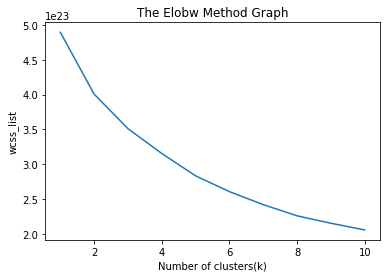

In [7]:
wcss= []
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(X)  
    wcss.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()

In [ ]:
model = KMeans(n_clusters=2,init='k-means++')
model = model.fit(X)
preds = model.labels_
print(classification_report(y,preds))
print("Rand index score:")
print(metrics.rand_score(y,preds))
print("Silhouette coefficient: ")
print(metrics.silhouette_score(X,preds, metric='euclidean'))

              precision    recall  f1-score   support

           0       0.97      0.70      0.81      6599
           1       0.04      0.38      0.07       220

    accuracy                           0.69      6819
   macro avg       0.51      0.54      0.44      6819
weighted avg       0.94      0.69      0.79      6819

Rand index score:
0.571790999825303
Silhouette coefficient: 
0.22858709569213786


##MLP


In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.2, random_state=42)

In [ ]:
print("SIGMOID")
m1 = MLPClassifier(activation = 'logistic', hidden_layer_sizes =(256,128),max_iter=300,batch_size=128)
m1.fit(X_train, y_train)
y_pred = m1.predict(X_test)
print(accuracy_score(y_pred,y_test))


SIGMOID
0.5053030303030303


In [ ]:
m1 = MLPClassifier(activation = 'identity', hidden_layer_sizes =(256,128),max_iter=300,batch_size=128)
m1.fit(X_train, y_train)
y_pred = m1.predict(X_test)
print(accuracy_score(y_pred,y_test))

0.5625


In [ ]:
m1 = MLPClassifier(activation = 'tanh', hidden_layer_sizes =(256,128),max_iter=300,batch_size=128)
m1.fit(X_train, y_train)
y_pred = m1.predict(X_test)
print(accuracy_score(y_pred,y_test))

0.615909090909091


In [ ]:
m1 = MLPClassifier(activation = 'relu', hidden_layer_sizes =(256,128),max_iter=300,batch_size=128)
m1.fit(X_train, y_train)
y_pred = m1.predict(X_test)
print(accuracy_score(y_pred,y_test))

0.9045454545454545


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.2, random_state=42)

In [ ]:
print("SIGMOID")
m1 = MLPClassifier(activation = 'logistic', hidden_layer_sizes =(256,128),max_iter=300,batch_size=128)
m1.fit(X_train, y_train)
y_pred = m1.predict(X_test)
print(accuracy_score(y_pred,y_test))


SIGMOID
0.6022727272727273


In [ ]:
m1 = MLPClassifier(activation = 'identity', hidden_layer_sizes =(256,128),max_iter=300,batch_size=128)
m1.fit(X_train, y_train)
y_pred = m1.predict(X_test)
print(accuracy_score(y_pred,y_test))

0.5568181818181818


In [ ]:
m1 = MLPClassifier(activation = 'tanh', hidden_layer_sizes =(256,128),max_iter=300,batch_size=128)
m1.fit(X_train, y_train)
y_pred = m1.predict(X_test)
print(accuracy_score(y_pred,y_test))

0.6818181818181818


In [ ]:
m1 = MLPClassifier(activation = 'relu', hidden_layer_sizes =(256,128),max_iter=300,batch_size=128)
m1.fit(X_train, y_train)
y_pred = m1.predict(X_test)
print(accuracy_score(y_pred,y_test))

0.6136363636363636


##GradientBoosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.2, random_state=42)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_ros, y_ros, test_size=0.2, random_state=42)

In [ ]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)
clf.score(X_test,y_test)

0.8409090909090909

In [ ]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=3, random_state=0).fit(X_train, y_train)
clf.score(X_test,y_test)

0.8295454545454546

In [ ]:
clf = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)
clf.score(X_test,y_test)

0.8295454545454546

In [ ]:
clf = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0,max_depth=3, random_state=0).fit(X_train, y_train)
clf.score(X_test,y_test)

0.8522727272727273

on oversampled data

In [ ]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train1, y_train1)
clf.score(X_test1,y_test1)

0.9598484848484848

In [ ]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=3, random_state=0).fit(X_train1, y_train1)
clf.score(X_test1,y_test1)

0.984469696969697

In [ ]:
clf = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train1, y_train1)
clf.score(X_test1,y_test1)

0.940530303030303

In [ ]:
clf = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0,max_depth=3, random_state=0).fit(X_train1, y_train1)
clf.score(X_test1,y_test1)

0.9776515151515152